In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from matplotlib import patches

import os
import math
import random

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.metrics import roc_curve, roc_auc_score, auc

import scipy.stats as st
from scipy.stats import poisson
from scipy.interpolate import interp1d
from scipy.stats import norm

In [2]:
from sklearn.neighbors import KernelDensity # paquete necesario
from sklearn.model_selection import GridSearchCV

import scipy.integrate as integrate

In [3]:
!pip install xgboost

import xgboost
from xgboost import XGBRegressor, XGBClassifier

You should consider upgrading via the '/home/perez/anaconda3/bin/python -m pip install --upgrade pip' command.


### Gaussians

In [4]:
##############
# PARAMETERS #
##############

# gaussian, mean
epsilon = 0.3

# number of events
N = 1000000

# requested number of ensembles
n_ensembles = 10000

# number of expected background events per ensemble
B_expected = 50000

# ratio S_expected/B_expected (signal ratio)
SB_ratio = 0.01

# Working points (to select signal enriched regions)
WP = [0.25, 0.5, 0.75]



# SOME USEFUL DERIVATED PARAMETERS:

# S_expected:
S_expected = 500

# S/\sqrt{B}
SsqrtB = 500/(50000)**0.5

In [5]:
store_AUC = []

store_Z_bins_XG_10bins = []
store_Z_bins_XG_25bins = []
store_Z_bins_XG_50bins = []
store_Z_bins_XG_100bins = []

store_muhat_mean_gaussian = []
store_Z_gaussian = []

store_muhat_mean_MLL_KDE = []
store_Z_KDE_bins = []
store_Z_MLL_KDE = []
store_Z_MLL_KDE_mu0 = []

SrootB_WP0 = []
SrootB_WP1 = []
SrootB_WP2 = []

## Dim=1

(1000000, 1)
(1000000, 1)
(1000000, 1)
(1000000, 1)


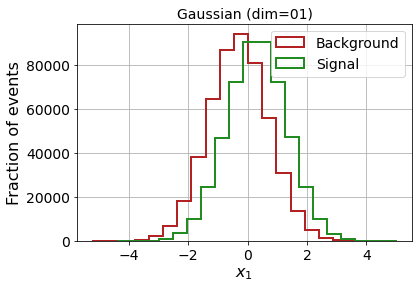

/home/perez/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y

[0]	validation_0-logloss:0.68534	validation_1-logloss:0.68534
[1]	validation_0-logloss:0.67882	validation_1-logloss:0.67883
[2]	validation_0-logloss:0.67355	validation_1-logloss:0.67357
[3]	validation_0-logloss:0.66944	validation_1-logloss:0.66948
[4]	validation_0-logloss:0.66587	validation_1-logloss:0.66591
[5]	validation_0-logloss:0.66283	validation_1-logloss:0.66289
[6]	validation_0-logloss:0.66039	validation_1-logloss:0.66046
[7]	validation_0-logloss:0.65859	validation_1-logloss:0.65868
[8]	validation_0-logloss:0.65711	validation_1-logloss:0.65721
[9]	validation_0-logloss:0.65561	validation_1-logloss:0.65574
[10]	validation_0-logloss:0.65463	validation_1-logloss:0.65477
[11]	validation_0-logloss:0.65371	validation_1-logloss:0.65387
[12]	validation_0-logloss:0.65294	validation_1-logloss:0.65312
[13]	validation_0-logloss:0.65236	validation_1-logloss:0.65256
[14]	validation_0-logloss:0.65181	validation_1-logloss:0.65203
[15]	validation_0-logloss:0.65147	validation_1-logloss:0.65171
[1

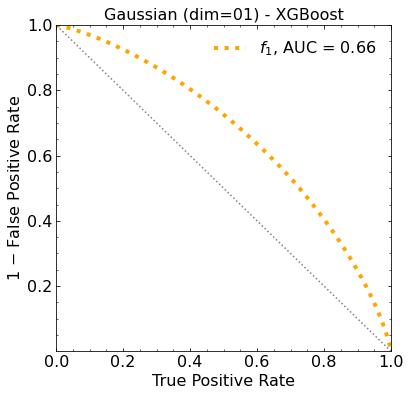

Classification score:


Substituting symbol N from STIXNonUnicode
Substituting symbol N from STIXNonUnicode


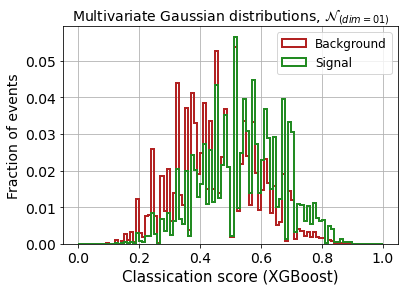

Classification score interpolation:


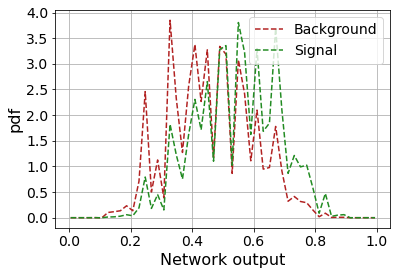


 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 10 bins:  2.636134323271524

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 25 bins:  2.654554009795442

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 50 bins:  2.6578223272270605

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 100 bins:  2.6594471686423913

 ----------------------------------------- 

TRUE PDF LIKELIHOOD (GAUSSIANS):
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
n_ensembles (initial):  10000

 If  10100  =  1009    then the proposed range has to be extended
n_ensembles (actual):  9233
This may take long...


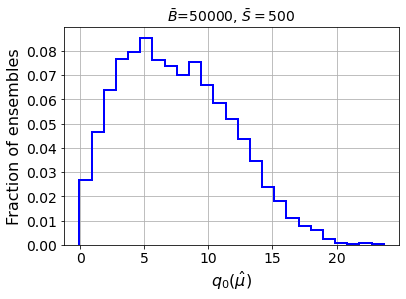

muhat mean:  0.15878912596122605
median q_muhat:  7.201970925049977
Z_gaussian:  2.6836488080689653

 ------------------------------------ 

 MLL + KDE 


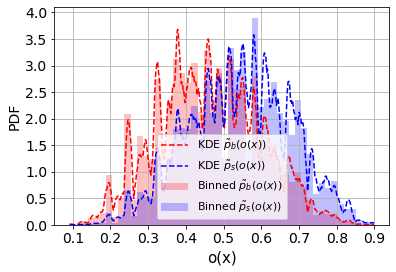

Z_KDE_bins :  2.656266288052461


B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
n_ensembles (initial):  10000

 If  10100  =  1009    then the proposed range has to be extended
n_ensembles (actual):  9233

 This may take long... 



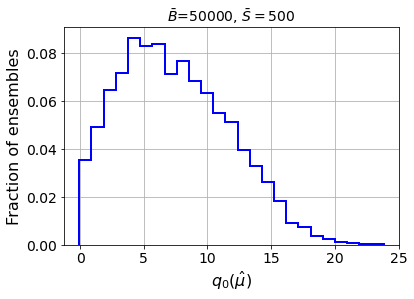

muhat mean:  0.1665439185530164
median q_muhat:  6.938719528621505
Z_KDE:  2.6341449331085607
Z_KDE mu=0:  2.6461823003605334

 -------------------------------- 

Working points, counting over 1 bin:
S_expected =  500
WP: 0     S/B**0.5=  2.23606797749979
WP:  0.25     S/B**0.5=  2.273824123464826
WP:  0.5     S/B**0.5=  2.234195313830836
WP:  0.75     S/B**0.5=  1.0677014742107185
------------------------


In [6]:
dim=1

#######################
# generate the events #
#######################
    
background_X_1 = np.random.normal(-epsilon,1,N)
    
signal_X_1 = np.random.normal(epsilon,1,N)

dim1 = np.concatenate((background_X_1,signal_X_1))

# labels
background_Y = np.zeros(N)
signal_Y = np.ones(N)

# DATA in a single matrix (features + labels)
df = pd.DataFrame()
df['dim1'] = dim1.reshape(-1)
df['Y'] = np.concatenate((background_Y.astype('int'),signal_Y.astype('int')))

X_gauss = df[['dim1']].values 
Y_gauss = df[['Y']].values

X_gauss_train, X_gauss_val, Y_gauss_train, Y_gauss_val = train_test_split(X_gauss, Y_gauss, test_size=0.5)


print(X_gauss_train.shape)
print(Y_gauss_train.shape)
print(X_gauss_val.shape)
print(Y_gauss_val.shape)


# PLOT (only 1st feature) to visualize the data
X_gauss_val_SM = []
X_gauss_val_NP = []

for i in range(len(Y_gauss_val)):
    if Y_gauss_val[i] ==0:
        X_gauss_val_SM.append(X_gauss_val[i].tolist())
    else:
        X_gauss_val_NP.append(X_gauss_val[i].tolist())    


X_gauss_val_SM = np.array(X_gauss_val_SM)
X_gauss_val_NP = np.array(X_gauss_val_NP)


weights = np.ones_like(X_gauss_val_SM[:,0])/float(len(X_gauss_val_SM[:,0]))
plt.hist(X_gauss_val_SM[:,0], 20, histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(X_gauss_val_NP[:,0])/float(len(X_gauss_val_NP[:,0]))
plt.hist(X_gauss_val_NP[:,0], 20, histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$x_1$",fontsize=16)
plt.ylabel("Fraction of events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.title(r"Gaussian (dim=%0.2d)" % dim,fontsize=14)
plt.show()  




#######################
# CLASSIFIER: XGBoost #
#######################

# CLASSIFIER
classifier = XGBClassifier(
    n_estimators=500,
    learning_rate=0.1,
    reg_lambda=0.0,reg_alpha=0.0,
    gamma=0.0,objective='binary:logistic',
    max_depth=5)

# FIT
classifier.fit(X_gauss_train,Y_gauss_train,eval_set=[(X_gauss_train, Y_gauss_train), (X_gauss_val, Y_gauss_val)],
        eval_metric='logloss',early_stopping_rounds=50,#early stopping
        verbose=True)

# PREDICTIONS
y_pred_xg = classifier.predict_proba(X_gauss_val).T[1]


# ROC
fpr_gauss_xg, tpr_gauss_xg, _ = roc_curve(Y_gauss_val, y_pred_xg)
roc_auc_xg = auc(fpr_gauss_xg, tpr_gauss_xg)

store_AUC.append(roc_auc_xg)


# PLOT THE ROC WITH AUC
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax0.minorticks_on()


plt.plot(tpr_gauss_xg,1-fpr_gauss_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
plt.plot([1,0],[0,1],ls=":",color="grey")
plt.xlabel("True Positive Rate",fontsize=16)
plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
plt.legend()
plt.title(r"Gaussian (dim=%0.2d) - XGBoost" % dim,fontsize=16)
plt.xlim([0,1])
plt.ylim([0,1])
plt.yticks([0.2,0.4,0.6,0.8,1.])
plt.legend(frameon=False,fontsize=16)
plt.show()




########################
# CLASSIFICATION SCORE #
########################

# Outputs for validation data set

pred_XG_SM = []
pred_XG_NP = []

for i in range(len(Y_gauss_val)):
    if Y_gauss_val[i] == 0:
        pred_XG_SM.append(y_pred_xg[i])
    else:
        pred_XG_NP.append(y_pred_xg[i])
        
        
print('Classification score:')
        
weights = np.ones_like(pred_XG_SM)/float(len(pred_XG_SM))
nSM, binsSM, patchesSM = plt.hist(pred_XG_SM, 100, weights=weights, range=[0,1], histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(pred_XG_NP)/float(len(pred_XG_NP))
nNP, binsNP, patchesNP = plt.hist(pred_XG_NP, 100, weights=weights, range=[0,1], histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Classication score (XGBoost)",fontsize=15)
plt.ylabel("Fraction of events",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
plt.title('Multivariate Gaussian distributions, $\mathcal{N}_{(dim=%0.2d)}$' % dim, fontsize=14)
plt.show()





# INTERPOLATE TO USE AS p_s(x) and p_b(x) ESTIMATES

# center of each bin

binsSM_mid = []
binsNP_mid = []

for i in range(len(binsSM)-1):
    binsSM_mid.append( ((binsSM[i+1]-binsSM[i])/2)+binsSM[i] )
    
for i in range(len(binsNP)-1):
    binsNP_mid.append( ((binsNP[i+1]-binsNP[i])/2)+binsNP[i] )
    

# get the width of each bin
bin_width_SM = binsSM[1] - binsSM[0]
bin_width_NP = binsNP[1] - binsNP[0]
   
    
# Interpolation, cubic
fcubic_XG_SM = interp1d(binsSM_mid, nSM, kind='cubic')
fcubic_XG_NP = interp1d(binsNP_mid, nNP, kind='cubic')


# Normalize

def fcubic_XG_SM_norm(x):
    return fcubic_XG_SM(x)/bin_width_SM

def fcubic_XG_NP_norm(x):
    return fcubic_XG_NP(x)/bin_width_NP


print('Classification score interpolation:')
# x to plot
xnew_XG_SM = np.linspace(min(binsSM_mid), max(binsSM_mid), num=50, endpoint=True)
xnew_XG_NP = np.linspace(min(binsNP_mid), max(binsNP_mid), num=50, endpoint=True)

plt.plot(xnew_XG_SM, fcubic_XG_SM_norm(xnew_XG_SM), '--', color='firebrick', label='Background')
plt.plot(xnew_XG_NP, fcubic_XG_NP_norm(xnew_XG_NP), '--', color='forestgreen', label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Network output",fontsize=16)
plt.ylabel("pdf",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()

print('\n ----------------------------------------- \n')








##################################################
# CLASSIFIER OUTPUT BINNED POISON LOG-LIKELIHOOD #
##################################################

# 10 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(10), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(10), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_10bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_10bins.append(Z_bins_XG_10bins)

print('Z_XG 10 bins: ', Z_bins_XG_10bins)
print('\n ----------------------------------------- \n')




##############################

# 25 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(25), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(25), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_25bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_25bins.append(Z_bins_XG_25bins)

print('Z_XG 25 bins: ', Z_bins_XG_25bins)
print('\n ----------------------------------------- \n')




##############################

# 50 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(50), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(50), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_50bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_50bins.append(Z_bins_XG_50bins)

print('Z_XG 50 bins: ', Z_bins_XG_50bins)
print('\n ----------------------------------------- \n')




##############################

# 100 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(100), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(100), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_100bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_100bins.append(Z_bins_XG_100bins)

print('Z_XG 100 bins: ', Z_bins_XG_100bins)
print('\n ----------------------------------------- \n')








###################################
# TRUE PDF LIKELIHOOD (GAUSSIANS) #
###################################

print('TRUE PDF LIKELIHOOD (GAUSSIANS):')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print('S/$\sqrt{B}$: ', SsqrtB)
print('n_ensembles (initial): ', n_ensembles)


# to construct ensembles B and S events are taken from Poisson distributions
mu = S_expected + B_expected


# Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

# around the mean its populated so let's try (proposed range to be checked)
list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
to_check = len(list_events_per_ensembles)

# I want at least one ensemble populated
list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



# Remove from the list the elements without at least 1 ensemble possible
for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] > 1:
        list_events_per_ensembles = list_events_per_ensembles[i:]
        list_nums_ensembles = list_nums_ensembles[i:]
        break


for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] < 1:
        list_events_per_ensembles = list_events_per_ensembles[:i]
        list_nums_ensembles = list_nums_ensembles[:i]
        break

print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

print('n_ensembles (actual): ', sum(list_nums_ensembles))



# lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

p_berno = S_expected/(S_expected+B_expected)

list_S_per_ensembles = []
list_B_per_ensembles = []

for jj in range(len(list_events_per_ensembles)):
    list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
    list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

######
# NOW I HAVE 4 LISTS:
# list_events_per_ensembles     list with the number of events per ensemble (its a range)
# list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
# list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
# list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
######



print('This may take long...')


#############################
# NOW LETS APPLY THE METHOD #
#############################
muhat_selected_list = []
q_muhat = []

for bb in range(len(list_nums_ensembles)):

    for kk in range(list_nums_ensembles[bb]):

#         # SIGNAL events in an ensemble
#         NP_shuf = shuffle(X_gauss_val_NP)[:list_S_per_ensembles[bb]]

#         prob_NP_given_B = [] # p_b(S_ensemble)
#         prob_NP_given_S = [] # p_s(S_ensemble)

#         for ll in range(len(NP_shuf)):
#             prob_NP_given_S.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (NP_shuf[ll,0]-epsilon)**2 ) ) )
#             prob_NP_given_B.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (NP_shuf[ll,0]+epsilon)**2 ) ) )


        # BACKGROUND events in an ensemble
        SM_shuf = shuffle(X_gauss_val_SM)[:list_B_per_ensembles[bb]]

        prob_SM_given_B = [] # p_b(B_ensemble)
        prob_SM_given_S = [] # p_s(B_ensemble)

        for ll in range(len(SM_shuf)):
            prob_SM_given_S.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (SM_shuf[ll,0]-epsilon)**2 ) ) )
            prob_SM_given_B.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (SM_shuf[ll,0]+epsilon)**2 ) ) )


        # p_b(x_ensemble) =    concatenate: p_b(B_ensemble) and p_b(S_ensemble)
        prob_x_given_B = prob_SM_given_B #+ prob_NP_given_B

        # p_s(x_ensemble) =    concatenate: p_s(B_ensemble) and p_s(S_ensemble)
        prob_x_given_S = prob_SM_given_S #+ prob_NP_given_S




        # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
        # WE NEED TO ESTIMATE mu_hat for this particular ensemble
        # we are going to obtain a mu_hat with a grid of values for this particular ensemble



        mu_hat_condition_equal_1 = []

        # grid, mu_hat is around 1
        muhat_test = np.arange(0., 1.5, 0.1).tolist()

        B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

        for vv in range(len(muhat_test)):

            mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



        muhat_selected = 0.01

        # from the grid, select the mu_hat such that the condition is equal to 1
        if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 > 0:
                    muhat_selected = muhat_test[ll]
                    break


        if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 < 0:
                    muhat_selected = muhat_test[ll]
                    break


        muhat_selected_list.append(muhat_selected)



        # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
        # and append it (we need the median over lots of ensembles)
        q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (muhat_selected*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )  ) )



# Histogram of q_muhats

weights = np.ones_like(q_muhat)/float(len(q_muhat))
nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
plt.ylabel("Fraction of ensembles",fontsize=16)
plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected),fontsize=14)
plt.grid()
plt.show()


# Finally calculate muhat_mean and Z_gaussian
muhat_mean_gaussian = np.mean(muhat_selected_list)
store_muhat_mean_gaussian.append(muhat_mean_gaussian)

# Remove nan if any
q_muhat = [x for x in q_muhat if x == x]
    
q_muhat_median = np.median(q_muhat)

Z_gaussian = abs(q_muhat_median)**0.5
store_Z_gaussian.append(Z_gaussian)

print('muhat mean: ', muhat_mean_gaussian)
print('median q_muhat: ', q_muhat_median)
print('Z_gaussian: ', Z_gaussian)


print('\n ------------------------------------ \n')


    
    
    


    
#########
#  KDE  #
#########  

print(' MLL + KDE ')

# FIND THE BANDWIDTH

# bandwidth = np.logspace(-4.0, 0, 20)

# kde = KernelDensity(kernel='epanechnikov')
# grid = GridSearchCV(kde, {'bandwidth': bandwidth})
# grid.fit(np.c_[pred_XG_SM[:50000]])
# print('Background: ', grid.best_estimator_)

# SM_bandwidth = grid.best_estimator_.bandwidth



# kde = KernelDensity(kernel='epanechnikov')
# grid = GridSearchCV(kde, {'bandwidth': bandwidth})
# grid.fit(np.c_[pred_XG_NP[:50000]])
# print('Signal: ', grid.best_estimator_)

# NP_bandwidth = grid.best_estimator_.bandwidth

SM_bandwidth = 0.012742749857031334
NP_bandwidth = 0.012742749857031334


# with each calculated bandwidth estimate the pdf with KDE to the classifier output (for background and signal)
# notice: epanechnikov kernel
kde_bkg = KernelDensity(kernel='epanechnikov', bandwidth=SM_bandwidth).fit(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ])
kde_sig = KernelDensity(kernel='epanechnikov', bandwidth=NP_bandwidth).fit(np.c_[pred_XG_NP, np.ones(len(pred_XG_NP)) ])


# range (~between 0 and 1)
min_val = np.min([np.min(pred_XG_SM),np.min(pred_XG_NP)])
max_val = np.max([np.max(pred_XG_SM),np.max(pred_XG_NP)])

s_vals = np.linspace(min_val,max_val,1000)





# evaluate the densities for each value of s (~bins)
dens_bkg = np.exp(kde_bkg.score_samples(np.c_[s_vals, np.zeros(len(s_vals)) ]) )
dens_sig = np.exp(kde_sig.score_samples(np.c_[s_vals, np.ones(len(s_vals)) ]) )





# Normalize to 1
# Area
factor_aux_SM = sum(dens_bkg*(s_vals[1]-s_vals[0]))
factor_aux_NP = sum(dens_sig*(s_vals[1]-s_vals[0]))

# normalize
dens_bkg = dens_bkg / factor_aux_SM
dens_sig = dens_sig / factor_aux_NP







# plot to check the estimation

plt.figure()

plt.hist(pred_XG_SM,density=True,bins=50,color='red',alpha=0.25,label=r'Binned $\tilde{p}_{b}(o(x))$');
plt.plot(s_vals,dens_bkg,color='red',label=r'KDE $\tilde{p}_{b}(o(x))$',linestyle='dashed');

plt.hist(pred_XG_NP,density=True,bins=50,color='blue',alpha=0.25,label=r'Binned $\tilde{p}_{s}(o(x))$');
plt.plot(s_vals,dens_sig,color='blue',label=r'KDE $\tilde{p}_{s}(o(x))$',linestyle='dashed');

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("o(x)",fontsize=15)
plt.ylabel("PDF",fontsize=14)
plt.grid()
plt.legend(loc="lower center", fontsize=11, handlelength=2.5)
#plt.title(r'Multivariate Gaussian distributions, $\mathcal{N}_{dim}$', fontsize=14)
#plt.savefig('images/' + 'Ndimgaussian-output.pdf', format="pdf", bbox_inches="tight")
plt.show()





# We can do a quick Z bin-loglikelihood calculation using the computed KDE
# this is to check the KDE here, because we use KDE to avoid binning


# B events in each bin: 
# total number of B * B_pdf value in each bin * bin size
Bd = B_expected*dens_bkg*(s_vals[1]-s_vals[0])


# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
Bd_noceros = []
for i in range(len(Bd)):
    if Bd[i]!=0:
        Bd_noceros.append(Bd[i])

min_back = min(Bd_noceros)

# replace the zeros
for i in range(len(Bd)):
    if Bd[i]==0:
        Bd[i] = min_back


# S events in each bin: 
# value of S/sqrt{B} * sqrt{B} * S_pdf value in each bin * bin size
Sd = SsqrtB*np.sqrt(B_expected)*dens_sig*(s_vals[1]-s_vals[0])


# Z value:
#Z_KDE_bins = np.sqrt(2.0*np.sum(((Sd+Bd)*np.log(1.0+Sd/Bd)-Sd))) # Discovery
Z_KDE_bins = np.sqrt(2.0*np.sum(Bd*np.log(Bd/(Sd+Bd))+Sd)) # Exclusion

store_Z_KDE_bins.append(Z_KDE_bins)

print('Z_KDE_bins : ', Z_KDE_bins)



    
    
    
#############
# MLL + KDE #
#############
    
# FOR EXCLUSION:
# we need to evaluate the KDE densities with the classifier output of BACKGROUND EVENTS

# FOR DISCOVERY:
# we need to evaluate the KDE densities with the classifier output of BACKGROUND and SIGNAL EVENTS

KDE_SM_pred_SM = np.exp(kde_bkg.score_samples(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ]) )
KDE_NP_pred_SM = np.exp(kde_sig.score_samples(np.c_[pred_XG_SM, np.ones(len(pred_XG_SM)) ]) )


# Normalize

KDE_SM_pred_SM = KDE_SM_pred_SM / factor_aux_SM
KDE_NP_pred_SM = KDE_NP_pred_SM / factor_aux_NP




indices = [i for i in range(len(KDE_NP_pred_SM))]


# the first part is the same as before, but we repeat it, it is not the expensive part

print('\n')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)
print('n_ensembles (initial): ', n_ensembles)


# to construct ensembles B and S events are taken from Poisson distributions
mu = S_expected + B_expected


# Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

# around the mean its populated so let's try (proposed range to be checked)
list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
to_check = len(list_events_per_ensembles)

# I want at least one ensemble populated
list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



# Remove from the list the elements without at least 1 ensemble possible
for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] > 1:
        list_events_per_ensembles = list_events_per_ensembles[i:]
        list_nums_ensembles = list_nums_ensembles[i:]
        break


for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] < 1:
        list_events_per_ensembles = list_events_per_ensembles[:i]
        list_nums_ensembles = list_nums_ensembles[:i]
        break

print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

print('n_ensembles (actual): ', sum(list_nums_ensembles))



# lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

p_berno = S_expected/(S_expected+B_expected)

list_S_per_ensembles = []
list_B_per_ensembles = []

for jj in range(len(list_events_per_ensembles)):
    list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
    list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

######
# NOW I HAVE 4 LISTS:
# list_events_per_ensembles     list with the number of events per ensemble (its a range)
# list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
# list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
# list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
######



print('\n This may take long... \n')


# NOW LETS APPLY THE METHOD

muhat_selected_list = []
q_muhat = []
q_muhat_mu0 = []

for bb in range(len(list_nums_ensembles)):

    for kk in range(list_nums_ensembles[bb]):

        # KDE
        ran_ind = np.random.choice(indices, list_B_per_ensembles[bb])

        KDE_SM_pred_SM_shuf = []
        KDE_NP_pred_SM_shuf = []

        for i in ran_ind:
            KDE_SM_pred_SM_shuf.append(KDE_SM_pred_SM[i])
            KDE_NP_pred_SM_shuf.append(KDE_NP_pred_SM[i])

        KDE_SM_pred_SM_shuf  = np.array(KDE_SM_pred_SM_shuf)
        KDE_NP_pred_SM_shuf  = np.array(KDE_NP_pred_SM_shuf)



        # p_b(o(x_ensemble)) =    concatenate: p_b(o(B_ensemble)) and p_b(o(S_ensemble))  NOTICE THE o(x)
        prob_x_given_B = np.ndarray.tolist( KDE_SM_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_SM_pred_NP_shuf )

        # p_s(o(x_ensemble)) =    concatenate: p_s(o(B_ensemble)) and p_s(o(S_ensemble))  NOTICE THE o(x)
        prob_x_given_S = np.ndarray.tolist( KDE_NP_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_NP_pred_NP_shuf )





        # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
        # WE NEED TO ESTIMATE mu_hat for this particular ensemble
        # we are going to obtain a mu_hat with a grid of values for this particular ensemble



        mu_hat_condition_equal_1 = []

        # grid, mu_hat is around 1
        muhat_test = np.arange(0., 1.5, 0.1).tolist()

        B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

        for vv in range(len(muhat_test)):

            mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



        muhat_selected = 0.01

        # from the grid, select the mu_hat such that the condition is equal to 1
        if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 > 0:
                    muhat_selected = muhat_test[ll]
                    break


        if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 < 0:
                    muhat_selected = muhat_test[ll]
                    break


        muhat_selected_list.append(muhat_selected)



        # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
        # and append it (we need the median over lots of ensembles)
        #q_muhat.append( 2 * ( (-1.*muhat_selected * S_expected) + sum( [np.log( 1 + ( (muhat_selected*S_expected/B_expected) * (x / y) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] ) ) )
        # EXCLUSION:
        q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (muhat_selected*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
) )
        q_muhat_mu0.append( 2 * ( ( (1.-0.) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (0.*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
) )


# Histogram of q_muhats

weights = np.ones_like(q_muhat)/float(len(q_muhat))
nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)
#plt.xlim(0,1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
plt.ylabel("Fraction of ensembles",fontsize=16)
plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected),fontsize=14)
plt.grid()
#plt.legend(fontsize=14)
plt.show()


# Finally calculate muhat_mean and Z_gaussian

# Remove nan if any
q_muhat_mu0 = [x for x in q_muhat_mu0 if x == x]

q_muhat_median_mu0 = np.median(q_muhat_mu0)

Z_KDE_mu0 = abs(q_muhat_median_mu0)**0.5
store_Z_MLL_KDE_mu0.append(Z_KDE_mu0)


# Finally calculate muhat_mean and Z_gaussian
muhat_mean_MLL_KDE = np.mean(muhat_selected_list)
store_muhat_mean_MLL_KDE.append(muhat_mean_MLL_KDE)

# Remove nan if any
q_muhat = [x for x in q_muhat if x == x]

q_muhat_median = np.median(q_muhat)

Z_KDE = abs(q_muhat_median)**0.5
store_Z_MLL_KDE.append(Z_KDE)

print('muhat mean: ', muhat_mean_MLL_KDE)
print('median q_muhat: ', q_muhat_median)
print('Z_KDE: ', Z_KDE)
print('Z_KDE mu=0: ', Z_KDE_mu0)

print('\n -------------------------------- \n')
    
    

    
    
    
    
    
    
#######################################
# Working points, counting over 1 bin #
#######################################

print('Working points, counting over 1 bin:')

# BACKGROUND 

# number of background ensembles
B_ensembles = int(len(pred_XG_SM)/B_expected)

# shorten the number of B events so I get an integer number of ensembles
pred_XG_SM_entero = pred_XG_SM[:int(len(pred_XG_SM)/B_expected) * B_expected]

XG_SM_passWP0 = 0
XG_SM_passWP1 = 0
XG_SM_passWP2 = 0

for i in range(len(pred_XG_SM_entero)):
    if pred_XG_SM_entero[i] > WP[0]:
        XG_SM_passWP0 += 1
    if pred_XG_SM_entero[i] > WP[1]:
        XG_SM_passWP1 += 1
    if pred_XG_SM_entero[i] > WP[2]:
        XG_SM_passWP2 += 1



# SIGNAL

# number of signal ensembles
S_ensembles = int(len(pred_XG_NP)/S_expected)

# shorten the number of S events so I get an integer number of ensembles
pred_XG_NP_entero = pred_XG_NP[:int(len(pred_XG_NP)/S_expected) * S_expected]

XG_NP_passWP0 = 0
XG_NP_passWP1 = 0
XG_NP_passWP2 = 0

for i in range(len(pred_XG_NP_entero)):
    if pred_XG_NP_entero[i] > WP[0]:
        XG_NP_passWP0 += 1
    if pred_XG_NP_entero[i] > WP[1]:
        XG_NP_passWP1 += 1
    if pred_XG_NP_entero[i] > WP[2]:
        XG_NP_passWP2 += 1

Z_WP0 = ( XG_NP_passWP0 / S_ensembles ) / ( XG_SM_passWP0 / B_ensembles )**0.5
Z_WP1 = ( XG_NP_passWP1 / S_ensembles ) / ( XG_SM_passWP1 / B_ensembles )**0.5
Z_WP2 = ( XG_NP_passWP2 / S_ensembles ) / ( XG_SM_passWP2 / B_ensembles )**0.5


# save the results Z_binned after WP
SrootB_WP0.append( Z_WP0 )
SrootB_WP1.append( Z_WP1 )
SrootB_WP2.append( Z_WP2 )

print('S_expected = ', S_expected)
print('WP: 0     S/B**0.5= ', S_expected/(B_expected)**0.5)
print('WP: ', WP[0], '    S/B**0.5= ', Z_WP0 )
print('WP: ', WP[1], '    S/B**0.5= ', Z_WP1 )
print('WP: ', WP[2], '    S/B**0.5= ', Z_WP2 )
print('------------------------')

In [7]:
print('dim = ', dim)

print(roc_auc_xg)

print(Z_bins_XG_10bins)
print(Z_bins_XG_25bins)
print(Z_bins_XG_50bins)
print(Z_bins_XG_100bins)

print(muhat_mean_gaussian)
print(Z_gaussian)

print(muhat_mean_MLL_KDE)
print(Z_KDE_bins)
print(Z_KDE)
print(Z_KDE_mu0)

print(Z_WP0)
print(Z_WP1)
print(Z_WP2)

dim =  1
0.6645728570720144
2.636134323271524
2.654554009795442
2.6578223272270605
2.6594471686423913
0.15878912596122605
2.6836488080689653
0.1665439185530164
2.656266288052461
2.6341449331085607
2.6461823003605334
2.273824123464826
2.234195313830836
1.0677014742107185


In [ ]:
# To use if you dont want to run everything again. Store the previous results
store_AUC.append()

store_Z_bins_XG_10bins.append()
store_Z_bins_XG_25bins.append()
store_Z_bins_XG_50bins.append()
store_Z_bins_XG_100bins.append()

store_muhat_mean_gaussian.append()
store_Z_gaussian.append()

store_muhat_mean_MLL_KDE.append()
store_Z_KDE_bins.append()
store_Z_MLL_KDE.append()
store_Z_MLL_KDE_mu0.append()

SrootB_WP0.append()
SrootB_WP1.append()
SrootB_WP2.append()

## Dim=2

(1000000, 2)
(1000000, 1)
(1000000, 2)
(1000000, 1)


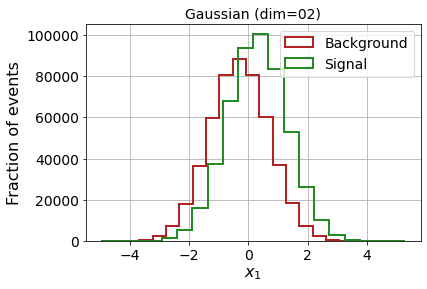

/home/perez/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y

[0]	validation_0-logloss:0.67933	validation_1-logloss:0.67938
[1]	validation_0-logloss:0.66760	validation_1-logloss:0.66767
[2]	validation_0-logloss:0.65825	validation_1-logloss:0.65835
[3]	validation_0-logloss:0.65032	validation_1-logloss:0.65044
[4]	validation_0-logloss:0.64380	validation_1-logloss:0.64394
[5]	validation_0-logloss:0.63825	validation_1-logloss:0.63839
[6]	validation_0-logloss:0.63376	validation_1-logloss:0.63392
[7]	validation_0-logloss:0.62995	validation_1-logloss:0.63011
[8]	validation_0-logloss:0.62673	validation_1-logloss:0.62690
[9]	validation_0-logloss:0.62399	validation_1-logloss:0.62417
[10]	validation_0-logloss:0.62175	validation_1-logloss:0.62194
[11]	validation_0-logloss:0.61986	validation_1-logloss:0.62006
[12]	validation_0-logloss:0.61830	validation_1-logloss:0.61851
[13]	validation_0-logloss:0.61694	validation_1-logloss:0.61717
[14]	validation_0-logloss:0.61579	validation_1-logloss:0.61602
[15]	validation_0-logloss:0.61486	validation_1-logloss:0.61510
[1

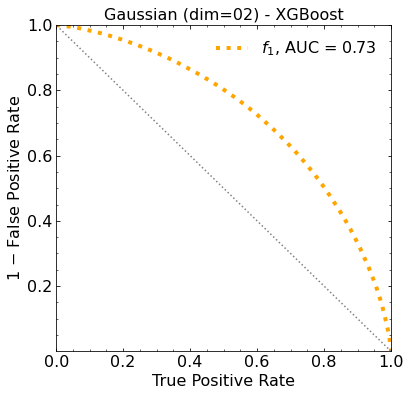

Classification score:


Substituting symbol N from STIXNonUnicode
Substituting symbol N from STIXNonUnicode


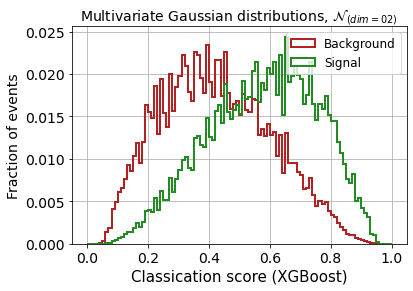

Classification score interpolation:


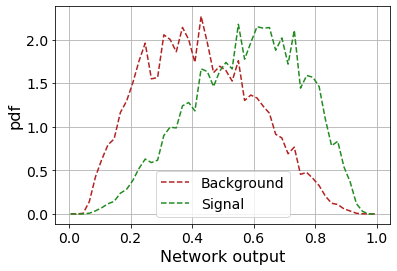


 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 10 bins:  3.122876033542218

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 25 bins:  3.1590626478621906

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 50 bins:  3.164848396881707

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 100 bins:  3.1675771535129655

 ----------------------------------------- 

TRUE PDF LIKELIHOOD (GAUSSIANS):
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
n_ensembles (initial):  10000

 If  10100  =  1009    then the proposed range has to be extended
n_ensembles (actual):  9233
This may take long...


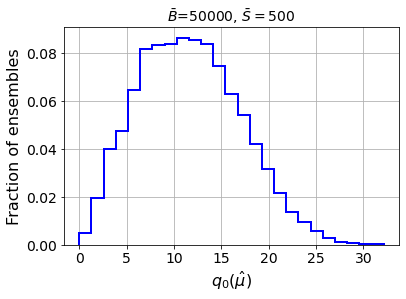

muhat mean:  0.10467886927325896
median q_muhat:  11.38176224932397
Z_gaussian:  3.373686744397584

 ------------------------------------ 

 MLL + KDE 


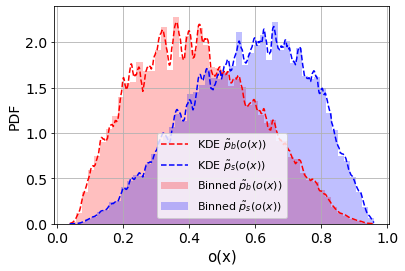

Z_KDE_bins :  3.164622894600369


B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
n_ensembles (initial):  10000

 If  10100  =  1009    then the proposed range has to be extended
n_ensembles (actual):  9233

 This may take long... 



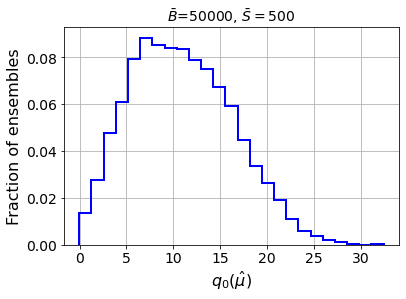

muhat mean:  0.12956785443517818
median q_muhat:  10.57900747544727
Z_KDE:  3.2525386201315536
Z_KDE mu=0:  3.2525386201315536

 -------------------------------- 

Working points, counting over 1 bin:
S_expected =  500
WP: 0     S/B**0.5=  2.23606797749979
WP:  0.25     S/B**0.5=  2.3824779910696416
WP:  0.5     S/B**0.5=  2.5676195212343464
WP:  0.75     S/B**0.5=  2.066460167499881
------------------------


In [8]:
dim=2

#######################
# generate the events #
#######################
    
background_X_1 = np.random.normal(-epsilon,1,N)
background_X_2 = np.random.normal(-epsilon,1,N)
    
signal_X_1 = np.random.normal(epsilon,1,N)
signal_X_2 = np.random.normal(epsilon,1,N)

dim1 = np.concatenate((background_X_1,signal_X_1))
dim2 = np.concatenate((background_X_2,signal_X_2))

# labels
background_Y = np.zeros(N)
signal_Y = np.ones(N)

# DATA in a single matrix (features + labels)
df = pd.DataFrame()
df['dim1'] = dim1.reshape(-1)
df['dim2'] = dim2.reshape(-1)
df['Y'] = np.concatenate((background_Y.astype('int'),signal_Y.astype('int')))

X_gauss = df[['dim1','dim2']].values 
Y_gauss = df[['Y']].values

X_gauss_train, X_gauss_val, Y_gauss_train, Y_gauss_val = train_test_split(X_gauss, Y_gauss, test_size=0.5)


print(X_gauss_train.shape)
print(Y_gauss_train.shape)
print(X_gauss_val.shape)
print(Y_gauss_val.shape)


# PLOT (only 1st feature) to visualize the data
X_gauss_val_SM = []
X_gauss_val_NP = []

for i in range(len(Y_gauss_val)):
    if Y_gauss_val[i] ==0:
        X_gauss_val_SM.append(X_gauss_val[i].tolist())
    else:
        X_gauss_val_NP.append(X_gauss_val[i].tolist())    


X_gauss_val_SM = np.array(X_gauss_val_SM)
X_gauss_val_NP = np.array(X_gauss_val_NP)


weights = np.ones_like(X_gauss_val_SM[:,0])/float(len(X_gauss_val_SM[:,0]))
plt.hist(X_gauss_val_SM[:,0], 20, histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(X_gauss_val_NP[:,0])/float(len(X_gauss_val_NP[:,0]))
plt.hist(X_gauss_val_NP[:,0], 20, histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$x_1$",fontsize=16)
plt.ylabel("Fraction of events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.title(r"Gaussian (dim=%0.2d)" % dim,fontsize=14)
plt.show()  




#######################
# CLASSIFIER: XGBoost #
#######################

# CLASSIFIER
classifier = XGBClassifier(
    n_estimators=500,
    learning_rate=0.1,
    reg_lambda=0.0,reg_alpha=0.0,
    gamma=0.0,objective='binary:logistic',
    max_depth=5)

# FIT
classifier.fit(X_gauss_train,Y_gauss_train,eval_set=[(X_gauss_train, Y_gauss_train), (X_gauss_val, Y_gauss_val)],
        eval_metric='logloss',early_stopping_rounds=50,#early stopping
        verbose=True)

# PREDICTIONS
y_pred_xg = classifier.predict_proba(X_gauss_val).T[1]


# ROC
fpr_gauss_xg, tpr_gauss_xg, _ = roc_curve(Y_gauss_val, y_pred_xg)
roc_auc_xg = auc(fpr_gauss_xg, tpr_gauss_xg)

store_AUC.append(roc_auc_xg)


# PLOT THE ROC WITH AUC
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax0.minorticks_on()


plt.plot(tpr_gauss_xg,1-fpr_gauss_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
plt.plot([1,0],[0,1],ls=":",color="grey")
plt.xlabel("True Positive Rate",fontsize=16)
plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
plt.legend()
plt.title(r"Gaussian (dim=%0.2d) - XGBoost" % dim,fontsize=16)
plt.xlim([0,1])
plt.ylim([0,1])
plt.yticks([0.2,0.4,0.6,0.8,1.])
plt.legend(frameon=False,fontsize=16)
plt.show()




########################
# CLASSIFICATION SCORE #
########################

# Outputs for validation data set

pred_XG_SM = []
pred_XG_NP = []

for i in range(len(Y_gauss_val)):
    if Y_gauss_val[i] == 0:
        pred_XG_SM.append(y_pred_xg[i])
    else:
        pred_XG_NP.append(y_pred_xg[i])
        
        
print('Classification score:')
        
weights = np.ones_like(pred_XG_SM)/float(len(pred_XG_SM))
nSM, binsSM, patchesSM = plt.hist(pred_XG_SM, 100, weights=weights, range=[0,1], histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(pred_XG_NP)/float(len(pred_XG_NP))
nNP, binsNP, patchesNP = plt.hist(pred_XG_NP, 100, weights=weights, range=[0,1], histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Classication score (XGBoost)",fontsize=15)
plt.ylabel("Fraction of events",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
plt.title('Multivariate Gaussian distributions, $\mathcal{N}_{(dim=%0.2d)}$' % dim, fontsize=14)
plt.show()





# INTERPOLATE TO USE AS p_s(x) and p_b(x) ESTIMATES

# center of each bin

binsSM_mid = []
binsNP_mid = []

for i in range(len(binsSM)-1):
    binsSM_mid.append( ((binsSM[i+1]-binsSM[i])/2)+binsSM[i] )
    
for i in range(len(binsNP)-1):
    binsNP_mid.append( ((binsNP[i+1]-binsNP[i])/2)+binsNP[i] )
    

# get the width of each bin
bin_width_SM = binsSM[1] - binsSM[0]
bin_width_NP = binsNP[1] - binsNP[0]
   
    
# Interpolation, cubic
fcubic_XG_SM = interp1d(binsSM_mid, nSM, kind='cubic')
fcubic_XG_NP = interp1d(binsNP_mid, nNP, kind='cubic')


# Normalize

def fcubic_XG_SM_norm(x):
    return fcubic_XG_SM(x)/bin_width_SM

def fcubic_XG_NP_norm(x):
    return fcubic_XG_NP(x)/bin_width_NP


print('Classification score interpolation:')
# x to plot
xnew_XG_SM = np.linspace(min(binsSM_mid), max(binsSM_mid), num=50, endpoint=True)
xnew_XG_NP = np.linspace(min(binsNP_mid), max(binsNP_mid), num=50, endpoint=True)

plt.plot(xnew_XG_SM, fcubic_XG_SM_norm(xnew_XG_SM), '--', color='firebrick', label='Background')
plt.plot(xnew_XG_NP, fcubic_XG_NP_norm(xnew_XG_NP), '--', color='forestgreen', label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Network output",fontsize=16)
plt.ylabel("pdf",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()

print('\n ----------------------------------------- \n')








##################################################
# CLASSIFIER OUTPUT BINNED POISON LOG-LIKELIHOOD #
##################################################

# 10 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(10), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(10), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_10bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_10bins.append(Z_bins_XG_10bins)

print('Z_XG 10 bins: ', Z_bins_XG_10bins)
print('\n ----------------------------------------- \n')




##############################

# 25 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(25), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(25), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_25bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_25bins.append(Z_bins_XG_25bins)

print('Z_XG 25 bins: ', Z_bins_XG_25bins)
print('\n ----------------------------------------- \n')




##############################

# 50 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(50), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(50), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_50bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_50bins.append(Z_bins_XG_50bins)

print('Z_XG 50 bins: ', Z_bins_XG_50bins)
print('\n ----------------------------------------- \n')




##############################

# 100 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(100), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(100), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_100bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_100bins.append(Z_bins_XG_100bins)

print('Z_XG 100 bins: ', Z_bins_XG_100bins)
print('\n ----------------------------------------- \n')








###################################
# TRUE PDF LIKELIHOOD (GAUSSIANS) #
###################################

print('TRUE PDF LIKELIHOOD (GAUSSIANS):')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print('S/$\sqrt{B}$: ', SsqrtB)
print('n_ensembles (initial): ', n_ensembles)


# to construct ensembles B and S events are taken from Poisson distributions
mu = S_expected + B_expected


# Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

# around the mean its populated so let's try (proposed range to be checked)
list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
to_check = len(list_events_per_ensembles)

# I want at least one ensemble populated
list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



# Remove from the list the elements without at least 1 ensemble possible
for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] > 1:
        list_events_per_ensembles = list_events_per_ensembles[i:]
        list_nums_ensembles = list_nums_ensembles[i:]
        break


for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] < 1:
        list_events_per_ensembles = list_events_per_ensembles[:i]
        list_nums_ensembles = list_nums_ensembles[:i]
        break

print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

print('n_ensembles (actual): ', sum(list_nums_ensembles))



# lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

p_berno = S_expected/(S_expected+B_expected)

list_S_per_ensembles = []
list_B_per_ensembles = []

for jj in range(len(list_events_per_ensembles)):
    list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
    list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

######
# NOW I HAVE 4 LISTS:
# list_events_per_ensembles     list with the number of events per ensemble (its a range)
# list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
# list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
# list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
######



print('This may take long...')


#############################
# NOW LETS APPLY THE METHOD #
#############################
muhat_selected_list = []
q_muhat = []

for bb in range(len(list_nums_ensembles)):

    for kk in range(list_nums_ensembles[bb]):

#         # SIGNAL events in an ensemble
#         NP_shuf = shuffle(X_gauss_val_NP)[:list_S_per_ensembles[bb]]

#         prob_NP_given_B = [] # p_b(S_ensemble)
#         prob_NP_given_S = [] # p_s(S_ensemble)

#         for ll in range(len(NP_shuf)):
#             prob_NP_given_S.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (NP_shuf[ll,0]-epsilon)**2 + (NP_shuf[ll,1]-epsilon)**2 ) ) )
#             prob_NP_given_B.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (NP_shuf[ll,0]+epsilon)**2 + (NP_shuf[ll,1]+epsilon)**2 ) ) )


        # BACKGROUND events in an ensemble
        SM_shuf = shuffle(X_gauss_val_SM)[:list_B_per_ensembles[bb]]

        prob_SM_given_B = [] # p_b(B_ensemble)
        prob_SM_given_S = [] # p_s(B_ensemble)

        for ll in range(len(SM_shuf)):
            prob_SM_given_S.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (SM_shuf[ll,0]-epsilon)**2 + (SM_shuf[ll,1]-epsilon)**2 ) ) )
            prob_SM_given_B.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (SM_shuf[ll,0]+epsilon)**2 + (SM_shuf[ll,1]+epsilon)**2 ) ) )


        # p_b(x_ensemble) =    concatenate: p_b(B_ensemble) and p_b(S_ensemble)
        prob_x_given_B = prob_SM_given_B #+ prob_NP_given_B

        # p_s(x_ensemble) =    concatenate: p_s(B_ensemble) and p_s(S_ensemble)
        prob_x_given_S = prob_SM_given_S #+ prob_NP_given_S




        # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
        # WE NEED TO ESTIMATE mu_hat for this particular ensemble
        # we are going to obtain a mu_hat with a grid of values for this particular ensemble



        mu_hat_condition_equal_1 = []

        # grid, mu_hat is around 1
        muhat_test = np.arange(0., 1.5, 0.1).tolist()

        B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

        for vv in range(len(muhat_test)):

            mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



        muhat_selected = 0.01

        # from the grid, select the mu_hat such that the condition is equal to 1
        if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 > 0:
                    muhat_selected = muhat_test[ll]
                    break


        if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 < 0:
                    muhat_selected = muhat_test[ll]
                    break


        muhat_selected_list.append(muhat_selected)



        # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
        # and append it (we need the median over lots of ensembles)
        q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (muhat_selected*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )  ) )



# Histogram of q_muhats

weights = np.ones_like(q_muhat)/float(len(q_muhat))
nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
plt.ylabel("Fraction of ensembles",fontsize=16)
plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected),fontsize=14)
plt.grid()
plt.show()


# Finally calculate muhat_mean and Z_gaussian
muhat_mean_gaussian = np.mean(muhat_selected_list)
store_muhat_mean_gaussian.append(muhat_mean_gaussian)

# Remove nan if any
q_muhat = [x for x in q_muhat if x == x]

q_muhat_median = np.median(q_muhat)

Z_gaussian = abs(q_muhat_median)**0.5
store_Z_gaussian.append(Z_gaussian)

print('muhat mean: ', muhat_mean_gaussian)
print('median q_muhat: ', q_muhat_median)
print('Z_gaussian: ', Z_gaussian)


print('\n ------------------------------------ \n')


    
    
    


    
#########
#  KDE  #
#########  

print(' MLL + KDE ')

# FIND THE BANDWIDTH

# bandwidth = np.logspace(-4.0, 0, 20)

# kde = KernelDensity(kernel='epanechnikov')
# grid = GridSearchCV(kde, {'bandwidth': bandwidth})
# grid.fit(np.c_[pred_XG_SM[:50000]])
# print('Background: ', grid.best_estimator_)

# SM_bandwidth = grid.best_estimator_.bandwidth



# kde = KernelDensity(kernel='epanechnikov')
# grid = GridSearchCV(kde, {'bandwidth': bandwidth})
# grid.fit(np.c_[pred_XG_NP[:50000]])
# print('Signal: ', grid.best_estimator_)

# NP_bandwidth = grid.best_estimator_.bandwidth

SM_bandwidth = 0.012742749857031334
NP_bandwidth = 0.012742749857031334


# with each calculated bandwidth estimate the pdf with KDE to the classifier output (for background and signal)
# notice: epanechnikov kernel
kde_bkg = KernelDensity(kernel='epanechnikov', bandwidth=SM_bandwidth).fit(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ])
kde_sig = KernelDensity(kernel='epanechnikov', bandwidth=NP_bandwidth).fit(np.c_[pred_XG_NP, np.ones(len(pred_XG_NP)) ])


# range (~between 0 and 1)
min_val = np.min([np.min(pred_XG_SM),np.min(pred_XG_NP)])
max_val = np.max([np.max(pred_XG_SM),np.max(pred_XG_NP)])

s_vals = np.linspace(min_val,max_val,1000)





# evaluate the densities for each value of s (~bins)
dens_bkg = np.exp(kde_bkg.score_samples(np.c_[s_vals, np.zeros(len(s_vals)) ]) )
dens_sig = np.exp(kde_sig.score_samples(np.c_[s_vals, np.ones(len(s_vals)) ]) )





# Normalize to 1
# Area
factor_aux_SM = sum(dens_bkg*(s_vals[1]-s_vals[0]))
factor_aux_NP = sum(dens_sig*(s_vals[1]-s_vals[0]))

# normalize
dens_bkg = dens_bkg / factor_aux_SM
dens_sig = dens_sig / factor_aux_NP







# plot to check the estimation

plt.figure()

plt.hist(pred_XG_SM,density=True,bins=50,color='red',alpha=0.25,label=r'Binned $\tilde{p}_{b}(o(x))$');
plt.plot(s_vals,dens_bkg,color='red',label=r'KDE $\tilde{p}_{b}(o(x))$',linestyle='dashed');

plt.hist(pred_XG_NP,density=True,bins=50,color='blue',alpha=0.25,label=r'Binned $\tilde{p}_{s}(o(x))$');
plt.plot(s_vals,dens_sig,color='blue',label=r'KDE $\tilde{p}_{s}(o(x))$',linestyle='dashed');

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("o(x)",fontsize=15)
plt.ylabel("PDF",fontsize=14)
plt.grid()
plt.legend(loc="lower center", fontsize=11, handlelength=2.5)
#plt.title(r'Multivariate Gaussian distributions, $\mathcal{N}_{dim}$', fontsize=14)
#plt.savefig('images/' + 'Ndimgaussian-output.pdf', format="pdf", bbox_inches="tight")
plt.show()





# We can do a quick Z bin-loglikelihood calculation using the computed KDE
# this is to check the KDE here, because we use KDE to avoid binning


# B events in each bin: 
# total number of B * B_pdf value in each bin * bin size
Bd = B_expected*dens_bkg*(s_vals[1]-s_vals[0])


# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
Bd_noceros = []
for i in range(len(Bd)):
    if Bd[i]!=0:
        Bd_noceros.append(Bd[i])

min_back = min(Bd_noceros)

# replace the zeros
for i in range(len(Bd)):
    if Bd[i]==0:
        Bd[i] = min_back


# S events in each bin: 
# value of S/sqrt{B} * sqrt{B} * S_pdf value in each bin * bin size
Sd = SsqrtB*np.sqrt(B_expected)*dens_sig*(s_vals[1]-s_vals[0])


# Z value:
#Z_KDE_bins = np.sqrt(2.0*np.sum(((Sd+Bd)*np.log(1.0+Sd/Bd)-Sd))) # Discovery
Z_KDE_bins = np.sqrt(2.0*np.sum(Bd*np.log(Bd/(Sd+Bd))+Sd)) # Exclusion

store_Z_KDE_bins.append(Z_KDE_bins)

print('Z_KDE_bins : ', Z_KDE_bins)



    
    
    
#############
# MLL + KDE #
#############
    
# FOR EXCLUSION:
# we need to evaluate the KDE densities with the classifier output of BACKGROUND EVENTS

# FOR DISCOVERY:
# we need to evaluate the KDE densities with the classifier output of BACKGROUND and SIGNAL EVENTS

KDE_SM_pred_SM = np.exp(kde_bkg.score_samples(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ]) )
KDE_NP_pred_SM = np.exp(kde_sig.score_samples(np.c_[pred_XG_SM, np.ones(len(pred_XG_SM)) ]) )


# Normalize

KDE_SM_pred_SM = KDE_SM_pred_SM / factor_aux_SM
KDE_NP_pred_SM = KDE_NP_pred_SM / factor_aux_NP




indices = [i for i in range(len(KDE_NP_pred_SM))]


# the first part is the same as before, but we repeat it, it is not the expensive part

print('\n')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)
print('n_ensembles (initial): ', n_ensembles)


# to construct ensembles B and S events are taken from Poisson distributions
mu = S_expected + B_expected


# Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

# around the mean its populated so let's try (proposed range to be checked)
list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
to_check = len(list_events_per_ensembles)

# I want at least one ensemble populated
list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



# Remove from the list the elements without at least 1 ensemble possible
for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] > 1:
        list_events_per_ensembles = list_events_per_ensembles[i:]
        list_nums_ensembles = list_nums_ensembles[i:]
        break


for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] < 1:
        list_events_per_ensembles = list_events_per_ensembles[:i]
        list_nums_ensembles = list_nums_ensembles[:i]
        break

print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

print('n_ensembles (actual): ', sum(list_nums_ensembles))



# lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

p_berno = S_expected/(S_expected+B_expected)

list_S_per_ensembles = []
list_B_per_ensembles = []

for jj in range(len(list_events_per_ensembles)):
    list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
    list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

######
# NOW I HAVE 4 LISTS:
# list_events_per_ensembles     list with the number of events per ensemble (its a range)
# list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
# list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
# list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
######



print('\n This may take long... \n')


# NOW LETS APPLY THE METHOD

muhat_selected_list = []
q_muhat = []
q_muhat_mu0 = []

for bb in range(len(list_nums_ensembles)):

    for kk in range(list_nums_ensembles[bb]):

        # KDE
        ran_ind = np.random.choice(indices, list_B_per_ensembles[bb])

        KDE_SM_pred_SM_shuf = []
        KDE_NP_pred_SM_shuf = []

        for i in ran_ind:
            KDE_SM_pred_SM_shuf.append(KDE_SM_pred_SM[i])
            KDE_NP_pred_SM_shuf.append(KDE_NP_pred_SM[i])

        KDE_SM_pred_SM_shuf  = np.array(KDE_SM_pred_SM_shuf)
        KDE_NP_pred_SM_shuf  = np.array(KDE_NP_pred_SM_shuf)



        # p_b(o(x_ensemble)) =    concatenate: p_b(o(B_ensemble)) and p_b(o(S_ensemble))  NOTICE THE o(x)
        prob_x_given_B = np.ndarray.tolist( KDE_SM_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_SM_pred_NP_shuf )

        # p_s(o(x_ensemble)) =    concatenate: p_s(o(B_ensemble)) and p_s(o(S_ensemble))  NOTICE THE o(x)
        prob_x_given_S = np.ndarray.tolist( KDE_NP_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_NP_pred_NP_shuf )





        # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
        # WE NEED TO ESTIMATE mu_hat for this particular ensemble
        # we are going to obtain a mu_hat with a grid of values for this particular ensemble



        mu_hat_condition_equal_1 = []

        # grid, mu_hat is around 1
        muhat_test = np.arange(0., 1.5, 0.1).tolist()

        B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

        for vv in range(len(muhat_test)):

            mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



        muhat_selected = 0.01

        # from the grid, select the mu_hat such that the condition is equal to 1
        if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 > 0:
                    muhat_selected = muhat_test[ll]
                    break


        if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 < 0:
                    muhat_selected = muhat_test[ll]
                    break


        muhat_selected_list.append(muhat_selected)



        # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
        # and append it (we need the median over lots of ensembles)
        #q_muhat.append( 2 * ( (-1.*muhat_selected * S_expected) + sum( [np.log( 1 + ( (muhat_selected*S_expected/B_expected) * (x / y) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] ) ) )
        # EXCLUSION:
        q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (muhat_selected*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
) )
        q_muhat_mu0.append( 2 * ( ( (1.-0.) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (0.*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
) )


# Histogram of q_muhats

weights = np.ones_like(q_muhat)/float(len(q_muhat))
nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)
#plt.xlim(0,1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
plt.ylabel("Fraction of ensembles",fontsize=16)
plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected),fontsize=14)
plt.grid()
#plt.legend(fontsize=14)
plt.show()


# Finally calculate muhat_mean and Z_gaussian

# Remove nan if any
q_muhat_mu0 = [x for x in q_muhat_mu0 if x == x]

q_muhat_median_mu0 = np.median(q_muhat_mu0)

Z_KDE_mu0 = abs(q_muhat_median_mu0)**0.5
store_Z_MLL_KDE_mu0.append(Z_KDE_mu0)


# Finally calculate muhat_mean and Z_gaussian
muhat_mean_MLL_KDE = np.mean(muhat_selected_list)
store_muhat_mean_MLL_KDE.append(muhat_mean_MLL_KDE)

# Remove nan if any
q_muhat = [x for x in q_muhat if x == x]

q_muhat_median = np.median(q_muhat)

Z_KDE = abs(q_muhat_median)**0.5
store_Z_MLL_KDE.append(Z_KDE)

print('muhat mean: ', muhat_mean_MLL_KDE)
print('median q_muhat: ', q_muhat_median)
print('Z_KDE: ', Z_KDE)
print('Z_KDE mu=0: ', Z_KDE_mu0)

print('\n -------------------------------- \n')
    
    

    
    
    
    
    
    
#######################################
# Working points, counting over 1 bin #
#######################################

print('Working points, counting over 1 bin:')

# BACKGROUND 

# number of background ensembles
B_ensembles = int(len(pred_XG_SM)/B_expected)

# shorten the number of B events so I get an integer number of ensembles
pred_XG_SM_entero = pred_XG_SM[:int(len(pred_XG_SM)/B_expected) * B_expected]

XG_SM_passWP0 = 0
XG_SM_passWP1 = 0
XG_SM_passWP2 = 0

for i in range(len(pred_XG_SM_entero)):
    if pred_XG_SM_entero[i] > WP[0]:
        XG_SM_passWP0 += 1
    if pred_XG_SM_entero[i] > WP[1]:
        XG_SM_passWP1 += 1
    if pred_XG_SM_entero[i] > WP[2]:
        XG_SM_passWP2 += 1



# SIGNAL

# number of signal ensembles
S_ensembles = int(len(pred_XG_NP)/S_expected)

# shorten the number of S events so I get an integer number of ensembles
pred_XG_NP_entero = pred_XG_NP[:int(len(pred_XG_NP)/S_expected) * S_expected]

XG_NP_passWP0 = 0
XG_NP_passWP1 = 0
XG_NP_passWP2 = 0

for i in range(len(pred_XG_NP_entero)):
    if pred_XG_NP_entero[i] > WP[0]:
        XG_NP_passWP0 += 1
    if pred_XG_NP_entero[i] > WP[1]:
        XG_NP_passWP1 += 1
    if pred_XG_NP_entero[i] > WP[2]:
        XG_NP_passWP2 += 1

Z_WP0 = ( XG_NP_passWP0 / S_ensembles ) / ( XG_SM_passWP0 / B_ensembles )**0.5
Z_WP1 = ( XG_NP_passWP1 / S_ensembles ) / ( XG_SM_passWP1 / B_ensembles )**0.5
Z_WP2 = ( XG_NP_passWP2 / S_ensembles ) / ( XG_SM_passWP2 / B_ensembles )**0.5


# save the results Z_binned after WP
SrootB_WP0.append( Z_WP0 )
SrootB_WP1.append( Z_WP1 )
SrootB_WP2.append( Z_WP2 )

print('S_expected = ', S_expected)
print('WP: 0     S/B**0.5= ', S_expected/(B_expected)**0.5)
print('WP: ', WP[0], '    S/B**0.5= ', Z_WP0 )
print('WP: ', WP[1], '    S/B**0.5= ', Z_WP1 )
print('WP: ', WP[2], '    S/B**0.5= ', Z_WP2 )
print('------------------------')

In [9]:
print('dim = ', dim)

print(roc_auc_xg)

print(Z_bins_XG_10bins)
print(Z_bins_XG_25bins)
print(Z_bins_XG_50bins)
print(Z_bins_XG_100bins)

print(muhat_mean_gaussian)
print(Z_gaussian)

print(muhat_mean_MLL_KDE)
print(Z_KDE_bins)
print(Z_KDE)
print(Z_KDE_mu0)

print(Z_WP0)
print(Z_WP1)
print(Z_WP2)

dim =  2
0.7260542944336169
3.122876033542218
3.1590626478621906
3.164848396881707
3.1675771535129655
0.10467886927325896
3.373686744397584
0.12956785443517818
3.164622894600369
3.2525386201315536
3.2525386201315536
2.3824779910696416
2.5676195212343464
2.066460167499881


In [ ]:
# To use if you dont want to run everything again. Store the previous results
store_AUC.append()

store_Z_bins_XG_10bins.append()
store_Z_bins_XG_25bins.append()
store_Z_bins_XG_50bins.append()
store_Z_bins_XG_100bins.append()

store_muhat_mean_gaussian.append()
store_Z_gaussian.append()

store_muhat_mean_MLL_KDE.append()
store_Z_KDE_bins.append()
store_Z_MLL_KDE.append()
store_Z_MLL_KDE_mu0.append()

SrootB_WP0.append()
SrootB_WP1.append()
SrootB_WP2.append()

## Dim=3

(1000000, 3)
(1000000, 1)
(1000000, 3)
(1000000, 1)


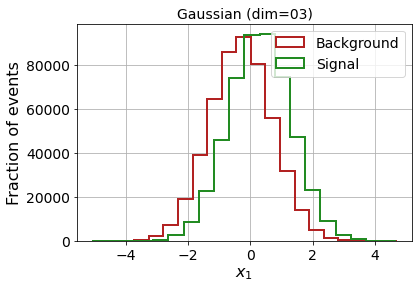

/home/perez/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y

[0]	validation_0-logloss:0.67560	validation_1-logloss:0.67571
[1]	validation_0-logloss:0.66075	validation_1-logloss:0.66095
[2]	validation_0-logloss:0.64850	validation_1-logloss:0.64881
[3]	validation_0-logloss:0.63809	validation_1-logloss:0.63846
[4]	validation_0-logloss:0.62915	validation_1-logloss:0.62959
[5]	validation_0-logloss:0.62177	validation_1-logloss:0.62231
[6]	validation_0-logloss:0.61528	validation_1-logloss:0.61587
[7]	validation_0-logloss:0.60982	validation_1-logloss:0.61046
[8]	validation_0-logloss:0.60511	validation_1-logloss:0.60581
[9]	validation_0-logloss:0.60094	validation_1-logloss:0.60172
[10]	validation_0-logloss:0.59741	validation_1-logloss:0.59823
[11]	validation_0-logloss:0.59433	validation_1-logloss:0.59520
[12]	validation_0-logloss:0.59163	validation_1-logloss:0.59253
[13]	validation_0-logloss:0.58929	validation_1-logloss:0.59027
[14]	validation_0-logloss:0.58724	validation_1-logloss:0.58825
[15]	validation_0-logloss:0.58545	validation_1-logloss:0.58650
[1

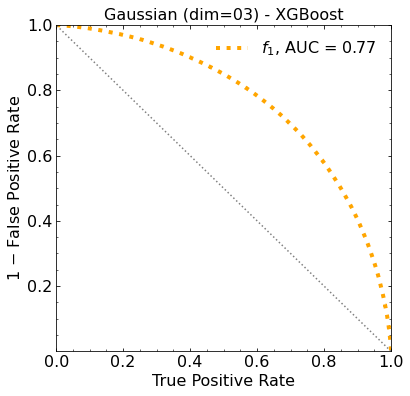

Classification score:


Substituting symbol N from STIXNonUnicode
Substituting symbol N from STIXNonUnicode


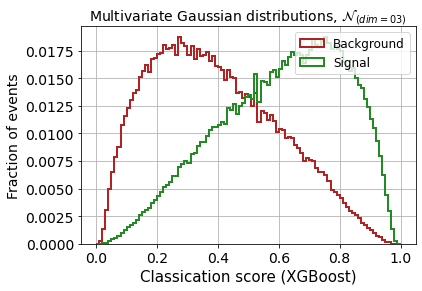

Classification score interpolation:


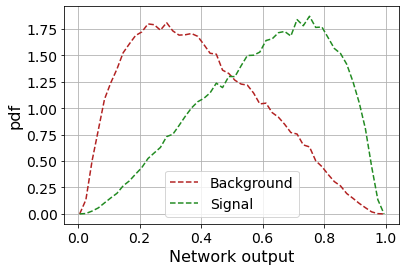


 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 10 bins:  3.628491383644415

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 25 bins:  3.7012937227171596

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 50 bins:  3.7216126257656734

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 100 bins:  3.733322341462142

 ----------------------------------------- 

TRUE PDF LIKELIHOOD (GAUSSIANS):
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
n_ensembles (initial):  10000

 If  10100  =  1009    then the proposed range has to be extended
n_ensembles (actual):  9233
This may take long...


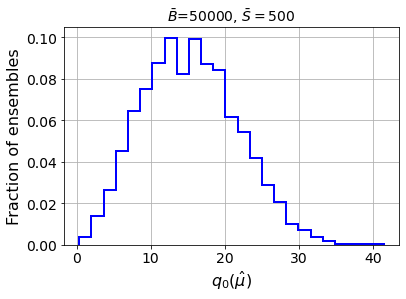

muhat mean:  0.10211198960251275
median q_muhat:  15.178970998721297
Z_gaussian:  3.896019891982239

 ------------------------------------ 

 MLL + KDE 


/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:788: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,


Background:  KernelDensity(algorithm='auto', atol=0, bandwidth=0.0206913808111479,
              breadth_first=True, kernel='epanechnikov', leaf_size=40,
              metric='euclidean', metric_params=None, rtol=0)


/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:788: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,


Signal:  KernelDensity(algorithm='auto', atol=0, bandwidth=0.007847599703514606,
              breadth_first=True, kernel='epanechnikov', leaf_size=40,
              metric='euclidean', metric_params=None, rtol=0)


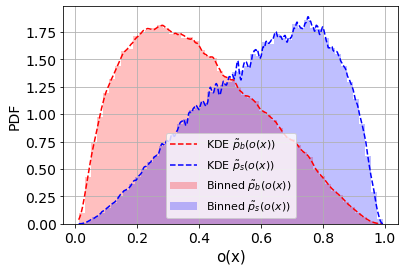

Z_KDE_bins :  3.698832113245229


B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
n_ensembles (initial):  10000

 If  10100  =  1009    then the proposed range has to be extended
n_ensembles (actual):  9233

 This may take long... 



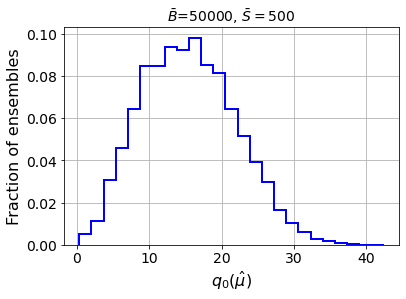

muhat mean:  0.09518033141990685
median q_muhat:  15.259787127051823
Z_KDE:  3.9063777501736596
Z_KDE mu=0:  3.9063777501736596

 -------------------------------- 

Working points, counting over 1 bin:
S_expected =  500
WP: 0     S/B**0.5=  2.23606797749979
WP:  0.25     S/B**0.5=  2.507515858008465
WP:  0.5     S/B**0.5=  2.8421177284803627
WP:  0.75     S/B**0.5=  2.758078617795226
------------------------


In [10]:
dim=3

#######################
# generate the events #
#######################
    
background_X_1 = np.random.normal(-epsilon,1,N)
background_X_2 = np.random.normal(-epsilon,1,N)
background_X_3 = np.random.normal(-epsilon,1,N)
    
signal_X_1 = np.random.normal(epsilon,1,N)
signal_X_2 = np.random.normal(epsilon,1,N)
signal_X_3 = np.random.normal(epsilon,1,N)

dim1 = np.concatenate((background_X_1,signal_X_1))
dim2 = np.concatenate((background_X_2,signal_X_2))
dim3 = np.concatenate((background_X_3,signal_X_3))

# labels
background_Y = np.zeros(N)
signal_Y = np.ones(N)

# DATA in a single matrix (features + labels)
df = pd.DataFrame()
df['dim1'] = dim1.reshape(-1)
df['dim2'] = dim2.reshape(-1)
df['dim3'] = dim3.reshape(-1)
df['Y'] = np.concatenate((background_Y.astype('int'),signal_Y.astype('int')))

X_gauss = df[['dim1','dim2','dim3']].values 
Y_gauss = df[['Y']].values

X_gauss_train, X_gauss_val, Y_gauss_train, Y_gauss_val = train_test_split(X_gauss, Y_gauss, test_size=0.5)


print(X_gauss_train.shape)
print(Y_gauss_train.shape)
print(X_gauss_val.shape)
print(Y_gauss_val.shape)


# PLOT (only 1st feature) to visualize the data
X_gauss_val_SM = []
X_gauss_val_NP = []

for i in range(len(Y_gauss_val)):
    if Y_gauss_val[i] ==0:
        X_gauss_val_SM.append(X_gauss_val[i].tolist())
    else:
        X_gauss_val_NP.append(X_gauss_val[i].tolist())    


X_gauss_val_SM = np.array(X_gauss_val_SM)
X_gauss_val_NP = np.array(X_gauss_val_NP)


weights = np.ones_like(X_gauss_val_SM[:,0])/float(len(X_gauss_val_SM[:,0]))
plt.hist(X_gauss_val_SM[:,0], 20, histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(X_gauss_val_NP[:,0])/float(len(X_gauss_val_NP[:,0]))
plt.hist(X_gauss_val_NP[:,0], 20, histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$x_1$",fontsize=16)
plt.ylabel("Fraction of events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.title(r"Gaussian (dim=%0.2d)" % dim,fontsize=14)
plt.show()  




#######################
# CLASSIFIER: XGBoost #
#######################

# CLASSIFIER
classifier = XGBClassifier(
    n_estimators=500,
    learning_rate=0.1,
    reg_lambda=0.0,reg_alpha=0.0,
    gamma=0.0,objective='binary:logistic',
    max_depth=5)

# FIT
classifier.fit(X_gauss_train,Y_gauss_train,eval_set=[(X_gauss_train, Y_gauss_train), (X_gauss_val, Y_gauss_val)],
        eval_metric='logloss',early_stopping_rounds=50,#early stopping
        verbose=True)

# PREDICTIONS
y_pred_xg = classifier.predict_proba(X_gauss_val).T[1]


# ROC
fpr_gauss_xg, tpr_gauss_xg, _ = roc_curve(Y_gauss_val, y_pred_xg)
roc_auc_xg = auc(fpr_gauss_xg, tpr_gauss_xg)

store_AUC.append(roc_auc_xg)


# PLOT THE ROC WITH AUC
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax0.minorticks_on()


plt.plot(tpr_gauss_xg,1-fpr_gauss_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
plt.plot([1,0],[0,1],ls=":",color="grey")
plt.xlabel("True Positive Rate",fontsize=16)
plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
plt.legend()
plt.title(r"Gaussian (dim=%0.2d) - XGBoost" % dim,fontsize=16)
plt.xlim([0,1])
plt.ylim([0,1])
plt.yticks([0.2,0.4,0.6,0.8,1.])
plt.legend(frameon=False,fontsize=16)
plt.show()




########################
# CLASSIFICATION SCORE #
########################

# Outputs for validation data set

pred_XG_SM = []
pred_XG_NP = []

for i in range(len(Y_gauss_val)):
    if Y_gauss_val[i] == 0:
        pred_XG_SM.append(y_pred_xg[i])
    else:
        pred_XG_NP.append(y_pred_xg[i])
        
        
print('Classification score:')
        
weights = np.ones_like(pred_XG_SM)/float(len(pred_XG_SM))
nSM, binsSM, patchesSM = plt.hist(pred_XG_SM, 100, weights=weights, range=[0,1], histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(pred_XG_NP)/float(len(pred_XG_NP))
nNP, binsNP, patchesNP = plt.hist(pred_XG_NP, 100, weights=weights, range=[0,1], histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Classication score (XGBoost)",fontsize=15)
plt.ylabel("Fraction of events",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
plt.title('Multivariate Gaussian distributions, $\mathcal{N}_{(dim=%0.2d)}$' % dim, fontsize=14)
plt.show()





# INTERPOLATE TO USE AS p_s(x) and p_b(x) ESTIMATES

# center of each bin

binsSM_mid = []
binsNP_mid = []

for i in range(len(binsSM)-1):
    binsSM_mid.append( ((binsSM[i+1]-binsSM[i])/2)+binsSM[i] )
    
for i in range(len(binsNP)-1):
    binsNP_mid.append( ((binsNP[i+1]-binsNP[i])/2)+binsNP[i] )
    

# get the width of each bin
bin_width_SM = binsSM[1] - binsSM[0]
bin_width_NP = binsNP[1] - binsNP[0]
   
    
# Interpolation, cubic
fcubic_XG_SM = interp1d(binsSM_mid, nSM, kind='cubic')
fcubic_XG_NP = interp1d(binsNP_mid, nNP, kind='cubic')


# Normalize

def fcubic_XG_SM_norm(x):
    return fcubic_XG_SM(x)/bin_width_SM

def fcubic_XG_NP_norm(x):
    return fcubic_XG_NP(x)/bin_width_NP


print('Classification score interpolation:')
# x to plot
xnew_XG_SM = np.linspace(min(binsSM_mid), max(binsSM_mid), num=50, endpoint=True)
xnew_XG_NP = np.linspace(min(binsNP_mid), max(binsNP_mid), num=50, endpoint=True)

plt.plot(xnew_XG_SM, fcubic_XG_SM_norm(xnew_XG_SM), '--', color='firebrick', label='Background')
plt.plot(xnew_XG_NP, fcubic_XG_NP_norm(xnew_XG_NP), '--', color='forestgreen', label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Network output",fontsize=16)
plt.ylabel("pdf",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()

print('\n ----------------------------------------- \n')








##################################################
# CLASSIFIER OUTPUT BINNED POISON LOG-LIKELIHOOD #
##################################################

# 10 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(10), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(10), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_10bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_10bins.append(Z_bins_XG_10bins)

print('Z_XG 10 bins: ', Z_bins_XG_10bins)
print('\n ----------------------------------------- \n')




##############################

# 25 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(25), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(25), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_25bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_25bins.append(Z_bins_XG_25bins)

print('Z_XG 25 bins: ', Z_bins_XG_25bins)
print('\n ----------------------------------------- \n')




##############################

# 50 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(50), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(50), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_50bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_50bins.append(Z_bins_XG_50bins)

print('Z_XG 50 bins: ', Z_bins_XG_50bins)
print('\n ----------------------------------------- \n')




##############################

# 100 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(100), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(100), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_100bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_100bins.append(Z_bins_XG_100bins)

print('Z_XG 100 bins: ', Z_bins_XG_100bins)
print('\n ----------------------------------------- \n')








###################################
# TRUE PDF LIKELIHOOD (GAUSSIANS) #
###################################

print('TRUE PDF LIKELIHOOD (GAUSSIANS):')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print('S/$\sqrt{B}$: ', SsqrtB)
print('n_ensembles (initial): ', n_ensembles)


# to construct ensembles B and S events are taken from Poisson distributions
mu = S_expected + B_expected


# Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

# around the mean its populated so let's try (proposed range to be checked)
list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
to_check = len(list_events_per_ensembles)

# I want at least one ensemble populated
list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



# Remove from the list the elements without at least 1 ensemble possible
for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] > 1:
        list_events_per_ensembles = list_events_per_ensembles[i:]
        list_nums_ensembles = list_nums_ensembles[i:]
        break


for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] < 1:
        list_events_per_ensembles = list_events_per_ensembles[:i]
        list_nums_ensembles = list_nums_ensembles[:i]
        break

print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

print('n_ensembles (actual): ', sum(list_nums_ensembles))



# lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

p_berno = S_expected/(S_expected+B_expected)

list_S_per_ensembles = []
list_B_per_ensembles = []

for jj in range(len(list_events_per_ensembles)):
    list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
    list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

######
# NOW I HAVE 4 LISTS:
# list_events_per_ensembles     list with the number of events per ensemble (its a range)
# list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
# list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
# list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
######



print('This may take long...')


#############################
# NOW LETS APPLY THE METHOD #
#############################
muhat_selected_list = []
q_muhat = []

for bb in range(len(list_nums_ensembles)):

    for kk in range(list_nums_ensembles[bb]):

#         # SIGNAL events in an ensemble
#         NP_shuf = shuffle(X_gauss_val_NP)[:list_S_per_ensembles[bb]]

#         prob_NP_given_B = [] # p_b(S_ensemble)
#         prob_NP_given_S = [] # p_s(S_ensemble)

#         for ll in range(len(NP_shuf)):
#             prob_NP_given_S.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (NP_shuf[ll,0]-epsilon)**2 + (NP_shuf[ll,1]-epsilon)**2 + (NP_shuf[ll,2]-epsilon)**2 ) ) )
#             prob_NP_given_B.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (NP_shuf[ll,0]+epsilon)**2 + (NP_shuf[ll,1]+epsilon)**2 + (NP_shuf[ll,2]+epsilon)**2 ) ) )


        # BACKGROUND events in an ensemble
        SM_shuf = shuffle(X_gauss_val_SM)[:list_B_per_ensembles[bb]]

        prob_SM_given_B = [] # p_b(B_ensemble)
        prob_SM_given_S = [] # p_s(B_ensemble)

        for ll in range(len(SM_shuf)):
            prob_SM_given_S.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (SM_shuf[ll,0]-epsilon)**2 + (SM_shuf[ll,1]-epsilon)**2 + (SM_shuf[ll,2]-epsilon)**2 ) ) )
            prob_SM_given_B.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (SM_shuf[ll,0]+epsilon)**2 + (SM_shuf[ll,1]+epsilon)**2 + (SM_shuf[ll,2]+epsilon)**2 ) ) )


        # p_b(x_ensemble) =    concatenate: p_b(B_ensemble) and p_b(S_ensemble)
        prob_x_given_B = prob_SM_given_B #+ prob_NP_given_B

        # p_s(x_ensemble) =    concatenate: p_s(B_ensemble) and p_s(S_ensemble)
        prob_x_given_S = prob_SM_given_S #+ prob_NP_given_S




        # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
        # WE NEED TO ESTIMATE mu_hat for this particular ensemble
        # we are going to obtain a mu_hat with a grid of values for this particular ensemble



        mu_hat_condition_equal_1 = []

        # grid, mu_hat is around 1
        muhat_test = np.arange(0., 1.5, 0.1).tolist()

        B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

        for vv in range(len(muhat_test)):

            mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



        muhat_selected = 0.01

        # from the grid, select the mu_hat such that the condition is equal to 1
        if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 > 0:
                    muhat_selected = muhat_test[ll]
                    break


        if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 < 0:
                    muhat_selected = muhat_test[ll]
                    break


        muhat_selected_list.append(muhat_selected)



        # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
        # and append it (we need the median over lots of ensembles)
        q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (muhat_selected*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )  ) )



# Histogram of q_muhats

weights = np.ones_like(q_muhat)/float(len(q_muhat))
nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
plt.ylabel("Fraction of ensembles",fontsize=16)
plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected),fontsize=14)
plt.grid()
plt.show()


# Finally calculate muhat_mean and Z_gaussian
muhat_mean_gaussian = np.mean(muhat_selected_list)
store_muhat_mean_gaussian.append(muhat_mean_gaussian)

# Remove nan if any
q_muhat = [x for x in q_muhat if x == x]

q_muhat_median = np.median(q_muhat)

Z_gaussian = abs(q_muhat_median)**0.5
store_Z_gaussian.append(Z_gaussian)

print('muhat mean: ', muhat_mean_gaussian)
print('median q_muhat: ', q_muhat_median)
print('Z_gaussian: ', Z_gaussian)


print('\n ------------------------------------ \n')


    
    
    


    
#########
#  KDE  #
#########  

print(' MLL + KDE ')

# FIND THE BANDWIDTH

bandwidth = np.logspace(-4.0, 0, 20)

kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_SM[:50000]])
print('Background: ', grid.best_estimator_)

SM_bandwidth = grid.best_estimator_.bandwidth



kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_NP[:50000]])
print('Signal: ', grid.best_estimator_)

NP_bandwidth = grid.best_estimator_.bandwidth




# with each calculated bandwidth estimate the pdf with KDE to the classifier output (for background and signal)
# notice: epanechnikov kernel
kde_bkg = KernelDensity(kernel='epanechnikov', bandwidth=SM_bandwidth).fit(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ])
kde_sig = KernelDensity(kernel='epanechnikov', bandwidth=NP_bandwidth).fit(np.c_[pred_XG_NP, np.ones(len(pred_XG_NP)) ])


# range (~between 0 and 1)
min_val = np.min([np.min(pred_XG_SM),np.min(pred_XG_NP)])
max_val = np.max([np.max(pred_XG_SM),np.max(pred_XG_NP)])

s_vals = np.linspace(min_val,max_val,1000)





# evaluate the densities for each value of s (~bins)
dens_bkg = np.exp(kde_bkg.score_samples(np.c_[s_vals, np.zeros(len(s_vals)) ]) )
dens_sig = np.exp(kde_sig.score_samples(np.c_[s_vals, np.ones(len(s_vals)) ]) )





# Normalize to 1
# Area
factor_aux_SM = sum(dens_bkg*(s_vals[1]-s_vals[0]))
factor_aux_NP = sum(dens_sig*(s_vals[1]-s_vals[0]))

# normalize
dens_bkg = dens_bkg / factor_aux_SM
dens_sig = dens_sig / factor_aux_NP







# plot to check the estimation

plt.figure()

plt.hist(pred_XG_SM,density=True,bins=50,color='red',alpha=0.25,label=r'Binned $\tilde{p}_{b}(o(x))$');
plt.plot(s_vals,dens_bkg,color='red',label=r'KDE $\tilde{p}_{b}(o(x))$',linestyle='dashed');

plt.hist(pred_XG_NP,density=True,bins=50,color='blue',alpha=0.25,label=r'Binned $\tilde{p}_{s}(o(x))$');
plt.plot(s_vals,dens_sig,color='blue',label=r'KDE $\tilde{p}_{s}(o(x))$',linestyle='dashed');

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("o(x)",fontsize=15)
plt.ylabel("PDF",fontsize=14)
plt.grid()
plt.legend(loc="lower center", fontsize=11, handlelength=2.5)
#plt.title(r'Multivariate Gaussian distributions, $\mathcal{N}_{dim}$', fontsize=14)
#plt.savefig('images/' + 'Ndimgaussian-output.pdf', format="pdf", bbox_inches="tight")
plt.show()





# We can do a quick Z bin-loglikelihood calculation using the computed KDE
# this is to check the KDE here, because we use KDE to avoid binning


# B events in each bin: 
# total number of B * B_pdf value in each bin * bin size
Bd = B_expected*dens_bkg*(s_vals[1]-s_vals[0])


# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
Bd_noceros = []
for i in range(len(Bd)):
    if Bd[i]!=0:
        Bd_noceros.append(Bd[i])

min_back = min(Bd_noceros)

# replace the zeros
for i in range(len(Bd)):
    if Bd[i]==0:
        Bd[i] = min_back


# S events in each bin: 
# value of S/sqrt{B} * sqrt{B} * S_pdf value in each bin * bin size
Sd = SsqrtB*np.sqrt(B_expected)*dens_sig*(s_vals[1]-s_vals[0])


# Z value:
#Z_KDE_bins = np.sqrt(2.0*np.sum(((Sd+Bd)*np.log(1.0+Sd/Bd)-Sd))) # Discovery
Z_KDE_bins = np.sqrt(2.0*np.sum(Bd*np.log(Bd/(Sd+Bd))+Sd)) # Exclusion

store_Z_KDE_bins.append(Z_KDE_bins)

print('Z_KDE_bins : ', Z_KDE_bins)



    
    
    
#############
# MLL + KDE #
#############
    
# FOR EXCLUSION:
# we need to evaluate the KDE densities with the classifier output of BACKGROUND EVENTS

# FOR DISCOVERY:
# we need to evaluate the KDE densities with the classifier output of BACKGROUND and SIGNAL EVENTS

KDE_SM_pred_SM = np.exp(kde_bkg.score_samples(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ]) )
KDE_NP_pred_SM = np.exp(kde_sig.score_samples(np.c_[pred_XG_SM, np.ones(len(pred_XG_SM)) ]) )


# Normalize

KDE_SM_pred_SM = KDE_SM_pred_SM / factor_aux_SM
KDE_NP_pred_SM = KDE_NP_pred_SM / factor_aux_NP




indices = [i for i in range(len(KDE_NP_pred_SM))]


# the first part is the same as before, but we repeat it, it is not the expensive part

print('\n')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)
print('n_ensembles (initial): ', n_ensembles)


# to construct ensembles B and S events are taken from Poisson distributions
mu = S_expected + B_expected


# Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

# around the mean its populated so let's try (proposed range to be checked)
list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
to_check = len(list_events_per_ensembles)

# I want at least one ensemble populated
list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



# Remove from the list the elements without at least 1 ensemble possible
for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] > 1:
        list_events_per_ensembles = list_events_per_ensembles[i:]
        list_nums_ensembles = list_nums_ensembles[i:]
        break


for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] < 1:
        list_events_per_ensembles = list_events_per_ensembles[:i]
        list_nums_ensembles = list_nums_ensembles[:i]
        break

print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

print('n_ensembles (actual): ', sum(list_nums_ensembles))



# lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

p_berno = S_expected/(S_expected+B_expected)

list_S_per_ensembles = []
list_B_per_ensembles = []

for jj in range(len(list_events_per_ensembles)):
    list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
    list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

######
# NOW I HAVE 4 LISTS:
# list_events_per_ensembles     list with the number of events per ensemble (its a range)
# list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
# list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
# list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
######



print('\n This may take long... \n')


# NOW LETS APPLY THE METHOD

muhat_selected_list = []
q_muhat = []
q_muhat_mu0 = []

for bb in range(len(list_nums_ensembles)):

    for kk in range(list_nums_ensembles[bb]):

        # KDE
        ran_ind = np.random.choice(indices, list_B_per_ensembles[bb])

        KDE_SM_pred_SM_shuf = []
        KDE_NP_pred_SM_shuf = []

        for i in ran_ind:
            KDE_SM_pred_SM_shuf.append(KDE_SM_pred_SM[i])
            KDE_NP_pred_SM_shuf.append(KDE_NP_pred_SM[i])

        KDE_SM_pred_SM_shuf  = np.array(KDE_SM_pred_SM_shuf)
        KDE_NP_pred_SM_shuf  = np.array(KDE_NP_pred_SM_shuf)



        # p_b(o(x_ensemble)) =    concatenate: p_b(o(B_ensemble)) and p_b(o(S_ensemble))  NOTICE THE o(x)
        prob_x_given_B = np.ndarray.tolist( KDE_SM_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_SM_pred_NP_shuf )

        # p_s(o(x_ensemble)) =    concatenate: p_s(o(B_ensemble)) and p_s(o(S_ensemble))  NOTICE THE o(x)
        prob_x_given_S = np.ndarray.tolist( KDE_NP_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_NP_pred_NP_shuf )





        # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
        # WE NEED TO ESTIMATE mu_hat for this particular ensemble
        # we are going to obtain a mu_hat with a grid of values for this particular ensemble



        mu_hat_condition_equal_1 = []

        # grid, mu_hat is around 1
        muhat_test = np.arange(0., 1.5, 0.1).tolist()

        B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

        for vv in range(len(muhat_test)):

            mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



        muhat_selected = 0.01

        # from the grid, select the mu_hat such that the condition is equal to 1
        if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 > 0:
                    muhat_selected = muhat_test[ll]
                    break


        if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 < 0:
                    muhat_selected = muhat_test[ll]
                    break


        muhat_selected_list.append(muhat_selected)



        # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
        # and append it (we need the median over lots of ensembles)
        #q_muhat.append( 2 * ( (-1.*muhat_selected * S_expected) + sum( [np.log( 1 + ( (muhat_selected*S_expected/B_expected) * (x / y) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] ) ) )
        # EXCLUSION:
        q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (muhat_selected*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
) )
        q_muhat_mu0.append( 2 * ( ( (1.-0.) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (0.*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
) )


# Histogram of q_muhats

weights = np.ones_like(q_muhat)/float(len(q_muhat))
nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)
#plt.xlim(0,1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
plt.ylabel("Fraction of ensembles",fontsize=16)
plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected),fontsize=14)
plt.grid()
#plt.legend(fontsize=14)
plt.show()


# Finally calculate muhat_mean and Z_gaussian

# Remove nan if any
q_muhat_mu0 = [x for x in q_muhat_mu0 if x == x]

q_muhat_median_mu0 = np.median(q_muhat_mu0)

Z_KDE_mu0 = abs(q_muhat_median_mu0)**0.5
store_Z_MLL_KDE_mu0.append(Z_KDE_mu0)


# Finally calculate muhat_mean and Z_gaussian
muhat_mean_MLL_KDE = np.mean(muhat_selected_list)
store_muhat_mean_MLL_KDE.append(muhat_mean_MLL_KDE)

# Remove nan if any
q_muhat = [x for x in q_muhat if x == x]

q_muhat_median = np.median(q_muhat)

Z_KDE = abs(q_muhat_median)**0.5
store_Z_MLL_KDE.append(Z_KDE)

print('muhat mean: ', muhat_mean_MLL_KDE)
print('median q_muhat: ', q_muhat_median)
print('Z_KDE: ', Z_KDE)
print('Z_KDE mu=0: ', Z_KDE_mu0)

print('\n -------------------------------- \n')
    
    

    
    
    
    
    
    
#######################################
# Working points, counting over 1 bin #
#######################################

print('Working points, counting over 1 bin:')

# BACKGROUND 

# number of background ensembles
B_ensembles = int(len(pred_XG_SM)/B_expected)

# shorten the number of B events so I get an integer number of ensembles
pred_XG_SM_entero = pred_XG_SM[:int(len(pred_XG_SM)/B_expected) * B_expected]

XG_SM_passWP0 = 0
XG_SM_passWP1 = 0
XG_SM_passWP2 = 0

for i in range(len(pred_XG_SM_entero)):
    if pred_XG_SM_entero[i] > WP[0]:
        XG_SM_passWP0 += 1
    if pred_XG_SM_entero[i] > WP[1]:
        XG_SM_passWP1 += 1
    if pred_XG_SM_entero[i] > WP[2]:
        XG_SM_passWP2 += 1



# SIGNAL

# number of signal ensembles
S_ensembles = int(len(pred_XG_NP)/S_expected)

# shorten the number of S events so I get an integer number of ensembles
pred_XG_NP_entero = pred_XG_NP[:int(len(pred_XG_NP)/S_expected) * S_expected]

XG_NP_passWP0 = 0
XG_NP_passWP1 = 0
XG_NP_passWP2 = 0

for i in range(len(pred_XG_NP_entero)):
    if pred_XG_NP_entero[i] > WP[0]:
        XG_NP_passWP0 += 1
    if pred_XG_NP_entero[i] > WP[1]:
        XG_NP_passWP1 += 1
    if pred_XG_NP_entero[i] > WP[2]:
        XG_NP_passWP2 += 1

Z_WP0 = ( XG_NP_passWP0 / S_ensembles ) / ( XG_SM_passWP0 / B_ensembles )**0.5
Z_WP1 = ( XG_NP_passWP1 / S_ensembles ) / ( XG_SM_passWP1 / B_ensembles )**0.5
Z_WP2 = ( XG_NP_passWP2 / S_ensembles ) / ( XG_SM_passWP2 / B_ensembles )**0.5


# save the results Z_binned after WP
SrootB_WP0.append( Z_WP0 )
SrootB_WP1.append( Z_WP1 )
SrootB_WP2.append( Z_WP2 )

print('S_expected = ', S_expected)
print('WP: 0     S/B**0.5= ', S_expected/(B_expected)**0.5)
print('WP: ', WP[0], '    S/B**0.5= ', Z_WP0 )
print('WP: ', WP[1], '    S/B**0.5= ', Z_WP1 )
print('WP: ', WP[2], '    S/B**0.5= ', Z_WP2 )
print('------------------------')

In [11]:
print('dim = ', dim)

print(roc_auc_xg)

print(Z_bins_XG_10bins)
print(Z_bins_XG_25bins)
print(Z_bins_XG_50bins)
print(Z_bins_XG_100bins)

print(muhat_mean_gaussian)
print(Z_gaussian)

print(muhat_mean_MLL_KDE)
print(Z_KDE_bins)
print(Z_KDE)
print(Z_KDE_mu0)

print(Z_WP0)
print(Z_WP1)
print(Z_WP2)

dim =  3
0.7685001132950795
3.628491383644415
3.7012937227171596
3.7216126257656734
3.733322341462142
0.10211198960251275
3.896019891982239
0.09518033141990685
3.698832113245229
3.9063777501736596
3.9063777501736596
2.507515858008465
2.8421177284803627
2.758078617795226


In [ ]:
# To use if you dont want to run everything again. Store the previous results
store_AUC.append()

store_Z_bins_XG_10bins.append()
store_Z_bins_XG_25bins.append()
store_Z_bins_XG_50bins.append()
store_Z_bins_XG_100bins.append()

store_muhat_mean_gaussian.append()
store_Z_gaussian.append()

store_muhat_mean_MLL_KDE.append()
store_Z_KDE_bins.append()
store_Z_MLL_KDE.append()
store_Z_MLL_KDE_mu0.append()

SrootB_WP0.append()
SrootB_WP1.append()
SrootB_WP2.append()

## Dim=4

(1000000, 4)
(1000000, 1)
(1000000, 4)
(1000000, 1)


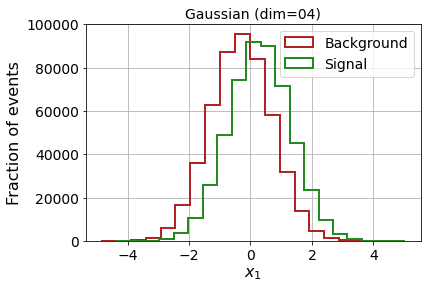

/home/perez/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y

[0]	validation_0-logloss:0.67321	validation_1-logloss:0.67333
[1]	validation_0-logloss:0.65637	validation_1-logloss:0.65657
[2]	validation_0-logloss:0.64239	validation_1-logloss:0.64265
[3]	validation_0-logloss:0.63026	validation_1-logloss:0.63061
[4]	validation_0-logloss:0.62001	validation_1-logloss:0.62041
[5]	validation_0-logloss:0.61110	validation_1-logloss:0.61162
[6]	validation_0-logloss:0.60333	validation_1-logloss:0.60393
[7]	validation_0-logloss:0.59656	validation_1-logloss:0.59724
[8]	validation_0-logloss:0.59065	validation_1-logloss:0.59143
[9]	validation_0-logloss:0.58545	validation_1-logloss:0.58630
[10]	validation_0-logloss:0.58076	validation_1-logloss:0.58167
[11]	validation_0-logloss:0.57667	validation_1-logloss:0.57763
[12]	validation_0-logloss:0.57297	validation_1-logloss:0.57398
[13]	validation_0-logloss:0.56973	validation_1-logloss:0.57079
[14]	validation_0-logloss:0.56678	validation_1-logloss:0.56789
[15]	validation_0-logloss:0.56412	validation_1-logloss:0.56528
[1

[130]	validation_0-logloss:0.53788	validation_1-logloss:0.54104
[131]	validation_0-logloss:0.53788	validation_1-logloss:0.54104
[132]	validation_0-logloss:0.53787	validation_1-logloss:0.54104
[133]	validation_0-logloss:0.53786	validation_1-logloss:0.54104
[134]	validation_0-logloss:0.53786	validation_1-logloss:0.54104
[135]	validation_0-logloss:0.53785	validation_1-logloss:0.54104
[136]	validation_0-logloss:0.53783	validation_1-logloss:0.54105
[137]	validation_0-logloss:0.53782	validation_1-logloss:0.54104
[138]	validation_0-logloss:0.53782	validation_1-logloss:0.54105
[139]	validation_0-logloss:0.53781	validation_1-logloss:0.54105
[140]	validation_0-logloss:0.53781	validation_1-logloss:0.54105
[141]	validation_0-logloss:0.53780	validation_1-logloss:0.54105
[142]	validation_0-logloss:0.53779	validation_1-logloss:0.54105
[143]	validation_0-logloss:0.53778	validation_1-logloss:0.54105
[144]	validation_0-logloss:0.53777	validation_1-logloss:0.54105
[145]	validation_0-logloss:0.53777	valid

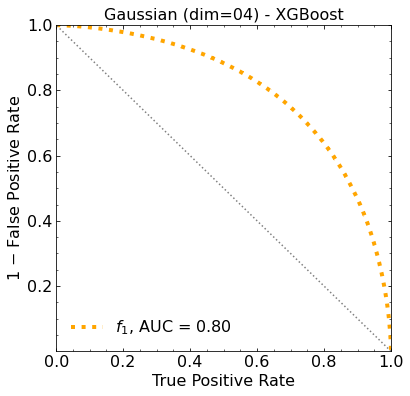

Classification score:


Substituting symbol N from STIXNonUnicode
Substituting symbol N from STIXNonUnicode


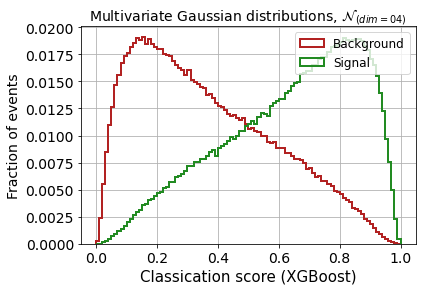

Classification score interpolation:


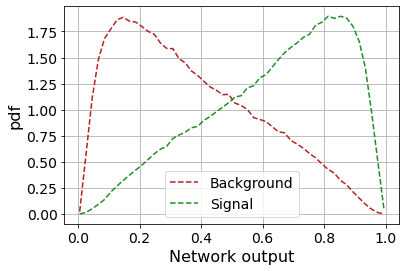


 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 10 bins:  4.131859231259901

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 25 bins:  4.281769361208555

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 50 bins:  4.302522457323605

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 100 bins:  4.30989278603731

 ----------------------------------------- 

TRUE PDF LIKELIHOOD (GAUSSIANS):
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
n_ensembles (initial):  10000

 If  10100  =  1009    then the proposed range has to be extended
n_ensembles (actual):  9233
This may take long...


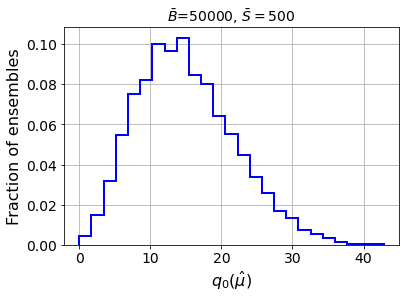

muhat mean:  0.20775479259179036
median q_muhat:  14.327044495662449
Z_gaussian:  3.785108254153697

 ------------------------------------ 

 MLL + KDE 


/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:788: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,


Background:  KernelDensity(algorithm='auto', atol=0, bandwidth=0.012742749857031334,
              breadth_first=True, kernel='epanechnikov', leaf_size=40,
              metric='euclidean', metric_params=None, rtol=0)


/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:788: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,


Signal:  KernelDensity(algorithm='auto', atol=0, bandwidth=0.012742749857031334,
              breadth_first=True, kernel='epanechnikov', leaf_size=40,
              metric='euclidean', metric_params=None, rtol=0)


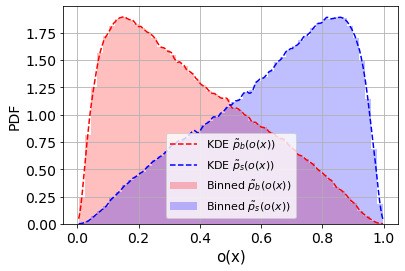

Z_KDE_bins :  4.295407947282949


B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
n_ensembles (initial):  10000

 If  10100  =  1009    then the proposed range has to be extended
n_ensembles (actual):  9233

 This may take long... 



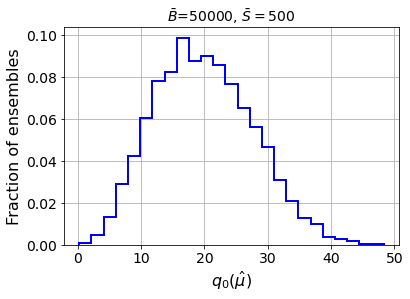

muhat mean:  0.09527780786309975
median q_muhat:  19.525342741564145
Z_KDE:  4.41874900187419
Z_KDE mu=0:  4.41874900187419

 -------------------------------- 

Working points, counting over 1 bin:
S_expected =  500
WP: 0     S/B**0.5=  2.23606797749979
WP:  0.25     S/B**0.5=  2.6507159068632618
WP:  0.5     S/B**0.5=  3.0859867302765185
WP:  0.75     S/B**0.5=  3.269261996814971
------------------------


In [12]:
dim=4

#######################
# generate the events #
#######################
    
background_X_1 = np.random.normal(-epsilon,1,N)
background_X_2 = np.random.normal(-epsilon,1,N)
background_X_3 = np.random.normal(-epsilon,1,N)
background_X_4 = np.random.normal(-epsilon,1,N)
    
signal_X_1 = np.random.normal(epsilon,1,N)
signal_X_2 = np.random.normal(epsilon,1,N)
signal_X_3 = np.random.normal(epsilon,1,N)
signal_X_4 = np.random.normal(epsilon,1,N)

dim1 = np.concatenate((background_X_1,signal_X_1))
dim2 = np.concatenate((background_X_2,signal_X_2))
dim3 = np.concatenate((background_X_3,signal_X_3))
dim4 = np.concatenate((background_X_4,signal_X_4))

# labels
background_Y = np.zeros(N)
signal_Y = np.ones(N)

# DATA in a single matrix (features + labels)
df = pd.DataFrame()
df['dim1'] = dim1.reshape(-1)
df['dim2'] = dim2.reshape(-1)
df['dim3'] = dim3.reshape(-1)
df['dim4'] = dim4.reshape(-1)
df['Y'] = np.concatenate((background_Y.astype('int'),signal_Y.astype('int')))

X_gauss = df[['dim1','dim2','dim3','dim4']].values 
Y_gauss = df[['Y']].values

X_gauss_train, X_gauss_val, Y_gauss_train, Y_gauss_val = train_test_split(X_gauss, Y_gauss, test_size=0.5)


print(X_gauss_train.shape)
print(Y_gauss_train.shape)
print(X_gauss_val.shape)
print(Y_gauss_val.shape)


# PLOT (only 1st feature) to visualize the data
X_gauss_val_SM = []
X_gauss_val_NP = []

for i in range(len(Y_gauss_val)):
    if Y_gauss_val[i] ==0:
        X_gauss_val_SM.append(X_gauss_val[i].tolist())
    else:
        X_gauss_val_NP.append(X_gauss_val[i].tolist())    


X_gauss_val_SM = np.array(X_gauss_val_SM)
X_gauss_val_NP = np.array(X_gauss_val_NP)


weights = np.ones_like(X_gauss_val_SM[:,0])/float(len(X_gauss_val_SM[:,0]))
plt.hist(X_gauss_val_SM[:,0], 20, histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(X_gauss_val_NP[:,0])/float(len(X_gauss_val_NP[:,0]))
plt.hist(X_gauss_val_NP[:,0], 20, histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$x_1$",fontsize=16)
plt.ylabel("Fraction of events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.title(r"Gaussian (dim=%0.2d)" % dim,fontsize=14)
plt.show()  




#######################
# CLASSIFIER: XGBoost #
#######################

# CLASSIFIER
classifier = XGBClassifier(
    n_estimators=500,
    learning_rate=0.1,
    reg_lambda=0.0,reg_alpha=0.0,
    gamma=0.0,objective='binary:logistic',
    max_depth=5)

# FIT
classifier.fit(X_gauss_train,Y_gauss_train,eval_set=[(X_gauss_train, Y_gauss_train), (X_gauss_val, Y_gauss_val)],
        eval_metric='logloss',early_stopping_rounds=50,#early stopping
        verbose=True)

# PREDICTIONS
y_pred_xg = classifier.predict_proba(X_gauss_val).T[1]


# ROC
fpr_gauss_xg, tpr_gauss_xg, _ = roc_curve(Y_gauss_val, y_pred_xg)
roc_auc_xg = auc(fpr_gauss_xg, tpr_gauss_xg)

store_AUC.append(roc_auc_xg)


# PLOT THE ROC WITH AUC
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax0.minorticks_on()


plt.plot(tpr_gauss_xg,1-fpr_gauss_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
plt.plot([1,0],[0,1],ls=":",color="grey")
plt.xlabel("True Positive Rate",fontsize=16)
plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
plt.legend()
plt.title(r"Gaussian (dim=%0.2d) - XGBoost" % dim,fontsize=16)
plt.xlim([0,1])
plt.ylim([0,1])
plt.yticks([0.2,0.4,0.6,0.8,1.])
plt.legend(frameon=False,fontsize=16)
plt.show()




########################
# CLASSIFICATION SCORE #
########################

# Outputs for validation data set

pred_XG_SM = []
pred_XG_NP = []

for i in range(len(Y_gauss_val)):
    if Y_gauss_val[i] == 0:
        pred_XG_SM.append(y_pred_xg[i])
    else:
        pred_XG_NP.append(y_pred_xg[i])
        
        
print('Classification score:')
        
weights = np.ones_like(pred_XG_SM)/float(len(pred_XG_SM))
nSM, binsSM, patchesSM = plt.hist(pred_XG_SM, 100, weights=weights, range=[0,1], histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(pred_XG_NP)/float(len(pred_XG_NP))
nNP, binsNP, patchesNP = plt.hist(pred_XG_NP, 100, weights=weights, range=[0,1], histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Classication score (XGBoost)",fontsize=15)
plt.ylabel("Fraction of events",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
plt.title('Multivariate Gaussian distributions, $\mathcal{N}_{(dim=%0.2d)}$' % dim, fontsize=14)
plt.show()





# INTERPOLATE TO USE AS p_s(x) and p_b(x) ESTIMATES

# center of each bin

binsSM_mid = []
binsNP_mid = []

for i in range(len(binsSM)-1):
    binsSM_mid.append( ((binsSM[i+1]-binsSM[i])/2)+binsSM[i] )
    
for i in range(len(binsNP)-1):
    binsNP_mid.append( ((binsNP[i+1]-binsNP[i])/2)+binsNP[i] )
    

# get the width of each bin
bin_width_SM = binsSM[1] - binsSM[0]
bin_width_NP = binsNP[1] - binsNP[0]
   
    
# Interpolation, cubic
fcubic_XG_SM = interp1d(binsSM_mid, nSM, kind='cubic')
fcubic_XG_NP = interp1d(binsNP_mid, nNP, kind='cubic')


# Normalize

def fcubic_XG_SM_norm(x):
    return fcubic_XG_SM(x)/bin_width_SM

def fcubic_XG_NP_norm(x):
    return fcubic_XG_NP(x)/bin_width_NP


print('Classification score interpolation:')
# x to plot
xnew_XG_SM = np.linspace(min(binsSM_mid), max(binsSM_mid), num=50, endpoint=True)
xnew_XG_NP = np.linspace(min(binsNP_mid), max(binsNP_mid), num=50, endpoint=True)

plt.plot(xnew_XG_SM, fcubic_XG_SM_norm(xnew_XG_SM), '--', color='firebrick', label='Background')
plt.plot(xnew_XG_NP, fcubic_XG_NP_norm(xnew_XG_NP), '--', color='forestgreen', label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Network output",fontsize=16)
plt.ylabel("pdf",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()

print('\n ----------------------------------------- \n')








##################################################
# CLASSIFIER OUTPUT BINNED POISON LOG-LIKELIHOOD #
##################################################

# 10 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(10), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(10), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_10bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_10bins.append(Z_bins_XG_10bins)

print('Z_XG 10 bins: ', Z_bins_XG_10bins)
print('\n ----------------------------------------- \n')




##############################

# 25 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(25), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(25), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_25bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_25bins.append(Z_bins_XG_25bins)

print('Z_XG 25 bins: ', Z_bins_XG_25bins)
print('\n ----------------------------------------- \n')




##############################

# 50 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(50), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(50), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_50bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_50bins.append(Z_bins_XG_50bins)

print('Z_XG 50 bins: ', Z_bins_XG_50bins)
print('\n ----------------------------------------- \n')




##############################

# 100 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(100), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(100), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_100bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_100bins.append(Z_bins_XG_100bins)

print('Z_XG 100 bins: ', Z_bins_XG_100bins)
print('\n ----------------------------------------- \n')








###################################
# TRUE PDF LIKELIHOOD (GAUSSIANS) #
###################################

print('TRUE PDF LIKELIHOOD (GAUSSIANS):')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print('S/$\sqrt{B}$: ', SsqrtB)
print('n_ensembles (initial): ', n_ensembles)


# to construct ensembles B and S events are taken from Poisson distributions
mu = S_expected + B_expected


# Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

# around the mean its populated so let's try (proposed range to be checked)
list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
to_check = len(list_events_per_ensembles)

# I want at least one ensemble populated
list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



# Remove from the list the elements without at least 1 ensemble possible
for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] > 1:
        list_events_per_ensembles = list_events_per_ensembles[i:]
        list_nums_ensembles = list_nums_ensembles[i:]
        break


for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] < 1:
        list_events_per_ensembles = list_events_per_ensembles[:i]
        list_nums_ensembles = list_nums_ensembles[:i]
        break

print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

print('n_ensembles (actual): ', sum(list_nums_ensembles))



# lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

p_berno = S_expected/(S_expected+B_expected)

list_S_per_ensembles = []
list_B_per_ensembles = []

for jj in range(len(list_events_per_ensembles)):
    list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
    list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

######
# NOW I HAVE 4 LISTS:
# list_events_per_ensembles     list with the number of events per ensemble (its a range)
# list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
# list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
# list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
######



print('This may take long...')


#############################
# NOW LETS APPLY THE METHOD #
#############################
muhat_selected_list = []
q_muhat = []

for bb in range(len(list_nums_ensembles)):

    for kk in range(list_nums_ensembles[bb]):

#         # SIGNAL events in an ensemble
#         NP_shuf = shuffle(X_gauss_val_NP)[:list_S_per_ensembles[bb]]

#         prob_NP_given_B = [] # p_b(S_ensemble)
#         prob_NP_given_S = [] # p_s(S_ensemble)

#         for ll in range(len(NP_shuf)):
#             prob_NP_given_S.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (NP_shuf[ll,0]-epsilon)**2 + (NP_shuf[ll,1]-epsilon)**2 + (NP_shuf[ll,2]-epsilon)**2 + (NP_shuf[ll,3]-epsilon)**2 ) ) )
#             prob_NP_given_B.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (NP_shuf[ll,0]+epsilon)**2 + (NP_shuf[ll,1]+epsilon)**2 + (NP_shuf[ll,2]+epsilon)**2 + (NP_shuf[ll,3]+epsilon)**2 ) ) )


        # BACKGROUND events in an ensemble
        SM_shuf = shuffle(X_gauss_val_SM)[:list_B_per_ensembles[bb]]

        prob_SM_given_B = [] # p_b(B_ensemble)
        prob_SM_given_S = [] # p_s(B_ensemble)

        for ll in range(len(SM_shuf)):
            prob_SM_given_S.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (SM_shuf[ll,0]-epsilon)**2 + (SM_shuf[ll,1]-epsilon)**2 + (SM_shuf[ll,2]-epsilon)**2 + (SM_shuf[ll,3]-epsilon)**2 ) ) )
            prob_SM_given_B.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (SM_shuf[ll,0]+epsilon)**2 + (SM_shuf[ll,1]+epsilon)**2 + (SM_shuf[ll,2]+epsilon)**2 + (SM_shuf[ll,3]+epsilon)**2 ) ) )


        # p_b(x_ensemble) =    concatenate: p_b(B_ensemble) and p_b(S_ensemble)
        prob_x_given_B = prob_SM_given_B #+ prob_NP_given_B

        # p_s(x_ensemble) =    concatenate: p_s(B_ensemble) and p_s(S_ensemble)
        prob_x_given_S = prob_SM_given_S #+ prob_NP_given_S




        # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
        # WE NEED TO ESTIMATE mu_hat for this particular ensemble
        # we are going to obtain a mu_hat with a grid of values for this particular ensemble



        mu_hat_condition_equal_1 = []

        # grid, mu_hat is around 1
        muhat_test = np.arange(0., 1.5, 0.1).tolist()

        B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

        for vv in range(len(muhat_test)):

            mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



        muhat_selected = 0.01

        # from the grid, select the mu_hat such that the condition is equal to 1
        if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 > 0:
                    muhat_selected = muhat_test[ll]
                    break


        if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 < 0:
                    muhat_selected = muhat_test[ll]
                    break


        muhat_selected_list.append(muhat_selected)



        # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
        # and append it (we need the median over lots of ensembles)
        q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (muhat_selected*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )  ) )



# Histogram of q_muhats

weights = np.ones_like(q_muhat)/float(len(q_muhat))
nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
plt.ylabel("Fraction of ensembles",fontsize=16)
plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected),fontsize=14)
plt.grid()
plt.show()


# Finally calculate muhat_mean and Z_gaussian
muhat_mean_gaussian = np.mean(muhat_selected_list)
store_muhat_mean_gaussian.append(muhat_mean_gaussian)

# Remove nan if any
q_muhat = [x for x in q_muhat if x == x]

q_muhat_median = np.median(q_muhat)

Z_gaussian = abs(q_muhat_median)**0.5
store_Z_gaussian.append(Z_gaussian)

print('muhat mean: ', muhat_mean_gaussian)
print('median q_muhat: ', q_muhat_median)
print('Z_gaussian: ', Z_gaussian)


print('\n ------------------------------------ \n')


    
    
    


    
#########
#  KDE  #
#########  

print(' MLL + KDE ')

# FIND THE BANDWIDTH

bandwidth = np.logspace(-4.0, 0, 20)

kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_SM[:50000]])
print('Background: ', grid.best_estimator_)

SM_bandwidth = grid.best_estimator_.bandwidth



kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_NP[:50000]])
print('Signal: ', grid.best_estimator_)

NP_bandwidth = grid.best_estimator_.bandwidth




# with each calculated bandwidth estimate the pdf with KDE to the classifier output (for background and signal)
# notice: epanechnikov kernel
kde_bkg = KernelDensity(kernel='epanechnikov', bandwidth=SM_bandwidth).fit(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ])
kde_sig = KernelDensity(kernel='epanechnikov', bandwidth=NP_bandwidth).fit(np.c_[pred_XG_NP, np.ones(len(pred_XG_NP)) ])


# range (~between 0 and 1)
min_val = np.min([np.min(pred_XG_SM),np.min(pred_XG_NP)])
max_val = np.max([np.max(pred_XG_SM),np.max(pred_XG_NP)])

s_vals = np.linspace(min_val,max_val,1000)





# evaluate the densities for each value of s (~bins)
dens_bkg = np.exp(kde_bkg.score_samples(np.c_[s_vals, np.zeros(len(s_vals)) ]) )
dens_sig = np.exp(kde_sig.score_samples(np.c_[s_vals, np.ones(len(s_vals)) ]) )





# Normalize to 1
# Area
factor_aux_SM = sum(dens_bkg*(s_vals[1]-s_vals[0]))
factor_aux_NP = sum(dens_sig*(s_vals[1]-s_vals[0]))

# normalize
dens_bkg = dens_bkg / factor_aux_SM
dens_sig = dens_sig / factor_aux_NP







# plot to check the estimation

plt.figure()

plt.hist(pred_XG_SM,density=True,bins=50,color='red',alpha=0.25,label=r'Binned $\tilde{p}_{b}(o(x))$');
plt.plot(s_vals,dens_bkg,color='red',label=r'KDE $\tilde{p}_{b}(o(x))$',linestyle='dashed');

plt.hist(pred_XG_NP,density=True,bins=50,color='blue',alpha=0.25,label=r'Binned $\tilde{p}_{s}(o(x))$');
plt.plot(s_vals,dens_sig,color='blue',label=r'KDE $\tilde{p}_{s}(o(x))$',linestyle='dashed');

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("o(x)",fontsize=15)
plt.ylabel("PDF",fontsize=14)
plt.grid()
plt.legend(loc="lower center", fontsize=11, handlelength=2.5)
#plt.title(r'Multivariate Gaussian distributions, $\mathcal{N}_{dim}$', fontsize=14)
#plt.savefig('images/' + 'Ndimgaussian-output.pdf', format="pdf", bbox_inches="tight")
plt.show()





# We can do a quick Z bin-loglikelihood calculation using the computed KDE
# this is to check the KDE here, because we use KDE to avoid binning


# B events in each bin: 
# total number of B * B_pdf value in each bin * bin size
Bd = B_expected*dens_bkg*(s_vals[1]-s_vals[0])


# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
Bd_noceros = []
for i in range(len(Bd)):
    if Bd[i]!=0:
        Bd_noceros.append(Bd[i])

min_back = min(Bd_noceros)

# replace the zeros
for i in range(len(Bd)):
    if Bd[i]==0:
        Bd[i] = min_back


# S events in each bin: 
# value of S/sqrt{B} * sqrt{B} * S_pdf value in each bin * bin size
Sd = SsqrtB*np.sqrt(B_expected)*dens_sig*(s_vals[1]-s_vals[0])


# Z value:
#Z_KDE_bins = np.sqrt(2.0*np.sum(((Sd+Bd)*np.log(1.0+Sd/Bd)-Sd))) # Discovery
Z_KDE_bins = np.sqrt(2.0*np.sum(Bd*np.log(Bd/(Sd+Bd))+Sd)) # Exclusion

store_Z_KDE_bins.append(Z_KDE_bins)

print('Z_KDE_bins : ', Z_KDE_bins)



    
    
    
#############
# MLL + KDE #
#############
    
# FOR EXCLUSION:
# we need to evaluate the KDE densities with the classifier output of BACKGROUND EVENTS

# FOR DISCOVERY:
# we need to evaluate the KDE densities with the classifier output of BACKGROUND and SIGNAL EVENTS

KDE_SM_pred_SM = np.exp(kde_bkg.score_samples(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ]) )
KDE_NP_pred_SM = np.exp(kde_sig.score_samples(np.c_[pred_XG_SM, np.ones(len(pred_XG_SM)) ]) )


# Normalize

KDE_SM_pred_SM = KDE_SM_pred_SM / factor_aux_SM
KDE_NP_pred_SM = KDE_NP_pred_SM / factor_aux_NP




indices = [i for i in range(len(KDE_NP_pred_SM))]


# the first part is the same as before, but we repeat it, it is not the expensive part

print('\n')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)
print('n_ensembles (initial): ', n_ensembles)


# to construct ensembles B and S events are taken from Poisson distributions
mu = S_expected + B_expected


# Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

# around the mean its populated so let's try (proposed range to be checked)
list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
to_check = len(list_events_per_ensembles)

# I want at least one ensemble populated
list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



# Remove from the list the elements without at least 1 ensemble possible
for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] > 1:
        list_events_per_ensembles = list_events_per_ensembles[i:]
        list_nums_ensembles = list_nums_ensembles[i:]
        break


for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] < 1:
        list_events_per_ensembles = list_events_per_ensembles[:i]
        list_nums_ensembles = list_nums_ensembles[:i]
        break

print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

print('n_ensembles (actual): ', sum(list_nums_ensembles))



# lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

p_berno = S_expected/(S_expected+B_expected)

list_S_per_ensembles = []
list_B_per_ensembles = []

for jj in range(len(list_events_per_ensembles)):
    list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
    list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

######
# NOW I HAVE 4 LISTS:
# list_events_per_ensembles     list with the number of events per ensemble (its a range)
# list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
# list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
# list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
######



print('\n This may take long... \n')


# NOW LETS APPLY THE METHOD

muhat_selected_list = []
q_muhat = []
q_muhat_mu0 = []

for bb in range(len(list_nums_ensembles)):

    for kk in range(list_nums_ensembles[bb]):

        # KDE
        ran_ind = np.random.choice(indices, list_B_per_ensembles[bb])

        KDE_SM_pred_SM_shuf = []
        KDE_NP_pred_SM_shuf = []

        for i in ran_ind:
            KDE_SM_pred_SM_shuf.append(KDE_SM_pred_SM[i])
            KDE_NP_pred_SM_shuf.append(KDE_NP_pred_SM[i])

        KDE_SM_pred_SM_shuf  = np.array(KDE_SM_pred_SM_shuf)
        KDE_NP_pred_SM_shuf  = np.array(KDE_NP_pred_SM_shuf)



        # p_b(o(x_ensemble)) =    concatenate: p_b(o(B_ensemble)) and p_b(o(S_ensemble))  NOTICE THE o(x)
        prob_x_given_B = np.ndarray.tolist( KDE_SM_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_SM_pred_NP_shuf )

        # p_s(o(x_ensemble)) =    concatenate: p_s(o(B_ensemble)) and p_s(o(S_ensemble))  NOTICE THE o(x)
        prob_x_given_S = np.ndarray.tolist( KDE_NP_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_NP_pred_NP_shuf )





        # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
        # WE NEED TO ESTIMATE mu_hat for this particular ensemble
        # we are going to obtain a mu_hat with a grid of values for this particular ensemble



        mu_hat_condition_equal_1 = []

        # grid, mu_hat is around 1
        muhat_test = np.arange(0., 1.5, 0.1).tolist()

        B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

        for vv in range(len(muhat_test)):

            mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



        muhat_selected = 0.01

        # from the grid, select the mu_hat such that the condition is equal to 1
        if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 > 0:
                    muhat_selected = muhat_test[ll]
                    break


        if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 < 0:
                    muhat_selected = muhat_test[ll]
                    break


        muhat_selected_list.append(muhat_selected)



        # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
        # and append it (we need the median over lots of ensembles)
        #q_muhat.append( 2 * ( (-1.*muhat_selected * S_expected) + sum( [np.log( 1 + ( (muhat_selected*S_expected/B_expected) * (x / y) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] ) ) )
        # EXCLUSION:
        q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (muhat_selected*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
) )
        q_muhat_mu0.append( 2 * ( ( (1.-0.) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (0.*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
) )


# Histogram of q_muhats

weights = np.ones_like(q_muhat)/float(len(q_muhat))
nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)
#plt.xlim(0,1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
plt.ylabel("Fraction of ensembles",fontsize=16)
plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected),fontsize=14)
plt.grid()
#plt.legend(fontsize=14)
plt.show()


# Finally calculate muhat_mean and Z_gaussian

# Remove nan if any
q_muhat_mu0 = [x for x in q_muhat_mu0 if x == x]

q_muhat_median_mu0 = np.median(q_muhat_mu0)

Z_KDE_mu0 = abs(q_muhat_median_mu0)**0.5
store_Z_MLL_KDE_mu0.append(Z_KDE_mu0)


# Finally calculate muhat_mean and Z_gaussian
muhat_mean_MLL_KDE = np.mean(muhat_selected_list)
store_muhat_mean_MLL_KDE.append(muhat_mean_MLL_KDE)

# Remove nan if any
q_muhat = [x for x in q_muhat if x == x]

q_muhat_median = np.median(q_muhat)

Z_KDE = abs(q_muhat_median)**0.5
store_Z_MLL_KDE.append(Z_KDE)

print('muhat mean: ', muhat_mean_MLL_KDE)
print('median q_muhat: ', q_muhat_median)
print('Z_KDE: ', Z_KDE)
print('Z_KDE mu=0: ', Z_KDE_mu0)

print('\n -------------------------------- \n')
    
    

    
    
    
    
    
    
#######################################
# Working points, counting over 1 bin #
#######################################

print('Working points, counting over 1 bin:')

# BACKGROUND 

# number of background ensembles
B_ensembles = int(len(pred_XG_SM)/B_expected)

# shorten the number of B events so I get an integer number of ensembles
pred_XG_SM_entero = pred_XG_SM[:int(len(pred_XG_SM)/B_expected) * B_expected]

XG_SM_passWP0 = 0
XG_SM_passWP1 = 0
XG_SM_passWP2 = 0

for i in range(len(pred_XG_SM_entero)):
    if pred_XG_SM_entero[i] > WP[0]:
        XG_SM_passWP0 += 1
    if pred_XG_SM_entero[i] > WP[1]:
        XG_SM_passWP1 += 1
    if pred_XG_SM_entero[i] > WP[2]:
        XG_SM_passWP2 += 1



# SIGNAL

# number of signal ensembles
S_ensembles = int(len(pred_XG_NP)/S_expected)

# shorten the number of S events so I get an integer number of ensembles
pred_XG_NP_entero = pred_XG_NP[:int(len(pred_XG_NP)/S_expected) * S_expected]

XG_NP_passWP0 = 0
XG_NP_passWP1 = 0
XG_NP_passWP2 = 0

for i in range(len(pred_XG_NP_entero)):
    if pred_XG_NP_entero[i] > WP[0]:
        XG_NP_passWP0 += 1
    if pred_XG_NP_entero[i] > WP[1]:
        XG_NP_passWP1 += 1
    if pred_XG_NP_entero[i] > WP[2]:
        XG_NP_passWP2 += 1

Z_WP0 = ( XG_NP_passWP0 / S_ensembles ) / ( XG_SM_passWP0 / B_ensembles )**0.5
Z_WP1 = ( XG_NP_passWP1 / S_ensembles ) / ( XG_SM_passWP1 / B_ensembles )**0.5
Z_WP2 = ( XG_NP_passWP2 / S_ensembles ) / ( XG_SM_passWP2 / B_ensembles )**0.5


# save the results Z_binned after WP
SrootB_WP0.append( Z_WP0 )
SrootB_WP1.append( Z_WP1 )
SrootB_WP2.append( Z_WP2 )

print('S_expected = ', S_expected)
print('WP: 0     S/B**0.5= ', S_expected/(B_expected)**0.5)
print('WP: ', WP[0], '    S/B**0.5= ', Z_WP0 )
print('WP: ', WP[1], '    S/B**0.5= ', Z_WP1 )
print('WP: ', WP[2], '    S/B**0.5= ', Z_WP2 )
print('------------------------')

In [13]:
print('dim = ', dim)

print(roc_auc_xg)

print(Z_bins_XG_10bins)
print(Z_bins_XG_25bins)
print(Z_bins_XG_50bins)
print(Z_bins_XG_100bins)

print(muhat_mean_gaussian)
print(Z_gaussian)

print(muhat_mean_MLL_KDE)
print(Z_KDE_bins)
print(Z_KDE)
print(Z_KDE_mu0)

print(Z_WP0)
print(Z_WP1)
print(Z_WP2)

dim =  4
0.8008937982919934
4.131859231259901
4.281769361208555
4.302522457323605
4.30989278603731
0.20775479259179036
3.785108254153697
0.09527780786309975
4.295407947282949
4.41874900187419
4.41874900187419
2.6507159068632618
3.0859867302765185
3.269261996814971


In [ ]:
# To use if you dont want to run everything again. Store the previous results
store_AUC.append()

store_Z_bins_XG_10bins.append()
store_Z_bins_XG_25bins.append()
store_Z_bins_XG_50bins.append()
store_Z_bins_XG_100bins.append()

store_muhat_mean_gaussian.append()
store_Z_gaussian.append()

store_muhat_mean_MLL_KDE.append()
store_Z_KDE_bins.append()
store_Z_MLL_KDE.append()
store_Z_MLL_KDE_mu0.append()

SrootB_WP0.append()
SrootB_WP1.append()
SrootB_WP2.append()

## Dim=5

(1000000, 5)
(1000000, 1)
(1000000, 5)
(1000000, 1)


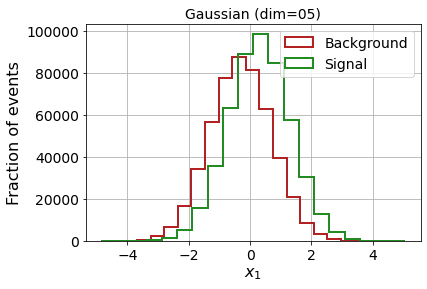

/home/perez/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y

[0]	validation_0-logloss:0.67097	validation_1-logloss:0.67101
[1]	validation_0-logloss:0.65262	validation_1-logloss:0.65267
[2]	validation_0-logloss:0.63704	validation_1-logloss:0.63714
[3]	validation_0-logloss:0.62389	validation_1-logloss:0.62400
[4]	validation_0-logloss:0.61222	validation_1-logloss:0.61241
[5]	validation_0-logloss:0.60221	validation_1-logloss:0.60245
[6]	validation_0-logloss:0.59328	validation_1-logloss:0.59355
[7]	validation_0-logloss:0.58545	validation_1-logloss:0.58580
[8]	validation_0-logloss:0.57859	validation_1-logloss:0.57901
[9]	validation_0-logloss:0.57239	validation_1-logloss:0.57286
[10]	validation_0-logloss:0.56690	validation_1-logloss:0.56739
[11]	validation_0-logloss:0.56195	validation_1-logloss:0.56248
[12]	validation_0-logloss:0.55757	validation_1-logloss:0.55814
[13]	validation_0-logloss:0.55356	validation_1-logloss:0.55418
[14]	validation_0-logloss:0.54993	validation_1-logloss:0.55059
[15]	validation_0-logloss:0.54661	validation_1-logloss:0.54733
[1

[130]	validation_0-logloss:0.50630	validation_1-logloss:0.50929
[131]	validation_0-logloss:0.50628	validation_1-logloss:0.50929
[132]	validation_0-logloss:0.50627	validation_1-logloss:0.50929
[133]	validation_0-logloss:0.50626	validation_1-logloss:0.50929
[134]	validation_0-logloss:0.50625	validation_1-logloss:0.50930
[135]	validation_0-logloss:0.50623	validation_1-logloss:0.50930
[136]	validation_0-logloss:0.50623	validation_1-logloss:0.50929
[137]	validation_0-logloss:0.50622	validation_1-logloss:0.50929
[138]	validation_0-logloss:0.50621	validation_1-logloss:0.50929
[139]	validation_0-logloss:0.50620	validation_1-logloss:0.50929
[140]	validation_0-logloss:0.50620	validation_1-logloss:0.50930
[141]	validation_0-logloss:0.50619	validation_1-logloss:0.50929
[142]	validation_0-logloss:0.50618	validation_1-logloss:0.50930
[143]	validation_0-logloss:0.50617	validation_1-logloss:0.50929
[144]	validation_0-logloss:0.50616	validation_1-logloss:0.50930
[145]	validation_0-logloss:0.50615	valid

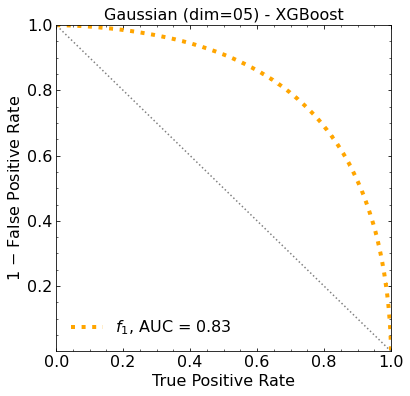

Classification score:


Substituting symbol N from STIXNonUnicode
Substituting symbol N from STIXNonUnicode


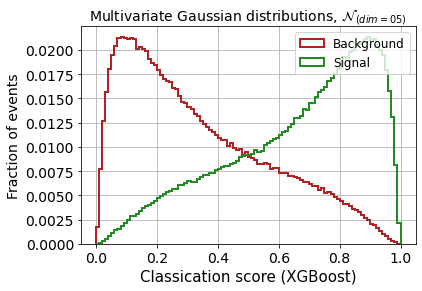

Classification score interpolation:


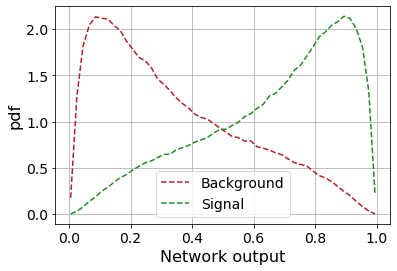


 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 10 bins:  4.675262868762146

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 25 bins:  4.940504058553808

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 50 bins:  4.995136063040277

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 100 bins:  5.0165598813326

 ----------------------------------------- 

TRUE PDF LIKELIHOOD (GAUSSIANS):
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
n_ensembles (initial):  10000

 If  10100  =  1009    then the proposed range has to be extended
n_ensembles (actual):  9233
This may take long...


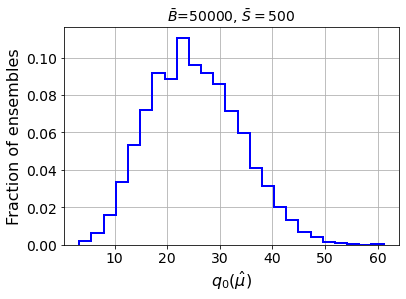

muhat mean:  0.11475143506985812
median q_muhat:  24.6847168282103
Z_gaussian:  4.968371647553179

 ------------------------------------ 

 MLL + KDE 


/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:788: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,


Background:  KernelDensity(algorithm='auto', atol=0, bandwidth=0.007847599703514606,
              breadth_first=True, kernel='epanechnikov', leaf_size=40,
              metric='euclidean', metric_params=None, rtol=0)


/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:788: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,


Signal:  KernelDensity(algorithm='auto', atol=0, bandwidth=0.007847599703514606,
              breadth_first=True, kernel='epanechnikov', leaf_size=40,
              metric='euclidean', metric_params=None, rtol=0)


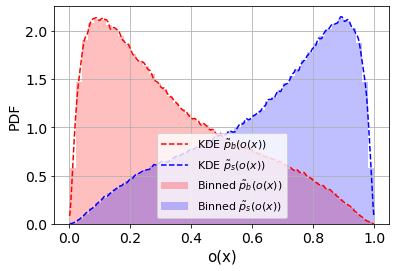

Z_KDE_bins :  5.00976772283919


B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
n_ensembles (initial):  10000

 If  10100  =  1009    then the proposed range has to be extended
n_ensembles (actual):  9233

 This may take long... 



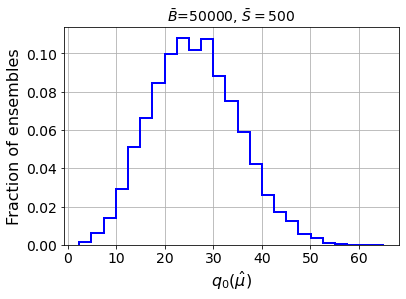

muhat mean:  0.08888768547600998
median q_muhat:  25.966944438206383
Z_KDE:  5.095777118183878
Z_KDE mu=0:  5.098427272724986

 -------------------------------- 

Working points, counting over 1 bin:
S_expected =  500
WP: 0     S/B**0.5=  2.23606797749979
WP:  0.25     S/B**0.5=  2.791272259883534
WP:  0.5     S/B**0.5=  3.332697130581809
WP:  0.75     S/B**0.5=  3.7667352767441833
------------------------


In [14]:
dim=5

#######################
# generate the events #
#######################
    
background_X_1 = np.random.normal(-epsilon,1,N)
background_X_2 = np.random.normal(-epsilon,1,N)
background_X_3 = np.random.normal(-epsilon,1,N)
background_X_4 = np.random.normal(-epsilon,1,N)
background_X_5 = np.random.normal(-epsilon,1,N)
    
signal_X_1 = np.random.normal(epsilon,1,N)
signal_X_2 = np.random.normal(epsilon,1,N)
signal_X_3 = np.random.normal(epsilon,1,N)
signal_X_4 = np.random.normal(epsilon,1,N)
signal_X_5 = np.random.normal(epsilon,1,N)

dim1 = np.concatenate((background_X_1,signal_X_1))
dim2 = np.concatenate((background_X_2,signal_X_2))
dim3 = np.concatenate((background_X_3,signal_X_3))
dim4 = np.concatenate((background_X_4,signal_X_4))
dim5 = np.concatenate((background_X_5,signal_X_5))

# labels
background_Y = np.zeros(N)
signal_Y = np.ones(N)

# DATA in a single matrix (features + labels)
df = pd.DataFrame()
df['dim1'] = dim1.reshape(-1)
df['dim2'] = dim2.reshape(-1)
df['dim3'] = dim3.reshape(-1)
df['dim4'] = dim4.reshape(-1)
df['dim5'] = dim5.reshape(-1)
df['Y'] = np.concatenate((background_Y.astype('int'),signal_Y.astype('int')))

X_gauss = df[['dim1','dim2','dim3','dim4','dim5']].values 
Y_gauss = df[['Y']].values

X_gauss_train, X_gauss_val, Y_gauss_train, Y_gauss_val = train_test_split(X_gauss, Y_gauss, test_size=0.5)


print(X_gauss_train.shape)
print(Y_gauss_train.shape)
print(X_gauss_val.shape)
print(Y_gauss_val.shape)


# PLOT (only 1st feature) to visualize the data
X_gauss_val_SM = []
X_gauss_val_NP = []

for i in range(len(Y_gauss_val)):
    if Y_gauss_val[i] ==0:
        X_gauss_val_SM.append(X_gauss_val[i].tolist())
    else:
        X_gauss_val_NP.append(X_gauss_val[i].tolist())    


X_gauss_val_SM = np.array(X_gauss_val_SM)
X_gauss_val_NP = np.array(X_gauss_val_NP)


weights = np.ones_like(X_gauss_val_SM[:,0])/float(len(X_gauss_val_SM[:,0]))
plt.hist(X_gauss_val_SM[:,0], 20, histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(X_gauss_val_NP[:,0])/float(len(X_gauss_val_NP[:,0]))
plt.hist(X_gauss_val_NP[:,0], 20, histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$x_1$",fontsize=16)
plt.ylabel("Fraction of events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.title(r"Gaussian (dim=%0.2d)" % dim,fontsize=14)
plt.show()  




#######################
# CLASSIFIER: XGBoost #
#######################

# CLASSIFIER
classifier = XGBClassifier(
    n_estimators=500,
    learning_rate=0.1,
    reg_lambda=0.0,reg_alpha=0.0,
    gamma=0.0,objective='binary:logistic',
    max_depth=5)

# FIT
classifier.fit(X_gauss_train,Y_gauss_train,eval_set=[(X_gauss_train, Y_gauss_train), (X_gauss_val, Y_gauss_val)],
        eval_metric='logloss',early_stopping_rounds=50,#early stopping
        verbose=True)

# PREDICTIONS
y_pred_xg = classifier.predict_proba(X_gauss_val).T[1]


# ROC
fpr_gauss_xg, tpr_gauss_xg, _ = roc_curve(Y_gauss_val, y_pred_xg)
roc_auc_xg = auc(fpr_gauss_xg, tpr_gauss_xg)

store_AUC.append(roc_auc_xg)


# PLOT THE ROC WITH AUC
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax0.minorticks_on()


plt.plot(tpr_gauss_xg,1-fpr_gauss_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
plt.plot([1,0],[0,1],ls=":",color="grey")
plt.xlabel("True Positive Rate",fontsize=16)
plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
plt.legend()
plt.title(r"Gaussian (dim=%0.2d) - XGBoost" % dim,fontsize=16)
plt.xlim([0,1])
plt.ylim([0,1])
plt.yticks([0.2,0.4,0.6,0.8,1.])
plt.legend(frameon=False,fontsize=16)
plt.show()




########################
# CLASSIFICATION SCORE #
########################

# Outputs for validation data set

pred_XG_SM = []
pred_XG_NP = []

for i in range(len(Y_gauss_val)):
    if Y_gauss_val[i] == 0:
        pred_XG_SM.append(y_pred_xg[i])
    else:
        pred_XG_NP.append(y_pred_xg[i])
        
        
print('Classification score:')
        
weights = np.ones_like(pred_XG_SM)/float(len(pred_XG_SM))
nSM, binsSM, patchesSM = plt.hist(pred_XG_SM, 100, weights=weights, range=[0,1], histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(pred_XG_NP)/float(len(pred_XG_NP))
nNP, binsNP, patchesNP = plt.hist(pred_XG_NP, 100, weights=weights, range=[0,1], histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Classication score (XGBoost)",fontsize=15)
plt.ylabel("Fraction of events",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
plt.title('Multivariate Gaussian distributions, $\mathcal{N}_{(dim=%0.2d)}$' % dim, fontsize=14)
plt.show()





# INTERPOLATE TO USE AS p_s(x) and p_b(x) ESTIMATES

# center of each bin

binsSM_mid = []
binsNP_mid = []

for i in range(len(binsSM)-1):
    binsSM_mid.append( ((binsSM[i+1]-binsSM[i])/2)+binsSM[i] )
    
for i in range(len(binsNP)-1):
    binsNP_mid.append( ((binsNP[i+1]-binsNP[i])/2)+binsNP[i] )
    

# get the width of each bin
bin_width_SM = binsSM[1] - binsSM[0]
bin_width_NP = binsNP[1] - binsNP[0]
   
    
# Interpolation, cubic
fcubic_XG_SM = interp1d(binsSM_mid, nSM, kind='cubic')
fcubic_XG_NP = interp1d(binsNP_mid, nNP, kind='cubic')


# Normalize

def fcubic_XG_SM_norm(x):
    return fcubic_XG_SM(x)/bin_width_SM

def fcubic_XG_NP_norm(x):
    return fcubic_XG_NP(x)/bin_width_NP


print('Classification score interpolation:')
# x to plot
xnew_XG_SM = np.linspace(min(binsSM_mid), max(binsSM_mid), num=50, endpoint=True)
xnew_XG_NP = np.linspace(min(binsNP_mid), max(binsNP_mid), num=50, endpoint=True)

plt.plot(xnew_XG_SM, fcubic_XG_SM_norm(xnew_XG_SM), '--', color='firebrick', label='Background')
plt.plot(xnew_XG_NP, fcubic_XG_NP_norm(xnew_XG_NP), '--', color='forestgreen', label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Network output",fontsize=16)
plt.ylabel("pdf",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()

print('\n ----------------------------------------- \n')








##################################################
# CLASSIFIER OUTPUT BINNED POISON LOG-LIKELIHOOD #
##################################################

# 10 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(10), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(10), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_10bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_10bins.append(Z_bins_XG_10bins)

print('Z_XG 10 bins: ', Z_bins_XG_10bins)
print('\n ----------------------------------------- \n')




##############################

# 25 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(25), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(25), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_25bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_25bins.append(Z_bins_XG_25bins)

print('Z_XG 25 bins: ', Z_bins_XG_25bins)
print('\n ----------------------------------------- \n')




##############################

# 50 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(50), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(50), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_50bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_50bins.append(Z_bins_XG_50bins)

print('Z_XG 50 bins: ', Z_bins_XG_50bins)
print('\n ----------------------------------------- \n')




##############################

# 100 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(100), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(100), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_100bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_100bins.append(Z_bins_XG_100bins)

print('Z_XG 100 bins: ', Z_bins_XG_100bins)
print('\n ----------------------------------------- \n')








###################################
# TRUE PDF LIKELIHOOD (GAUSSIANS) #
###################################

print('TRUE PDF LIKELIHOOD (GAUSSIANS):')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print('S/$\sqrt{B}$: ', SsqrtB)
print('n_ensembles (initial): ', n_ensembles)


# to construct ensembles B and S events are taken from Poisson distributions
mu = S_expected + B_expected


# Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

# around the mean its populated so let's try (proposed range to be checked)
list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
to_check = len(list_events_per_ensembles)

# I want at least one ensemble populated
list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



# Remove from the list the elements without at least 1 ensemble possible
for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] > 1:
        list_events_per_ensembles = list_events_per_ensembles[i:]
        list_nums_ensembles = list_nums_ensembles[i:]
        break


for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] < 1:
        list_events_per_ensembles = list_events_per_ensembles[:i]
        list_nums_ensembles = list_nums_ensembles[:i]
        break

print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

print('n_ensembles (actual): ', sum(list_nums_ensembles))



# lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

p_berno = S_expected/(S_expected+B_expected)

list_S_per_ensembles = []
list_B_per_ensembles = []

for jj in range(len(list_events_per_ensembles)):
    list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
    list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

######
# NOW I HAVE 4 LISTS:
# list_events_per_ensembles     list with the number of events per ensemble (its a range)
# list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
# list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
# list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
######



print('This may take long...')


#############################
# NOW LETS APPLY THE METHOD #
#############################
muhat_selected_list = []
q_muhat = []

for bb in range(len(list_nums_ensembles)):

    for kk in range(list_nums_ensembles[bb]):

#         # SIGNAL events in an ensemble
#         NP_shuf = shuffle(X_gauss_val_NP)[:list_S_per_ensembles[bb]]

#         prob_NP_given_B = [] # p_b(S_ensemble)
#         prob_NP_given_S = [] # p_s(S_ensemble)

#         for ll in range(len(NP_shuf)):
#             prob_NP_given_S.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (NP_shuf[ll,0]-epsilon)**2 + (NP_shuf[ll,1]-epsilon)**2 + (NP_shuf[ll,2]-epsilon)**2 + (NP_shuf[ll,3]-epsilon)**2 + (NP_shuf[ll,4]-epsilon)**2 ) ) )
#             prob_NP_given_B.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (NP_shuf[ll,0]+epsilon)**2 + (NP_shuf[ll,1]+epsilon)**2 + (NP_shuf[ll,2]+epsilon)**2 + (NP_shuf[ll,3]+epsilon)**2 + (NP_shuf[ll,4]+epsilon)**2 ) ) )


        # BACKGROUND events in an ensemble
        SM_shuf = shuffle(X_gauss_val_SM)[:list_B_per_ensembles[bb]]

        prob_SM_given_B = [] # p_b(B_ensemble)
        prob_SM_given_S = [] # p_s(B_ensemble)

        for ll in range(len(SM_shuf)):
            prob_SM_given_S.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (SM_shuf[ll,0]-epsilon)**2 + (SM_shuf[ll,1]-epsilon)**2 + (SM_shuf[ll,2]-epsilon)**2 + (SM_shuf[ll,3]-epsilon)**2 + (SM_shuf[ll,4]-epsilon)**2 ) ) )
            prob_SM_given_B.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (SM_shuf[ll,0]+epsilon)**2 + (SM_shuf[ll,1]+epsilon)**2 + (SM_shuf[ll,2]+epsilon)**2 + (SM_shuf[ll,3]+epsilon)**2 + (SM_shuf[ll,4]+epsilon)**2 ) ) )


        # p_b(x_ensemble) =    concatenate: p_b(B_ensemble) and p_b(S_ensemble)
        prob_x_given_B = prob_SM_given_B #+ prob_NP_given_B

        # p_s(x_ensemble) =    concatenate: p_s(B_ensemble) and p_s(S_ensemble)
        prob_x_given_S = prob_SM_given_S #+ prob_NP_given_S




        # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
        # WE NEED TO ESTIMATE mu_hat for this particular ensemble
        # we are going to obtain a mu_hat with a grid of values for this particular ensemble



        mu_hat_condition_equal_1 = []

        # grid, mu_hat is around 1
        muhat_test = np.arange(0., 1.5, 0.1).tolist()

        B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

        for vv in range(len(muhat_test)):

            mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



        muhat_selected = 0.01

        # from the grid, select the mu_hat such that the condition is equal to 1
        if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 > 0:
                    muhat_selected = muhat_test[ll]
                    break


        if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 < 0:
                    muhat_selected = muhat_test[ll]
                    break


        muhat_selected_list.append(muhat_selected)



        # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
        # and append it (we need the median over lots of ensembles)
        q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (muhat_selected*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )  ) )



# Histogram of q_muhats

weights = np.ones_like(q_muhat)/float(len(q_muhat))
nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
plt.ylabel("Fraction of ensembles",fontsize=16)
plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected),fontsize=14)
plt.grid()
plt.show()


# Finally calculate muhat_mean and Z_gaussian
muhat_mean_gaussian = np.mean(muhat_selected_list)
store_muhat_mean_gaussian.append(muhat_mean_gaussian)

# Remove nan if any
q_muhat = [x for x in q_muhat if x == x]

q_muhat_median = np.median(q_muhat)

Z_gaussian = abs(q_muhat_median)**0.5
store_Z_gaussian.append(Z_gaussian)

print('muhat mean: ', muhat_mean_gaussian)
print('median q_muhat: ', q_muhat_median)
print('Z_gaussian: ', Z_gaussian)


print('\n ------------------------------------ \n')


    
    
    


    
#########
#  KDE  #
#########  

print(' MLL + KDE ')

# FIND THE BANDWIDTH

bandwidth = np.logspace(-4.0, 0, 20)

kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_SM[:50000]])
print('Background: ', grid.best_estimator_)

SM_bandwidth = grid.best_estimator_.bandwidth



kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_NP[:50000]])
print('Signal: ', grid.best_estimator_)

NP_bandwidth = grid.best_estimator_.bandwidth




# with each calculated bandwidth estimate the pdf with KDE to the classifier output (for background and signal)
# notice: epanechnikov kernel
kde_bkg = KernelDensity(kernel='epanechnikov', bandwidth=SM_bandwidth).fit(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ])
kde_sig = KernelDensity(kernel='epanechnikov', bandwidth=NP_bandwidth).fit(np.c_[pred_XG_NP, np.ones(len(pred_XG_NP)) ])


# range (~between 0 and 1)
min_val = np.min([np.min(pred_XG_SM),np.min(pred_XG_NP)])
max_val = np.max([np.max(pred_XG_SM),np.max(pred_XG_NP)])

s_vals = np.linspace(min_val,max_val,1000)





# evaluate the densities for each value of s (~bins)
dens_bkg = np.exp(kde_bkg.score_samples(np.c_[s_vals, np.zeros(len(s_vals)) ]) )
dens_sig = np.exp(kde_sig.score_samples(np.c_[s_vals, np.ones(len(s_vals)) ]) )





# Normalize to 1
# Area
factor_aux_SM = sum(dens_bkg*(s_vals[1]-s_vals[0]))
factor_aux_NP = sum(dens_sig*(s_vals[1]-s_vals[0]))

# normalize
dens_bkg = dens_bkg / factor_aux_SM
dens_sig = dens_sig / factor_aux_NP







# plot to check the estimation

plt.figure()

plt.hist(pred_XG_SM,density=True,bins=50,color='red',alpha=0.25,label=r'Binned $\tilde{p}_{b}(o(x))$');
plt.plot(s_vals,dens_bkg,color='red',label=r'KDE $\tilde{p}_{b}(o(x))$',linestyle='dashed');

plt.hist(pred_XG_NP,density=True,bins=50,color='blue',alpha=0.25,label=r'Binned $\tilde{p}_{s}(o(x))$');
plt.plot(s_vals,dens_sig,color='blue',label=r'KDE $\tilde{p}_{s}(o(x))$',linestyle='dashed');

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("o(x)",fontsize=15)
plt.ylabel("PDF",fontsize=14)
plt.grid()
plt.legend(loc="lower center", fontsize=11, handlelength=2.5)
#plt.title(r'Multivariate Gaussian distributions, $\mathcal{N}_{dim}$', fontsize=14)
#plt.savefig('images/' + 'Ndimgaussian-output.pdf', format="pdf", bbox_inches="tight")
plt.show()





# We can do a quick Z bin-loglikelihood calculation using the computed KDE
# this is to check the KDE here, because we use KDE to avoid binning


# B events in each bin: 
# total number of B * B_pdf value in each bin * bin size
Bd = B_expected*dens_bkg*(s_vals[1]-s_vals[0])


# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
Bd_noceros = []
for i in range(len(Bd)):
    if Bd[i]!=0:
        Bd_noceros.append(Bd[i])

min_back = min(Bd_noceros)

# replace the zeros
for i in range(len(Bd)):
    if Bd[i]==0:
        Bd[i] = min_back


# S events in each bin: 
# value of S/sqrt{B} * sqrt{B} * S_pdf value in each bin * bin size
Sd = SsqrtB*np.sqrt(B_expected)*dens_sig*(s_vals[1]-s_vals[0])


# Z value:
#Z_KDE_bins = np.sqrt(2.0*np.sum(((Sd+Bd)*np.log(1.0+Sd/Bd)-Sd))) # Discovery
Z_KDE_bins = np.sqrt(2.0*np.sum(Bd*np.log(Bd/(Sd+Bd))+Sd)) # Exclusion

store_Z_KDE_bins.append(Z_KDE_bins)

print('Z_KDE_bins : ', Z_KDE_bins)



    
    
    
#############
# MLL + KDE #
#############
    
# FOR EXCLUSION:
# we need to evaluate the KDE densities with the classifier output of BACKGROUND EVENTS

# FOR DISCOVERY:
# we need to evaluate the KDE densities with the classifier output of BACKGROUND and SIGNAL EVENTS

KDE_SM_pred_SM = np.exp(kde_bkg.score_samples(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ]) )
KDE_NP_pred_SM = np.exp(kde_sig.score_samples(np.c_[pred_XG_SM, np.ones(len(pred_XG_SM)) ]) )


# Normalize

KDE_SM_pred_SM = KDE_SM_pred_SM / factor_aux_SM
KDE_NP_pred_SM = KDE_NP_pred_SM / factor_aux_NP




indices = [i for i in range(len(KDE_NP_pred_SM))]


# the first part is the same as before, but we repeat it, it is not the expensive part

print('\n')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)
print('n_ensembles (initial): ', n_ensembles)


# to construct ensembles B and S events are taken from Poisson distributions
mu = S_expected + B_expected


# Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

# around the mean its populated so let's try (proposed range to be checked)
list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
to_check = len(list_events_per_ensembles)

# I want at least one ensemble populated
list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



# Remove from the list the elements without at least 1 ensemble possible
for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] > 1:
        list_events_per_ensembles = list_events_per_ensembles[i:]
        list_nums_ensembles = list_nums_ensembles[i:]
        break


for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] < 1:
        list_events_per_ensembles = list_events_per_ensembles[:i]
        list_nums_ensembles = list_nums_ensembles[:i]
        break

print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

print('n_ensembles (actual): ', sum(list_nums_ensembles))



# lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

p_berno = S_expected/(S_expected+B_expected)

list_S_per_ensembles = []
list_B_per_ensembles = []

for jj in range(len(list_events_per_ensembles)):
    list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
    list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

######
# NOW I HAVE 4 LISTS:
# list_events_per_ensembles     list with the number of events per ensemble (its a range)
# list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
# list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
# list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
######



print('\n This may take long... \n')


# NOW LETS APPLY THE METHOD

muhat_selected_list = []
q_muhat = []
q_muhat_mu0 = []

for bb in range(len(list_nums_ensembles)):

    for kk in range(list_nums_ensembles[bb]):

        # KDE
        ran_ind = np.random.choice(indices, list_B_per_ensembles[bb])

        KDE_SM_pred_SM_shuf = []
        KDE_NP_pred_SM_shuf = []

        for i in ran_ind:
            KDE_SM_pred_SM_shuf.append(KDE_SM_pred_SM[i])
            KDE_NP_pred_SM_shuf.append(KDE_NP_pred_SM[i])

        KDE_SM_pred_SM_shuf  = np.array(KDE_SM_pred_SM_shuf)
        KDE_NP_pred_SM_shuf  = np.array(KDE_NP_pred_SM_shuf)



        # p_b(o(x_ensemble)) =    concatenate: p_b(o(B_ensemble)) and p_b(o(S_ensemble))  NOTICE THE o(x)
        prob_x_given_B = np.ndarray.tolist( KDE_SM_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_SM_pred_NP_shuf )

        # p_s(o(x_ensemble)) =    concatenate: p_s(o(B_ensemble)) and p_s(o(S_ensemble))  NOTICE THE o(x)
        prob_x_given_S = np.ndarray.tolist( KDE_NP_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_NP_pred_NP_shuf )





        # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
        # WE NEED TO ESTIMATE mu_hat for this particular ensemble
        # we are going to obtain a mu_hat with a grid of values for this particular ensemble



        mu_hat_condition_equal_1 = []

        # grid, mu_hat is around 1
        muhat_test = np.arange(0., 1.5, 0.1).tolist()

        B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

        for vv in range(len(muhat_test)):

            mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



        muhat_selected = 0.01

        # from the grid, select the mu_hat such that the condition is equal to 1
        if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 > 0:
                    muhat_selected = muhat_test[ll]
                    break


        if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 < 0:
                    muhat_selected = muhat_test[ll]
                    break


        muhat_selected_list.append(muhat_selected)



        # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
        # and append it (we need the median over lots of ensembles)
        #q_muhat.append( 2 * ( (-1.*muhat_selected * S_expected) + sum( [np.log( 1 + ( (muhat_selected*S_expected/B_expected) * (x / y) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] ) ) )
        # EXCLUSION:
        q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (muhat_selected*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
) )
        q_muhat_mu0.append( 2 * ( ( (1.-0.) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (0.*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
) )


# Histogram of q_muhats

weights = np.ones_like(q_muhat)/float(len(q_muhat))
nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)
#plt.xlim(0,1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
plt.ylabel("Fraction of ensembles",fontsize=16)
plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected),fontsize=14)
plt.grid()
#plt.legend(fontsize=14)
plt.show()


# Finally calculate muhat_mean and Z_gaussian

# Remove nan if any
q_muhat_mu0 = [x for x in q_muhat_mu0 if x == x]

q_muhat_median_mu0 = np.median(q_muhat_mu0)

Z_KDE_mu0 = abs(q_muhat_median_mu0)**0.5
store_Z_MLL_KDE_mu0.append(Z_KDE_mu0)


# Finally calculate muhat_mean and Z_gaussian
muhat_mean_MLL_KDE = np.mean(muhat_selected_list)
store_muhat_mean_MLL_KDE.append(muhat_mean_MLL_KDE)

# Remove nan if any
q_muhat = [x for x in q_muhat if x == x]

q_muhat_median = np.median(q_muhat)

Z_KDE = abs(q_muhat_median)**0.5
store_Z_MLL_KDE.append(Z_KDE)

print('muhat mean: ', muhat_mean_MLL_KDE)
print('median q_muhat: ', q_muhat_median)
print('Z_KDE: ', Z_KDE)
print('Z_KDE mu=0: ', Z_KDE_mu0)

print('\n -------------------------------- \n')
    
    

    
    
    
    
    
    
#######################################
# Working points, counting over 1 bin #
#######################################

print('Working points, counting over 1 bin:')

# BACKGROUND 

# number of background ensembles
B_ensembles = int(len(pred_XG_SM)/B_expected)

# shorten the number of B events so I get an integer number of ensembles
pred_XG_SM_entero = pred_XG_SM[:int(len(pred_XG_SM)/B_expected) * B_expected]

XG_SM_passWP0 = 0
XG_SM_passWP1 = 0
XG_SM_passWP2 = 0

for i in range(len(pred_XG_SM_entero)):
    if pred_XG_SM_entero[i] > WP[0]:
        XG_SM_passWP0 += 1
    if pred_XG_SM_entero[i] > WP[1]:
        XG_SM_passWP1 += 1
    if pred_XG_SM_entero[i] > WP[2]:
        XG_SM_passWP2 += 1



# SIGNAL

# number of signal ensembles
S_ensembles = int(len(pred_XG_NP)/S_expected)

# shorten the number of S events so I get an integer number of ensembles
pred_XG_NP_entero = pred_XG_NP[:int(len(pred_XG_NP)/S_expected) * S_expected]

XG_NP_passWP0 = 0
XG_NP_passWP1 = 0
XG_NP_passWP2 = 0

for i in range(len(pred_XG_NP_entero)):
    if pred_XG_NP_entero[i] > WP[0]:
        XG_NP_passWP0 += 1
    if pred_XG_NP_entero[i] > WP[1]:
        XG_NP_passWP1 += 1
    if pred_XG_NP_entero[i] > WP[2]:
        XG_NP_passWP2 += 1

Z_WP0 = ( XG_NP_passWP0 / S_ensembles ) / ( XG_SM_passWP0 / B_ensembles )**0.5
Z_WP1 = ( XG_NP_passWP1 / S_ensembles ) / ( XG_SM_passWP1 / B_ensembles )**0.5
Z_WP2 = ( XG_NP_passWP2 / S_ensembles ) / ( XG_SM_passWP2 / B_ensembles )**0.5


# save the results Z_binned after WP
SrootB_WP0.append( Z_WP0 )
SrootB_WP1.append( Z_WP1 )
SrootB_WP2.append( Z_WP2 )

print('S_expected = ', S_expected)
print('WP: 0     S/B**0.5= ', S_expected/(B_expected)**0.5)
print('WP: ', WP[0], '    S/B**0.5= ', Z_WP0 )
print('WP: ', WP[1], '    S/B**0.5= ', Z_WP1 )
print('WP: ', WP[2], '    S/B**0.5= ', Z_WP2 )
print('------------------------')

In [15]:
print('dim = ', dim)

print(roc_auc_xg)

print(Z_bins_XG_10bins)
print(Z_bins_XG_25bins)
print(Z_bins_XG_50bins)
print(Z_bins_XG_100bins)

print(muhat_mean_gaussian)
print(Z_gaussian)

print(muhat_mean_MLL_KDE)
print(Z_KDE_bins)
print(Z_KDE)
print(Z_KDE_mu0)

print(Z_WP0)
print(Z_WP1)
print(Z_WP2)

dim =  5
0.8279531705877106
4.675262868762146
4.940504058553808
4.995136063040277
5.0165598813326
0.11475143506985812
4.968371647553179
0.08888768547600998
5.00976772283919
5.095777118183878
5.098427272724986
2.791272259883534
3.332697130581809
3.7667352767441833


In [ ]:
# To use if you dont want to run everything again. Store the previous results
store_AUC.append()

store_Z_bins_XG_10bins.append()
store_Z_bins_XG_25bins.append()
store_Z_bins_XG_50bins.append()
store_Z_bins_XG_100bins.append()

store_muhat_mean_gaussian.append()
store_Z_gaussian.append()

store_muhat_mean_MLL_KDE.append()
store_Z_KDE_bins.append()
store_Z_MLL_KDE.append()
store_Z_MLL_KDE_mu0.append()

SrootB_WP0.append()
SrootB_WP1.append()
SrootB_WP2.append()

## Dim=6

(1000000, 6)
(1000000, 1)
(1000000, 6)
(1000000, 1)


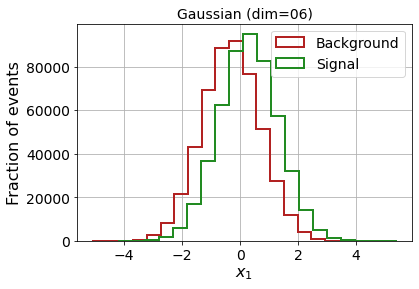

/home/perez/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y

[0]	validation_0-logloss:0.67095	validation_1-logloss:0.67116
[1]	validation_0-logloss:0.65188	validation_1-logloss:0.65216
[2]	validation_0-logloss:0.63539	validation_1-logloss:0.63578
[3]	validation_0-logloss:0.62119	validation_1-logloss:0.62167
[4]	validation_0-logloss:0.60845	validation_1-logloss:0.60899
[5]	validation_0-logloss:0.59735	validation_1-logloss:0.59797
[6]	validation_0-logloss:0.58756	validation_1-logloss:0.58825
[7]	validation_0-logloss:0.57879	validation_1-logloss:0.57953
[8]	validation_0-logloss:0.57076	validation_1-logloss:0.57157
[9]	validation_0-logloss:0.56367	validation_1-logloss:0.56458
[10]	validation_0-logloss:0.55731	validation_1-logloss:0.55828
[11]	validation_0-logloss:0.55150	validation_1-logloss:0.55252
[12]	validation_0-logloss:0.54619	validation_1-logloss:0.54725
[13]	validation_0-logloss:0.54135	validation_1-logloss:0.54250
[14]	validation_0-logloss:0.53698	validation_1-logloss:0.53816
[15]	validation_0-logloss:0.53295	validation_1-logloss:0.53421
[1

[130]	validation_0-logloss:0.47687	validation_1-logloss:0.48051
[131]	validation_0-logloss:0.47686	validation_1-logloss:0.48051
[132]	validation_0-logloss:0.47685	validation_1-logloss:0.48050
[133]	validation_0-logloss:0.47683	validation_1-logloss:0.48050
[134]	validation_0-logloss:0.47681	validation_1-logloss:0.48050
[135]	validation_0-logloss:0.47680	validation_1-logloss:0.48050
[136]	validation_0-logloss:0.47678	validation_1-logloss:0.48050
[137]	validation_0-logloss:0.47677	validation_1-logloss:0.48050
[138]	validation_0-logloss:0.47675	validation_1-logloss:0.48050
[139]	validation_0-logloss:0.47674	validation_1-logloss:0.48049
[140]	validation_0-logloss:0.47673	validation_1-logloss:0.48049
[141]	validation_0-logloss:0.47671	validation_1-logloss:0.48048
[142]	validation_0-logloss:0.47670	validation_1-logloss:0.48049
[143]	validation_0-logloss:0.47669	validation_1-logloss:0.48049
[144]	validation_0-logloss:0.47668	validation_1-logloss:0.48049
[145]	validation_0-logloss:0.47667	valid

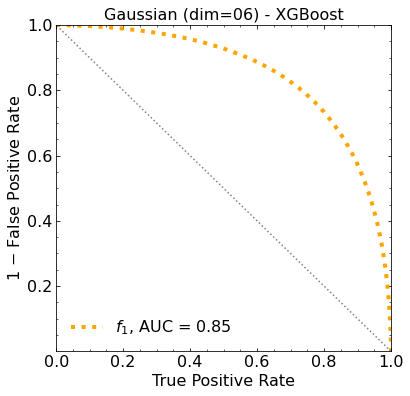

Classification score:


Substituting symbol N from STIXNonUnicode
Substituting symbol N from STIXNonUnicode


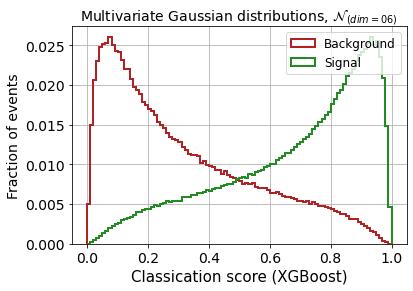

Classification score interpolation:


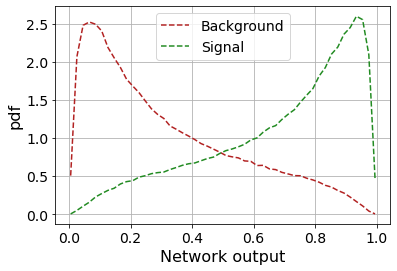


 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 10 bins:  5.174966673954778

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 25 bins:  5.633869898597867

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 50 bins:  5.7355428890984195

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 100 bins:  5.780763910052656

 ----------------------------------------- 

TRUE PDF LIKELIHOOD (GAUSSIANS):
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
n_ensembles (initial):  10000

 If  10100  =  1009    then the proposed range has to be extended
n_ensembles (actual):  9233
This may take long...


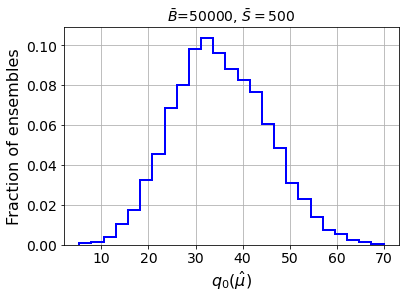

muhat mean:  0.08079714069099969
median q_muhat:  34.758057173542056
Z_gaussian:  5.895596422207176

 ------------------------------------ 

 MLL + KDE 


/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:788: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,


Background:  KernelDensity(algorithm='auto', atol=0, bandwidth=0.007847599703514606,
              breadth_first=True, kernel='epanechnikov', leaf_size=40,
              metric='euclidean', metric_params=None, rtol=0)


/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:788: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,


Signal:  KernelDensity(algorithm='auto', atol=0, bandwidth=0.007847599703514606,
              breadth_first=True, kernel='epanechnikov', leaf_size=40,
              metric='euclidean', metric_params=None, rtol=0)


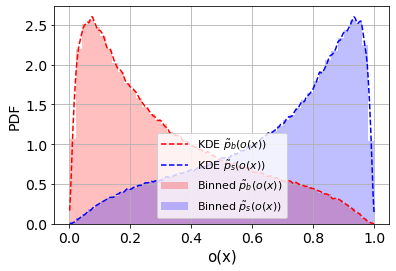

Z_KDE_bins :  5.766343992412554


B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
n_ensembles (initial):  10000

 If  10100  =  1009    then the proposed range has to be extended
n_ensembles (actual):  9233

 This may take long... 



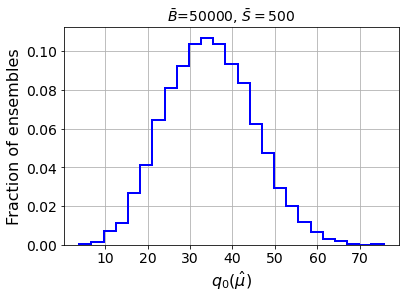

muhat mean:  0.074916061951695
median q_muhat:  34.50760705084588
Z_KDE:  5.874317581714992
Z_KDE mu=0:  5.8769504914147905

 -------------------------------- 

Working points, counting over 1 bin:
S_expected =  500
WP: 0     S/B**0.5=  2.23606797749979
WP:  0.25     S/B**0.5=  2.933897959258883
WP:  0.5     S/B**0.5=  3.565865603803425
WP:  0.75     S/B**0.5=  4.168657083165545
------------------------


In [16]:
dim=6

#######################
# generate the events #
#######################
    
background_X_1 = np.random.normal(-epsilon,1,N)
background_X_2 = np.random.normal(-epsilon,1,N)
background_X_3 = np.random.normal(-epsilon,1,N)
background_X_4 = np.random.normal(-epsilon,1,N)
background_X_5 = np.random.normal(-epsilon,1,N)
background_X_6 = np.random.normal(-epsilon,1,N)
    
signal_X_1 = np.random.normal(epsilon,1,N)
signal_X_2 = np.random.normal(epsilon,1,N)
signal_X_3 = np.random.normal(epsilon,1,N)
signal_X_4 = np.random.normal(epsilon,1,N)
signal_X_5 = np.random.normal(epsilon,1,N)
signal_X_6 = np.random.normal(epsilon,1,N)

dim1 = np.concatenate((background_X_1,signal_X_1))
dim2 = np.concatenate((background_X_2,signal_X_2))
dim3 = np.concatenate((background_X_3,signal_X_3))
dim4 = np.concatenate((background_X_4,signal_X_4))
dim5 = np.concatenate((background_X_5,signal_X_5))
dim6 = np.concatenate((background_X_6,signal_X_6))

# labels
background_Y = np.zeros(N)
signal_Y = np.ones(N)

# DATA in a single matrix (features + labels)
df = pd.DataFrame()
df['dim1'] = dim1.reshape(-1)
df['dim2'] = dim2.reshape(-1)
df['dim3'] = dim3.reshape(-1)
df['dim4'] = dim4.reshape(-1)
df['dim5'] = dim5.reshape(-1)
df['dim6'] = dim6.reshape(-1)
df['Y'] = np.concatenate((background_Y.astype('int'),signal_Y.astype('int')))

X_gauss = df[['dim1','dim2','dim3','dim4','dim5','dim6']].values 
Y_gauss = df[['Y']].values

X_gauss_train, X_gauss_val, Y_gauss_train, Y_gauss_val = train_test_split(X_gauss, Y_gauss, test_size=0.5)


print(X_gauss_train.shape)
print(Y_gauss_train.shape)
print(X_gauss_val.shape)
print(Y_gauss_val.shape)


# PLOT (only 1st feature) to visualize the data
X_gauss_val_SM = []
X_gauss_val_NP = []

for i in range(len(Y_gauss_val)):
    if Y_gauss_val[i] ==0:
        X_gauss_val_SM.append(X_gauss_val[i].tolist())
    else:
        X_gauss_val_NP.append(X_gauss_val[i].tolist())    


X_gauss_val_SM = np.array(X_gauss_val_SM)
X_gauss_val_NP = np.array(X_gauss_val_NP)


weights = np.ones_like(X_gauss_val_SM[:,0])/float(len(X_gauss_val_SM[:,0]))
plt.hist(X_gauss_val_SM[:,0], 20, histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(X_gauss_val_NP[:,0])/float(len(X_gauss_val_NP[:,0]))
plt.hist(X_gauss_val_NP[:,0], 20, histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$x_1$",fontsize=16)
plt.ylabel("Fraction of events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.title(r"Gaussian (dim=%0.2d)" % dim,fontsize=14)
plt.show()  




#######################
# CLASSIFIER: XGBoost #
#######################

# CLASSIFIER
classifier = XGBClassifier(
    n_estimators=500,
    learning_rate=0.1,
    reg_lambda=0.0,reg_alpha=0.0,
    gamma=0.0,objective='binary:logistic',
    max_depth=5)

# FIT
classifier.fit(X_gauss_train,Y_gauss_train,eval_set=[(X_gauss_train, Y_gauss_train), (X_gauss_val, Y_gauss_val)],
        eval_metric='logloss',early_stopping_rounds=50,#early stopping
        verbose=True)

# PREDICTIONS
y_pred_xg = classifier.predict_proba(X_gauss_val).T[1]


# ROC
fpr_gauss_xg, tpr_gauss_xg, _ = roc_curve(Y_gauss_val, y_pred_xg)
roc_auc_xg = auc(fpr_gauss_xg, tpr_gauss_xg)

store_AUC.append(roc_auc_xg)


# PLOT THE ROC WITH AUC
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax0.minorticks_on()


plt.plot(tpr_gauss_xg,1-fpr_gauss_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
plt.plot([1,0],[0,1],ls=":",color="grey")
plt.xlabel("True Positive Rate",fontsize=16)
plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
plt.legend()
plt.title(r"Gaussian (dim=%0.2d) - XGBoost" % dim,fontsize=16)
plt.xlim([0,1])
plt.ylim([0,1])
plt.yticks([0.2,0.4,0.6,0.8,1.])
plt.legend(frameon=False,fontsize=16)
plt.show()




########################
# CLASSIFICATION SCORE #
########################

# Outputs for validation data set

pred_XG_SM = []
pred_XG_NP = []

for i in range(len(Y_gauss_val)):
    if Y_gauss_val[i] == 0:
        pred_XG_SM.append(y_pred_xg[i])
    else:
        pred_XG_NP.append(y_pred_xg[i])
        
        
print('Classification score:')
        
weights = np.ones_like(pred_XG_SM)/float(len(pred_XG_SM))
nSM, binsSM, patchesSM = plt.hist(pred_XG_SM, 100, weights=weights, range=[0,1], histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(pred_XG_NP)/float(len(pred_XG_NP))
nNP, binsNP, patchesNP = plt.hist(pred_XG_NP, 100, weights=weights, range=[0,1], histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Classication score (XGBoost)",fontsize=15)
plt.ylabel("Fraction of events",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
plt.title('Multivariate Gaussian distributions, $\mathcal{N}_{(dim=%0.2d)}$' % dim, fontsize=14)
plt.show()





# INTERPOLATE TO USE AS p_s(x) and p_b(x) ESTIMATES

# center of each bin

binsSM_mid = []
binsNP_mid = []

for i in range(len(binsSM)-1):
    binsSM_mid.append( ((binsSM[i+1]-binsSM[i])/2)+binsSM[i] )
    
for i in range(len(binsNP)-1):
    binsNP_mid.append( ((binsNP[i+1]-binsNP[i])/2)+binsNP[i] )
    

# get the width of each bin
bin_width_SM = binsSM[1] - binsSM[0]
bin_width_NP = binsNP[1] - binsNP[0]
   
    
# Interpolation, cubic
fcubic_XG_SM = interp1d(binsSM_mid, nSM, kind='cubic')
fcubic_XG_NP = interp1d(binsNP_mid, nNP, kind='cubic')


# Normalize

def fcubic_XG_SM_norm(x):
    return fcubic_XG_SM(x)/bin_width_SM

def fcubic_XG_NP_norm(x):
    return fcubic_XG_NP(x)/bin_width_NP


print('Classification score interpolation:')
# x to plot
xnew_XG_SM = np.linspace(min(binsSM_mid), max(binsSM_mid), num=50, endpoint=True)
xnew_XG_NP = np.linspace(min(binsNP_mid), max(binsNP_mid), num=50, endpoint=True)

plt.plot(xnew_XG_SM, fcubic_XG_SM_norm(xnew_XG_SM), '--', color='firebrick', label='Background')
plt.plot(xnew_XG_NP, fcubic_XG_NP_norm(xnew_XG_NP), '--', color='forestgreen', label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Network output",fontsize=16)
plt.ylabel("pdf",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()

print('\n ----------------------------------------- \n')








##################################################
# CLASSIFIER OUTPUT BINNED POISON LOG-LIKELIHOOD #
##################################################

# 10 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(10), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(10), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_10bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_10bins.append(Z_bins_XG_10bins)

print('Z_XG 10 bins: ', Z_bins_XG_10bins)
print('\n ----------------------------------------- \n')




##############################

# 25 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(25), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(25), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_25bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_25bins.append(Z_bins_XG_25bins)

print('Z_XG 25 bins: ', Z_bins_XG_25bins)
print('\n ----------------------------------------- \n')




##############################

# 50 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(50), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(50), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_50bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_50bins.append(Z_bins_XG_50bins)

print('Z_XG 50 bins: ', Z_bins_XG_50bins)
print('\n ----------------------------------------- \n')




##############################

# 100 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(100), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(100), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_100bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_100bins.append(Z_bins_XG_100bins)

print('Z_XG 100 bins: ', Z_bins_XG_100bins)
print('\n ----------------------------------------- \n')








###################################
# TRUE PDF LIKELIHOOD (GAUSSIANS) #
###################################

print('TRUE PDF LIKELIHOOD (GAUSSIANS):')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print('S/$\sqrt{B}$: ', SsqrtB)
print('n_ensembles (initial): ', n_ensembles)


# to construct ensembles B and S events are taken from Poisson distributions
mu = S_expected + B_expected


# Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

# around the mean its populated so let's try (proposed range to be checked)
list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
to_check = len(list_events_per_ensembles)

# I want at least one ensemble populated
list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



# Remove from the list the elements without at least 1 ensemble possible
for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] > 1:
        list_events_per_ensembles = list_events_per_ensembles[i:]
        list_nums_ensembles = list_nums_ensembles[i:]
        break


for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] < 1:
        list_events_per_ensembles = list_events_per_ensembles[:i]
        list_nums_ensembles = list_nums_ensembles[:i]
        break

print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

print('n_ensembles (actual): ', sum(list_nums_ensembles))



# lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

p_berno = S_expected/(S_expected+B_expected)

list_S_per_ensembles = []
list_B_per_ensembles = []

for jj in range(len(list_events_per_ensembles)):
    list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
    list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

######
# NOW I HAVE 4 LISTS:
# list_events_per_ensembles     list with the number of events per ensemble (its a range)
# list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
# list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
# list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
######



print('This may take long...')


#############################
# NOW LETS APPLY THE METHOD #
#############################
muhat_selected_list = []
q_muhat = []

for bb in range(len(list_nums_ensembles)):

    for kk in range(list_nums_ensembles[bb]):

#         # SIGNAL events in an ensemble
#         NP_shuf = shuffle(X_gauss_val_NP)[:list_S_per_ensembles[bb]]

#         prob_NP_given_B = [] # p_b(S_ensemble)
#         prob_NP_given_S = [] # p_s(S_ensemble)

#         for ll in range(len(NP_shuf)):
#             prob_NP_given_S.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (NP_shuf[ll,0]-epsilon)**2 + (NP_shuf[ll,1]-epsilon)**2 + (NP_shuf[ll,2]-epsilon)**2 + (NP_shuf[ll,3]-epsilon)**2 + (NP_shuf[ll,4]-epsilon)**2 + (NP_shuf[ll,5]-epsilon)**2 ) ) )
#             prob_NP_given_B.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (NP_shuf[ll,0]+epsilon)**2 + (NP_shuf[ll,1]+epsilon)**2 + (NP_shuf[ll,2]+epsilon)**2 + (NP_shuf[ll,3]+epsilon)**2 + (NP_shuf[ll,4]+epsilon)**2 + (NP_shuf[ll,5]+epsilon)**2 ) ) )


        # BACKGROUND events in an ensemble
        SM_shuf = shuffle(X_gauss_val_SM)[:list_B_per_ensembles[bb]]

        prob_SM_given_B = [] # p_b(B_ensemble)
        prob_SM_given_S = [] # p_s(B_ensemble)

        for ll in range(len(SM_shuf)):
            prob_SM_given_S.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (SM_shuf[ll,0]-epsilon)**2 + (SM_shuf[ll,1]-epsilon)**2 + (SM_shuf[ll,2]-epsilon)**2 + (SM_shuf[ll,3]-epsilon)**2 + (SM_shuf[ll,4]-epsilon)**2 + (SM_shuf[ll,5]-epsilon)**2 ) ) )
            prob_SM_given_B.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (SM_shuf[ll,0]+epsilon)**2 + (SM_shuf[ll,1]+epsilon)**2 + (SM_shuf[ll,2]+epsilon)**2 + (SM_shuf[ll,3]+epsilon)**2 + (SM_shuf[ll,4]+epsilon)**2 + (SM_shuf[ll,5]+epsilon)**2 ) ) )


        # p_b(x_ensemble) =    concatenate: p_b(B_ensemble) and p_b(S_ensemble)
        prob_x_given_B = prob_SM_given_B #+ prob_NP_given_B

        # p_s(x_ensemble) =    concatenate: p_s(B_ensemble) and p_s(S_ensemble)
        prob_x_given_S = prob_SM_given_S #+ prob_NP_given_S




        # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
        # WE NEED TO ESTIMATE mu_hat for this particular ensemble
        # we are going to obtain a mu_hat with a grid of values for this particular ensemble



        mu_hat_condition_equal_1 = []

        # grid, mu_hat is around 1
        muhat_test = np.arange(0., 1.5, 0.1).tolist()

        B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

        for vv in range(len(muhat_test)):

            mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



        muhat_selected = 0.01

        # from the grid, select the mu_hat such that the condition is equal to 1
        if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 > 0:
                    muhat_selected = muhat_test[ll]
                    break


        if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 < 0:
                    muhat_selected = muhat_test[ll]
                    break


        muhat_selected_list.append(muhat_selected)



        # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
        # and append it (we need the median over lots of ensembles)
        q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (muhat_selected*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )  ) )



# Histogram of q_muhats

weights = np.ones_like(q_muhat)/float(len(q_muhat))
nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
plt.ylabel("Fraction of ensembles",fontsize=16)
plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected),fontsize=14)
plt.grid()
plt.show()


# Finally calculate muhat_mean and Z_gaussian
muhat_mean_gaussian = np.mean(muhat_selected_list)
store_muhat_mean_gaussian.append(muhat_mean_gaussian)

# Remove nan if any
q_muhat = [x for x in q_muhat if x == x]

q_muhat_median = np.median(q_muhat)

Z_gaussian = abs(q_muhat_median)**0.5
store_Z_gaussian.append(Z_gaussian)

print('muhat mean: ', muhat_mean_gaussian)
print('median q_muhat: ', q_muhat_median)
print('Z_gaussian: ', Z_gaussian)


print('\n ------------------------------------ \n')


    
    
    


    
#########
#  KDE  #
#########  

print(' MLL + KDE ')

# FIND THE BANDWIDTH

bandwidth = np.logspace(-4.0, 0, 20)

kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_SM[:50000]])
print('Background: ', grid.best_estimator_)

SM_bandwidth = grid.best_estimator_.bandwidth



kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_NP[:50000]])
print('Signal: ', grid.best_estimator_)

NP_bandwidth = grid.best_estimator_.bandwidth




# with each calculated bandwidth estimate the pdf with KDE to the classifier output (for background and signal)
# notice: epanechnikov kernel
kde_bkg = KernelDensity(kernel='epanechnikov', bandwidth=SM_bandwidth).fit(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ])
kde_sig = KernelDensity(kernel='epanechnikov', bandwidth=NP_bandwidth).fit(np.c_[pred_XG_NP, np.ones(len(pred_XG_NP)) ])


# range (~between 0 and 1)
min_val = np.min([np.min(pred_XG_SM),np.min(pred_XG_NP)])
max_val = np.max([np.max(pred_XG_SM),np.max(pred_XG_NP)])

s_vals = np.linspace(min_val,max_val,1000)





# evaluate the densities for each value of s (~bins)
dens_bkg = np.exp(kde_bkg.score_samples(np.c_[s_vals, np.zeros(len(s_vals)) ]) )
dens_sig = np.exp(kde_sig.score_samples(np.c_[s_vals, np.ones(len(s_vals)) ]) )





# Normalize to 1
# Area
factor_aux_SM = sum(dens_bkg*(s_vals[1]-s_vals[0]))
factor_aux_NP = sum(dens_sig*(s_vals[1]-s_vals[0]))

# normalize
dens_bkg = dens_bkg / factor_aux_SM
dens_sig = dens_sig / factor_aux_NP







# plot to check the estimation

plt.figure()

plt.hist(pred_XG_SM,density=True,bins=50,color='red',alpha=0.25,label=r'Binned $\tilde{p}_{b}(o(x))$');
plt.plot(s_vals,dens_bkg,color='red',label=r'KDE $\tilde{p}_{b}(o(x))$',linestyle='dashed');

plt.hist(pred_XG_NP,density=True,bins=50,color='blue',alpha=0.25,label=r'Binned $\tilde{p}_{s}(o(x))$');
plt.plot(s_vals,dens_sig,color='blue',label=r'KDE $\tilde{p}_{s}(o(x))$',linestyle='dashed');

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("o(x)",fontsize=15)
plt.ylabel("PDF",fontsize=14)
plt.grid()
plt.legend(loc="lower center", fontsize=11, handlelength=2.5)
#plt.title(r'Multivariate Gaussian distributions, $\mathcal{N}_{dim}$', fontsize=14)
#plt.savefig('images/' + 'Ndimgaussian-output.pdf', format="pdf", bbox_inches="tight")
plt.show()





# We can do a quick Z bin-loglikelihood calculation using the computed KDE
# this is to check the KDE here, because we use KDE to avoid binning


# B events in each bin: 
# total number of B * B_pdf value in each bin * bin size
Bd = B_expected*dens_bkg*(s_vals[1]-s_vals[0])


# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
Bd_noceros = []
for i in range(len(Bd)):
    if Bd[i]!=0:
        Bd_noceros.append(Bd[i])

min_back = min(Bd_noceros)

# replace the zeros
for i in range(len(Bd)):
    if Bd[i]==0:
        Bd[i] = min_back


# S events in each bin: 
# value of S/sqrt{B} * sqrt{B} * S_pdf value in each bin * bin size
Sd = SsqrtB*np.sqrt(B_expected)*dens_sig*(s_vals[1]-s_vals[0])


# Z value:
#Z_KDE_bins = np.sqrt(2.0*np.sum(((Sd+Bd)*np.log(1.0+Sd/Bd)-Sd))) # Discovery
Z_KDE_bins = np.sqrt(2.0*np.sum(Bd*np.log(Bd/(Sd+Bd))+Sd)) # Exclusion

store_Z_KDE_bins.append(Z_KDE_bins)

print('Z_KDE_bins : ', Z_KDE_bins)



    
    
    
#############
# MLL + KDE #
#############
    
# FOR EXCLUSION:
# we need to evaluate the KDE densities with the classifier output of BACKGROUND EVENTS

# FOR DISCOVERY:
# we need to evaluate the KDE densities with the classifier output of BACKGROUND and SIGNAL EVENTS

KDE_SM_pred_SM = np.exp(kde_bkg.score_samples(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ]) )
KDE_NP_pred_SM = np.exp(kde_sig.score_samples(np.c_[pred_XG_SM, np.ones(len(pred_XG_SM)) ]) )


# Normalize

KDE_SM_pred_SM = KDE_SM_pred_SM / factor_aux_SM
KDE_NP_pred_SM = KDE_NP_pred_SM / factor_aux_NP




indices = [i for i in range(len(KDE_NP_pred_SM))]


# the first part is the same as before, but we repeat it, it is not the expensive part

print('\n')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)
print('n_ensembles (initial): ', n_ensembles)


# to construct ensembles B and S events are taken from Poisson distributions
mu = S_expected + B_expected


# Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

# around the mean its populated so let's try (proposed range to be checked)
list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
to_check = len(list_events_per_ensembles)

# I want at least one ensemble populated
list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



# Remove from the list the elements without at least 1 ensemble possible
for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] > 1:
        list_events_per_ensembles = list_events_per_ensembles[i:]
        list_nums_ensembles = list_nums_ensembles[i:]
        break


for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] < 1:
        list_events_per_ensembles = list_events_per_ensembles[:i]
        list_nums_ensembles = list_nums_ensembles[:i]
        break

print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

print('n_ensembles (actual): ', sum(list_nums_ensembles))



# lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

p_berno = S_expected/(S_expected+B_expected)

list_S_per_ensembles = []
list_B_per_ensembles = []

for jj in range(len(list_events_per_ensembles)):
    list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
    list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

######
# NOW I HAVE 4 LISTS:
# list_events_per_ensembles     list with the number of events per ensemble (its a range)
# list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
# list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
# list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
######



print('\n This may take long... \n')


# NOW LETS APPLY THE METHOD

muhat_selected_list = []
q_muhat = []
q_muhat_mu0 = []

for bb in range(len(list_nums_ensembles)):

    for kk in range(list_nums_ensembles[bb]):

        # KDE
        ran_ind = np.random.choice(indices, list_B_per_ensembles[bb])

        KDE_SM_pred_SM_shuf = []
        KDE_NP_pred_SM_shuf = []

        for i in ran_ind:
            KDE_SM_pred_SM_shuf.append(KDE_SM_pred_SM[i])
            KDE_NP_pred_SM_shuf.append(KDE_NP_pred_SM[i])

        KDE_SM_pred_SM_shuf  = np.array(KDE_SM_pred_SM_shuf)
        KDE_NP_pred_SM_shuf  = np.array(KDE_NP_pred_SM_shuf)



        # p_b(o(x_ensemble)) =    concatenate: p_b(o(B_ensemble)) and p_b(o(S_ensemble))  NOTICE THE o(x)
        prob_x_given_B = np.ndarray.tolist( KDE_SM_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_SM_pred_NP_shuf )

        # p_s(o(x_ensemble)) =    concatenate: p_s(o(B_ensemble)) and p_s(o(S_ensemble))  NOTICE THE o(x)
        prob_x_given_S = np.ndarray.tolist( KDE_NP_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_NP_pred_NP_shuf )





        # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
        # WE NEED TO ESTIMATE mu_hat for this particular ensemble
        # we are going to obtain a mu_hat with a grid of values for this particular ensemble



        mu_hat_condition_equal_1 = []

        # grid, mu_hat is around 1
        muhat_test = np.arange(0., 1.5, 0.1).tolist()

        B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

        for vv in range(len(muhat_test)):

            mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



        muhat_selected = 0.01

        # from the grid, select the mu_hat such that the condition is equal to 1
        if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 > 0:
                    muhat_selected = muhat_test[ll]
                    break


        if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 < 0:
                    muhat_selected = muhat_test[ll]
                    break


        muhat_selected_list.append(muhat_selected)



        # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
        # and append it (we need the median over lots of ensembles)
        #q_muhat.append( 2 * ( (-1.*muhat_selected * S_expected) + sum( [np.log( 1 + ( (muhat_selected*S_expected/B_expected) * (x / y) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] ) ) )
        # EXCLUSION:
        q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (muhat_selected*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
) )
        q_muhat_mu0.append( 2 * ( ( (1.-0.) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (0.*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
) )


# Histogram of q_muhats

weights = np.ones_like(q_muhat)/float(len(q_muhat))
nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)
#plt.xlim(0,1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
plt.ylabel("Fraction of ensembles",fontsize=16)
plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected),fontsize=14)
plt.grid()
#plt.legend(fontsize=14)
plt.show()


# Finally calculate muhat_mean and Z_gaussian

# Remove nan if any
q_muhat_mu0 = [x for x in q_muhat_mu0 if x == x]

q_muhat_median_mu0 = np.median(q_muhat_mu0)

Z_KDE_mu0 = abs(q_muhat_median_mu0)**0.5
store_Z_MLL_KDE_mu0.append(Z_KDE_mu0)


# Finally calculate muhat_mean and Z_gaussian
muhat_mean_MLL_KDE = np.mean(muhat_selected_list)
store_muhat_mean_MLL_KDE.append(muhat_mean_MLL_KDE)

# Remove nan if any
q_muhat = [x for x in q_muhat if x == x]

q_muhat_median = np.median(q_muhat)

Z_KDE = abs(q_muhat_median)**0.5
store_Z_MLL_KDE.append(Z_KDE)

print('muhat mean: ', muhat_mean_MLL_KDE)
print('median q_muhat: ', q_muhat_median)
print('Z_KDE: ', Z_KDE)
print('Z_KDE mu=0: ', Z_KDE_mu0)

print('\n -------------------------------- \n')
    
    

    
    
    
    
    
    
#######################################
# Working points, counting over 1 bin #
#######################################

print('Working points, counting over 1 bin:')

# BACKGROUND 

# number of background ensembles
B_ensembles = int(len(pred_XG_SM)/B_expected)

# shorten the number of B events so I get an integer number of ensembles
pred_XG_SM_entero = pred_XG_SM[:int(len(pred_XG_SM)/B_expected) * B_expected]

XG_SM_passWP0 = 0
XG_SM_passWP1 = 0
XG_SM_passWP2 = 0

for i in range(len(pred_XG_SM_entero)):
    if pred_XG_SM_entero[i] > WP[0]:
        XG_SM_passWP0 += 1
    if pred_XG_SM_entero[i] > WP[1]:
        XG_SM_passWP1 += 1
    if pred_XG_SM_entero[i] > WP[2]:
        XG_SM_passWP2 += 1



# SIGNAL

# number of signal ensembles
S_ensembles = int(len(pred_XG_NP)/S_expected)

# shorten the number of S events so I get an integer number of ensembles
pred_XG_NP_entero = pred_XG_NP[:int(len(pred_XG_NP)/S_expected) * S_expected]

XG_NP_passWP0 = 0
XG_NP_passWP1 = 0
XG_NP_passWP2 = 0

for i in range(len(pred_XG_NP_entero)):
    if pred_XG_NP_entero[i] > WP[0]:
        XG_NP_passWP0 += 1
    if pred_XG_NP_entero[i] > WP[1]:
        XG_NP_passWP1 += 1
    if pred_XG_NP_entero[i] > WP[2]:
        XG_NP_passWP2 += 1

Z_WP0 = ( XG_NP_passWP0 / S_ensembles ) / ( XG_SM_passWP0 / B_ensembles )**0.5
Z_WP1 = ( XG_NP_passWP1 / S_ensembles ) / ( XG_SM_passWP1 / B_ensembles )**0.5
Z_WP2 = ( XG_NP_passWP2 / S_ensembles ) / ( XG_SM_passWP2 / B_ensembles )**0.5


# save the results Z_binned after WP
SrootB_WP0.append( Z_WP0 )
SrootB_WP1.append( Z_WP1 )
SrootB_WP2.append( Z_WP2 )

print('S_expected = ', S_expected)
print('WP: 0     S/B**0.5= ', S_expected/(B_expected)**0.5)
print('WP: ', WP[0], '    S/B**0.5= ', Z_WP0 )
print('WP: ', WP[1], '    S/B**0.5= ', Z_WP1 )
print('WP: ', WP[2], '    S/B**0.5= ', Z_WP2 )
print('------------------------')

In [17]:
print('dim = ', dim)

print(roc_auc_xg)

print(Z_bins_XG_10bins)
print(Z_bins_XG_25bins)
print(Z_bins_XG_50bins)
print(Z_bins_XG_100bins)

print(muhat_mean_gaussian)
print(Z_gaussian)

print(muhat_mean_MLL_KDE)
print(Z_KDE_bins)
print(Z_KDE)
print(Z_KDE_mu0)

print(Z_WP0)
print(Z_WP1)
print(Z_WP2)

dim =  6
0.8496744706899296
5.174966673954778
5.633869898597867
5.7355428890984195
5.780763910052656
0.08079714069099969
5.895596422207176
0.074916061951695
5.766343992412554
5.874317581714992
5.8769504914147905
2.933897959258883
3.565865603803425
4.168657083165545


In [ ]:
# To use if you dont want to run everything again. Store the previous results
store_AUC.append()

store_Z_bins_XG_10bins.append()
store_Z_bins_XG_25bins.append()
store_Z_bins_XG_50bins.append()
store_Z_bins_XG_100bins.append()

store_muhat_mean_gaussian.append()
store_Z_gaussian.append()

store_muhat_mean_MLL_KDE.append()
store_Z_KDE_bins.append()
store_Z_MLL_KDE.append()
store_Z_MLL_KDE_mu0.append()

SrootB_WP0.append()
SrootB_WP1.append()
SrootB_WP2.append()

## Dim=7

(1000000, 7)
(1000000, 1)
(1000000, 7)
(1000000, 1)


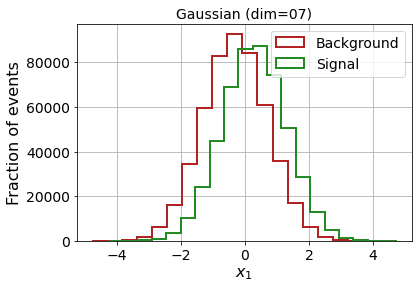

/home/perez/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y

[0]	validation_0-logloss:0.67087	validation_1-logloss:0.67107
[1]	validation_0-logloss:0.65135	validation_1-logloss:0.65163
[2]	validation_0-logloss:0.63396	validation_1-logloss:0.63439
[3]	validation_0-logloss:0.61891	validation_1-logloss:0.61943
[4]	validation_0-logloss:0.60557	validation_1-logloss:0.60623
[5]	validation_0-logloss:0.59355	validation_1-logloss:0.59430
[6]	validation_0-logloss:0.58275	validation_1-logloss:0.58361
[7]	validation_0-logloss:0.57302	validation_1-logloss:0.57399
[8]	validation_0-logloss:0.56439	validation_1-logloss:0.56547
[9]	validation_0-logloss:0.55634	validation_1-logloss:0.55754
[10]	validation_0-logloss:0.54907	validation_1-logloss:0.55032
[11]	validation_0-logloss:0.54249	validation_1-logloss:0.54380
[12]	validation_0-logloss:0.53648	validation_1-logloss:0.53784
[13]	validation_0-logloss:0.53095	validation_1-logloss:0.53244
[14]	validation_0-logloss:0.52588	validation_1-logloss:0.52743
[15]	validation_0-logloss:0.52121	validation_1-logloss:0.52286
[1

[130]	validation_0-logloss:0.44860	validation_1-logloss:0.45323
[131]	validation_0-logloss:0.44857	validation_1-logloss:0.45322
[132]	validation_0-logloss:0.44855	validation_1-logloss:0.45322
[133]	validation_0-logloss:0.44853	validation_1-logloss:0.45321
[134]	validation_0-logloss:0.44851	validation_1-logloss:0.45321
[135]	validation_0-logloss:0.44849	validation_1-logloss:0.45321
[136]	validation_0-logloss:0.44847	validation_1-logloss:0.45320
[137]	validation_0-logloss:0.44844	validation_1-logloss:0.45319
[138]	validation_0-logloss:0.44842	validation_1-logloss:0.45319
[139]	validation_0-logloss:0.44839	validation_1-logloss:0.45318
[140]	validation_0-logloss:0.44837	validation_1-logloss:0.45318
[141]	validation_0-logloss:0.44835	validation_1-logloss:0.45317
[142]	validation_0-logloss:0.44833	validation_1-logloss:0.45316
[143]	validation_0-logloss:0.44832	validation_1-logloss:0.45316
[144]	validation_0-logloss:0.44829	validation_1-logloss:0.45316
[145]	validation_0-logloss:0.44828	valid

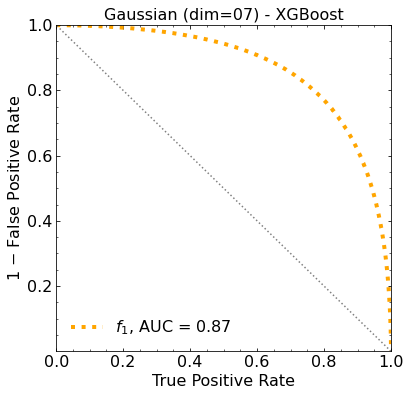

Classification score:


Substituting symbol N from STIXNonUnicode
Substituting symbol N from STIXNonUnicode


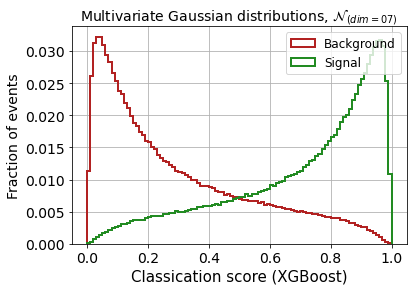

Classification score interpolation:


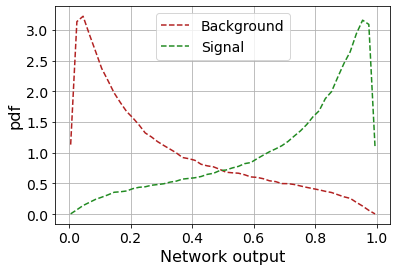


 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 10 bins:  5.667865689217378

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 25 bins:  6.248082037892916

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 50 bins:  6.433495937941979

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 100 bins:  6.544657364646256

 ----------------------------------------- 

TRUE PDF LIKELIHOOD (GAUSSIANS):
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
n_ensembles (initial):  10000

 If  10100  =  1009    then the proposed range has to be extended
n_ensembles (actual):  9233
This may take long...


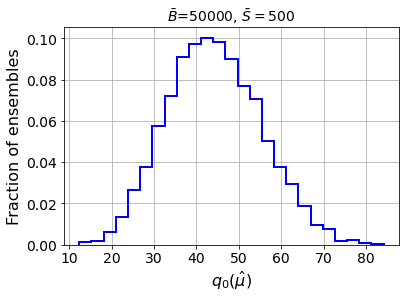

muhat mean:  0.08063467995234486
median q_muhat:  43.744660634144225
Z_gaussian:  6.613974647225692

 ------------------------------------ 

 MLL + KDE 


/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:788: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,


Background:  KernelDensity(algorithm='auto', atol=0, bandwidth=0.007847599703514606,
              breadth_first=True, kernel='epanechnikov', leaf_size=40,
              metric='euclidean', metric_params=None, rtol=0)


/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:788: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,


Signal:  KernelDensity(algorithm='auto', atol=0, bandwidth=0.007847599703514606,
              breadth_first=True, kernel='epanechnikov', leaf_size=40,
              metric='euclidean', metric_params=None, rtol=0)


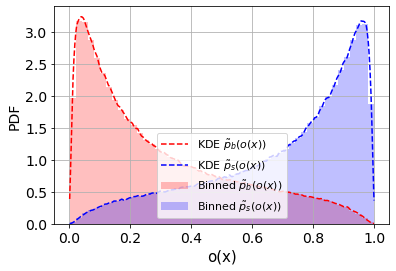

Z_KDE_bins :  6.503602348470732


B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
n_ensembles (initial):  10000

 If  10100  =  1009    then the proposed range has to be extended
n_ensembles (actual):  9233

 This may take long... 



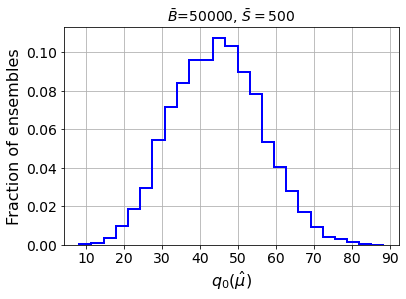

muhat mean:  0.06220080147297737
median q_muhat:  44.50327766140458
Z_KDE:  6.671077698648441
Z_KDE mu=0:  6.6723007962862875

 -------------------------------- 

Working points, counting over 1 bin:
S_expected =  500
WP: 0     S/B**0.5=  2.23606797749979
WP:  0.25     S/B**0.5=  3.07743826041617
WP:  0.5     S/B**0.5=  3.7835312822829072
WP:  0.75     S/B**0.5=  4.577220883278492
------------------------


In [18]:
dim=7

#######################
# generate the events #
#######################
    
background_X_1 = np.random.normal(-epsilon,1,N)
background_X_2 = np.random.normal(-epsilon,1,N)
background_X_3 = np.random.normal(-epsilon,1,N)
background_X_4 = np.random.normal(-epsilon,1,N)
background_X_5 = np.random.normal(-epsilon,1,N)
background_X_6 = np.random.normal(-epsilon,1,N)
background_X_7 = np.random.normal(-epsilon,1,N)
    
signal_X_1 = np.random.normal(epsilon,1,N)
signal_X_2 = np.random.normal(epsilon,1,N)
signal_X_3 = np.random.normal(epsilon,1,N)
signal_X_4 = np.random.normal(epsilon,1,N)
signal_X_5 = np.random.normal(epsilon,1,N)
signal_X_6 = np.random.normal(epsilon,1,N)
signal_X_7 = np.random.normal(epsilon,1,N)

dim1 = np.concatenate((background_X_1,signal_X_1))
dim2 = np.concatenate((background_X_2,signal_X_2))
dim3 = np.concatenate((background_X_3,signal_X_3))
dim4 = np.concatenate((background_X_4,signal_X_4))
dim5 = np.concatenate((background_X_5,signal_X_5))
dim6 = np.concatenate((background_X_6,signal_X_6))
dim7 = np.concatenate((background_X_7,signal_X_7))

# labels
background_Y = np.zeros(N)
signal_Y = np.ones(N)

# DATA in a single matrix (features + labels)
df = pd.DataFrame()
df['dim1'] = dim1.reshape(-1)
df['dim2'] = dim2.reshape(-1)
df['dim3'] = dim3.reshape(-1)
df['dim4'] = dim4.reshape(-1)
df['dim5'] = dim5.reshape(-1)
df['dim6'] = dim6.reshape(-1)
df['dim7'] = dim7.reshape(-1)
df['Y'] = np.concatenate((background_Y.astype('int'),signal_Y.astype('int')))

X_gauss = df[['dim1','dim2','dim3','dim4','dim5','dim6','dim7']].values 
Y_gauss = df[['Y']].values

X_gauss_train, X_gauss_val, Y_gauss_train, Y_gauss_val = train_test_split(X_gauss, Y_gauss, test_size=0.5)


print(X_gauss_train.shape)
print(Y_gauss_train.shape)
print(X_gauss_val.shape)
print(Y_gauss_val.shape)


# PLOT (only 1st feature) to visualize the data
X_gauss_val_SM = []
X_gauss_val_NP = []

for i in range(len(Y_gauss_val)):
    if Y_gauss_val[i] ==0:
        X_gauss_val_SM.append(X_gauss_val[i].tolist())
    else:
        X_gauss_val_NP.append(X_gauss_val[i].tolist())    


X_gauss_val_SM = np.array(X_gauss_val_SM)
X_gauss_val_NP = np.array(X_gauss_val_NP)


weights = np.ones_like(X_gauss_val_SM[:,0])/float(len(X_gauss_val_SM[:,0]))
plt.hist(X_gauss_val_SM[:,0], 20, histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(X_gauss_val_NP[:,0])/float(len(X_gauss_val_NP[:,0]))
plt.hist(X_gauss_val_NP[:,0], 20, histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$x_1$",fontsize=16)
plt.ylabel("Fraction of events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.title(r"Gaussian (dim=%0.2d)" % dim,fontsize=14)
plt.show()  




#######################
# CLASSIFIER: XGBoost #
#######################

# CLASSIFIER
classifier = XGBClassifier(
    n_estimators=500,
    learning_rate=0.1,
    reg_lambda=0.0,reg_alpha=0.0,
    gamma=0.0,objective='binary:logistic',
    max_depth=5)

# FIT
classifier.fit(X_gauss_train,Y_gauss_train,eval_set=[(X_gauss_train, Y_gauss_train), (X_gauss_val, Y_gauss_val)],
        eval_metric='logloss',early_stopping_rounds=50,#early stopping
        verbose=True)

# PREDICTIONS
y_pred_xg = classifier.predict_proba(X_gauss_val).T[1]


# ROC
fpr_gauss_xg, tpr_gauss_xg, _ = roc_curve(Y_gauss_val, y_pred_xg)
roc_auc_xg = auc(fpr_gauss_xg, tpr_gauss_xg)

store_AUC.append(roc_auc_xg)


# PLOT THE ROC WITH AUC
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax0.minorticks_on()


plt.plot(tpr_gauss_xg,1-fpr_gauss_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
plt.plot([1,0],[0,1],ls=":",color="grey")
plt.xlabel("True Positive Rate",fontsize=16)
plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
plt.legend()
plt.title(r"Gaussian (dim=%0.2d) - XGBoost" % dim,fontsize=16)
plt.xlim([0,1])
plt.ylim([0,1])
plt.yticks([0.2,0.4,0.6,0.8,1.])
plt.legend(frameon=False,fontsize=16)
plt.show()




########################
# CLASSIFICATION SCORE #
########################

# Outputs for validation data set

pred_XG_SM = []
pred_XG_NP = []

for i in range(len(Y_gauss_val)):
    if Y_gauss_val[i] == 0:
        pred_XG_SM.append(y_pred_xg[i])
    else:
        pred_XG_NP.append(y_pred_xg[i])
        
        
print('Classification score:')
        
weights = np.ones_like(pred_XG_SM)/float(len(pred_XG_SM))
nSM, binsSM, patchesSM = plt.hist(pred_XG_SM, 100, weights=weights, range=[0,1], histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(pred_XG_NP)/float(len(pred_XG_NP))
nNP, binsNP, patchesNP = plt.hist(pred_XG_NP, 100, weights=weights, range=[0,1], histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Classication score (XGBoost)",fontsize=15)
plt.ylabel("Fraction of events",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
plt.title('Multivariate Gaussian distributions, $\mathcal{N}_{(dim=%0.2d)}$' % dim, fontsize=14)
plt.show()





# INTERPOLATE TO USE AS p_s(x) and p_b(x) ESTIMATES

# center of each bin

binsSM_mid = []
binsNP_mid = []

for i in range(len(binsSM)-1):
    binsSM_mid.append( ((binsSM[i+1]-binsSM[i])/2)+binsSM[i] )
    
for i in range(len(binsNP)-1):
    binsNP_mid.append( ((binsNP[i+1]-binsNP[i])/2)+binsNP[i] )
    

# get the width of each bin
bin_width_SM = binsSM[1] - binsSM[0]
bin_width_NP = binsNP[1] - binsNP[0]
   
    
# Interpolation, cubic
fcubic_XG_SM = interp1d(binsSM_mid, nSM, kind='cubic')
fcubic_XG_NP = interp1d(binsNP_mid, nNP, kind='cubic')


# Normalize

def fcubic_XG_SM_norm(x):
    return fcubic_XG_SM(x)/bin_width_SM

def fcubic_XG_NP_norm(x):
    return fcubic_XG_NP(x)/bin_width_NP


print('Classification score interpolation:')
# x to plot
xnew_XG_SM = np.linspace(min(binsSM_mid), max(binsSM_mid), num=50, endpoint=True)
xnew_XG_NP = np.linspace(min(binsNP_mid), max(binsNP_mid), num=50, endpoint=True)

plt.plot(xnew_XG_SM, fcubic_XG_SM_norm(xnew_XG_SM), '--', color='firebrick', label='Background')
plt.plot(xnew_XG_NP, fcubic_XG_NP_norm(xnew_XG_NP), '--', color='forestgreen', label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Network output",fontsize=16)
plt.ylabel("pdf",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()

print('\n ----------------------------------------- \n')








##################################################
# CLASSIFIER OUTPUT BINNED POISON LOG-LIKELIHOOD #
##################################################

# 10 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(10), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(10), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_10bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_10bins.append(Z_bins_XG_10bins)

print('Z_XG 10 bins: ', Z_bins_XG_10bins)
print('\n ----------------------------------------- \n')




##############################

# 25 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(25), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(25), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_25bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_25bins.append(Z_bins_XG_25bins)

print('Z_XG 25 bins: ', Z_bins_XG_25bins)
print('\n ----------------------------------------- \n')




##############################

# 50 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(50), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(50), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_50bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_50bins.append(Z_bins_XG_50bins)

print('Z_XG 50 bins: ', Z_bins_XG_50bins)
print('\n ----------------------------------------- \n')




##############################

# 100 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(100), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(100), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_100bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_100bins.append(Z_bins_XG_100bins)

print('Z_XG 100 bins: ', Z_bins_XG_100bins)
print('\n ----------------------------------------- \n')








###################################
# TRUE PDF LIKELIHOOD (GAUSSIANS) #
###################################

print('TRUE PDF LIKELIHOOD (GAUSSIANS):')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print('S/$\sqrt{B}$: ', SsqrtB)
print('n_ensembles (initial): ', n_ensembles)


# to construct ensembles B and S events are taken from Poisson distributions
mu = S_expected + B_expected


# Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

# around the mean its populated so let's try (proposed range to be checked)
list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
to_check = len(list_events_per_ensembles)

# I want at least one ensemble populated
list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



# Remove from the list the elements without at least 1 ensemble possible
for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] > 1:
        list_events_per_ensembles = list_events_per_ensembles[i:]
        list_nums_ensembles = list_nums_ensembles[i:]
        break


for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] < 1:
        list_events_per_ensembles = list_events_per_ensembles[:i]
        list_nums_ensembles = list_nums_ensembles[:i]
        break

print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

print('n_ensembles (actual): ', sum(list_nums_ensembles))



# lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

p_berno = S_expected/(S_expected+B_expected)

list_S_per_ensembles = []
list_B_per_ensembles = []

for jj in range(len(list_events_per_ensembles)):
    list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
    list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

######
# NOW I HAVE 4 LISTS:
# list_events_per_ensembles     list with the number of events per ensemble (its a range)
# list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
# list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
# list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
######



print('This may take long...')


#############################
# NOW LETS APPLY THE METHOD #
#############################
muhat_selected_list = []
q_muhat = []

for bb in range(len(list_nums_ensembles)):

    for kk in range(list_nums_ensembles[bb]):

#         # SIGNAL events in an ensemble
#         NP_shuf = shuffle(X_gauss_val_NP)[:list_S_per_ensembles[bb]]

#         prob_NP_given_B = [] # p_b(S_ensemble)
#         prob_NP_given_S = [] # p_s(S_ensemble)

#         for ll in range(len(NP_shuf)):
#             prob_NP_given_S.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (NP_shuf[ll,0]-epsilon)**2 + (NP_shuf[ll,1]-epsilon)**2 + (NP_shuf[ll,2]-epsilon)**2 + (NP_shuf[ll,3]-epsilon)**2 + (NP_shuf[ll,4]-epsilon)**2 + (NP_shuf[ll,5]-epsilon)**2 + (NP_shuf[ll,6]-epsilon)**2 ) ) )
#             prob_NP_given_B.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (NP_shuf[ll,0]+epsilon)**2 + (NP_shuf[ll,1]+epsilon)**2 + (NP_shuf[ll,2]+epsilon)**2 + (NP_shuf[ll,3]+epsilon)**2 + (NP_shuf[ll,4]+epsilon)**2 + (NP_shuf[ll,5]+epsilon)**2 + (NP_shuf[ll,6]+epsilon)**2 ) ) )


        # BACKGROUND events in an ensemble
        SM_shuf = shuffle(X_gauss_val_SM)[:list_B_per_ensembles[bb]]

        prob_SM_given_B = [] # p_b(B_ensemble)
        prob_SM_given_S = [] # p_s(B_ensemble)

        for ll in range(len(SM_shuf)):
            prob_SM_given_S.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (SM_shuf[ll,0]-epsilon)**2 + (SM_shuf[ll,1]-epsilon)**2 + (SM_shuf[ll,2]-epsilon)**2 + (SM_shuf[ll,3]-epsilon)**2 + (SM_shuf[ll,4]-epsilon)**2 + (SM_shuf[ll,5]-epsilon)**2 + (SM_shuf[ll,6]-epsilon)**2 ) ) )
            prob_SM_given_B.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (SM_shuf[ll,0]+epsilon)**2 + (SM_shuf[ll,1]+epsilon)**2 + (SM_shuf[ll,2]+epsilon)**2 + (SM_shuf[ll,3]+epsilon)**2 + (SM_shuf[ll,4]+epsilon)**2 + (SM_shuf[ll,5]+epsilon)**2 + (SM_shuf[ll,6]+epsilon)**2 ) ) )


        # p_b(x_ensemble) =    concatenate: p_b(B_ensemble) and p_b(S_ensemble)
        prob_x_given_B = prob_SM_given_B #+ prob_NP_given_B

        # p_s(x_ensemble) =    concatenate: p_s(B_ensemble) and p_s(S_ensemble)
        prob_x_given_S = prob_SM_given_S #+ prob_NP_given_S




        # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
        # WE NEED TO ESTIMATE mu_hat for this particular ensemble
        # we are going to obtain a mu_hat with a grid of values for this particular ensemble



        mu_hat_condition_equal_1 = []

        # grid, mu_hat is around 1
        muhat_test = np.arange(0., 1.5, 0.1).tolist()

        B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

        for vv in range(len(muhat_test)):

            mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



        muhat_selected = 0.01

        # from the grid, select the mu_hat such that the condition is equal to 1
        if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 > 0:
                    muhat_selected = muhat_test[ll]
                    break


        if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 < 0:
                    muhat_selected = muhat_test[ll]
                    break


        muhat_selected_list.append(muhat_selected)



        # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
        # and append it (we need the median over lots of ensembles)
        q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (muhat_selected*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )  ) )



# Histogram of q_muhats

weights = np.ones_like(q_muhat)/float(len(q_muhat))
nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
plt.ylabel("Fraction of ensembles",fontsize=16)
plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected),fontsize=14)
plt.grid()
plt.show()


# Finally calculate muhat_mean and Z_gaussian
muhat_mean_gaussian = np.mean(muhat_selected_list)
store_muhat_mean_gaussian.append(muhat_mean_gaussian)

# Remove nan if any
q_muhat = [x for x in q_muhat if x == x]

q_muhat_median = np.median(q_muhat)

Z_gaussian = abs(q_muhat_median)**0.5
store_Z_gaussian.append(Z_gaussian)

print('muhat mean: ', muhat_mean_gaussian)
print('median q_muhat: ', q_muhat_median)
print('Z_gaussian: ', Z_gaussian)


print('\n ------------------------------------ \n')


    
    
    


    
#########
#  KDE  #
#########  

print(' MLL + KDE ')

# FIND THE BANDWIDTH

bandwidth = np.logspace(-4.0, 0, 20)

kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_SM[:50000]])
print('Background: ', grid.best_estimator_)

SM_bandwidth = grid.best_estimator_.bandwidth



kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_NP[:50000]])
print('Signal: ', grid.best_estimator_)

NP_bandwidth = grid.best_estimator_.bandwidth




# with each calculated bandwidth estimate the pdf with KDE to the classifier output (for background and signal)
# notice: epanechnikov kernel
kde_bkg = KernelDensity(kernel='epanechnikov', bandwidth=SM_bandwidth).fit(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ])
kde_sig = KernelDensity(kernel='epanechnikov', bandwidth=NP_bandwidth).fit(np.c_[pred_XG_NP, np.ones(len(pred_XG_NP)) ])


# range (~between 0 and 1)
min_val = np.min([np.min(pred_XG_SM),np.min(pred_XG_NP)])
max_val = np.max([np.max(pred_XG_SM),np.max(pred_XG_NP)])

s_vals = np.linspace(min_val,max_val,1000)





# evaluate the densities for each value of s (~bins)
dens_bkg = np.exp(kde_bkg.score_samples(np.c_[s_vals, np.zeros(len(s_vals)) ]) )
dens_sig = np.exp(kde_sig.score_samples(np.c_[s_vals, np.ones(len(s_vals)) ]) )





# Normalize to 1
# Area
factor_aux_SM = sum(dens_bkg*(s_vals[1]-s_vals[0]))
factor_aux_NP = sum(dens_sig*(s_vals[1]-s_vals[0]))

# normalize
dens_bkg = dens_bkg / factor_aux_SM
dens_sig = dens_sig / factor_aux_NP







# plot to check the estimation

plt.figure()

plt.hist(pred_XG_SM,density=True,bins=50,color='red',alpha=0.25,label=r'Binned $\tilde{p}_{b}(o(x))$');
plt.plot(s_vals,dens_bkg,color='red',label=r'KDE $\tilde{p}_{b}(o(x))$',linestyle='dashed');

plt.hist(pred_XG_NP,density=True,bins=50,color='blue',alpha=0.25,label=r'Binned $\tilde{p}_{s}(o(x))$');
plt.plot(s_vals,dens_sig,color='blue',label=r'KDE $\tilde{p}_{s}(o(x))$',linestyle='dashed');

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("o(x)",fontsize=15)
plt.ylabel("PDF",fontsize=14)
plt.grid()
plt.legend(loc="lower center", fontsize=11, handlelength=2.5)
#plt.title(r'Multivariate Gaussian distributions, $\mathcal{N}_{dim}$', fontsize=14)
#plt.savefig('images/' + 'Ndimgaussian-output.pdf', format="pdf", bbox_inches="tight")
plt.show()





# We can do a quick Z bin-loglikelihood calculation using the computed KDE
# this is to check the KDE here, because we use KDE to avoid binning


# B events in each bin: 
# total number of B * B_pdf value in each bin * bin size
Bd = B_expected*dens_bkg*(s_vals[1]-s_vals[0])


# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
Bd_noceros = []
for i in range(len(Bd)):
    if Bd[i]!=0:
        Bd_noceros.append(Bd[i])

min_back = min(Bd_noceros)

# replace the zeros
for i in range(len(Bd)):
    if Bd[i]==0:
        Bd[i] = min_back


# S events in each bin: 
# value of S/sqrt{B} * sqrt{B} * S_pdf value in each bin * bin size
Sd = SsqrtB*np.sqrt(B_expected)*dens_sig*(s_vals[1]-s_vals[0])


# Z value:
#Z_KDE_bins = np.sqrt(2.0*np.sum(((Sd+Bd)*np.log(1.0+Sd/Bd)-Sd))) # Discovery
Z_KDE_bins = np.sqrt(2.0*np.sum(Bd*np.log(Bd/(Sd+Bd))+Sd)) # Exclusion

store_Z_KDE_bins.append(Z_KDE_bins)

print('Z_KDE_bins : ', Z_KDE_bins)



    
    
    
#############
# MLL + KDE #
#############
    
# FOR EXCLUSION:
# we need to evaluate the KDE densities with the classifier output of BACKGROUND EVENTS

# FOR DISCOVERY:
# we need to evaluate the KDE densities with the classifier output of BACKGROUND and SIGNAL EVENTS

KDE_SM_pred_SM = np.exp(kde_bkg.score_samples(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ]) )
KDE_NP_pred_SM = np.exp(kde_sig.score_samples(np.c_[pred_XG_SM, np.ones(len(pred_XG_SM)) ]) )


# Normalize

KDE_SM_pred_SM = KDE_SM_pred_SM / factor_aux_SM
KDE_NP_pred_SM = KDE_NP_pred_SM / factor_aux_NP




indices = [i for i in range(len(KDE_NP_pred_SM))]


# the first part is the same as before, but we repeat it, it is not the expensive part

print('\n')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)
print('n_ensembles (initial): ', n_ensembles)


# to construct ensembles B and S events are taken from Poisson distributions
mu = S_expected + B_expected


# Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

# around the mean its populated so let's try (proposed range to be checked)
list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
to_check = len(list_events_per_ensembles)

# I want at least one ensemble populated
list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



# Remove from the list the elements without at least 1 ensemble possible
for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] > 1:
        list_events_per_ensembles = list_events_per_ensembles[i:]
        list_nums_ensembles = list_nums_ensembles[i:]
        break


for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] < 1:
        list_events_per_ensembles = list_events_per_ensembles[:i]
        list_nums_ensembles = list_nums_ensembles[:i]
        break

print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

print('n_ensembles (actual): ', sum(list_nums_ensembles))



# lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

p_berno = S_expected/(S_expected+B_expected)

list_S_per_ensembles = []
list_B_per_ensembles = []

for jj in range(len(list_events_per_ensembles)):
    list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
    list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

######
# NOW I HAVE 4 LISTS:
# list_events_per_ensembles     list with the number of events per ensemble (its a range)
# list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
# list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
# list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
######



print('\n This may take long... \n')


# NOW LETS APPLY THE METHOD

muhat_selected_list = []
q_muhat = []
q_muhat_mu0 = []

for bb in range(len(list_nums_ensembles)):

    for kk in range(list_nums_ensembles[bb]):

        # KDE
        ran_ind = np.random.choice(indices, list_B_per_ensembles[bb])

        KDE_SM_pred_SM_shuf = []
        KDE_NP_pred_SM_shuf = []

        for i in ran_ind:
            KDE_SM_pred_SM_shuf.append(KDE_SM_pred_SM[i])
            KDE_NP_pred_SM_shuf.append(KDE_NP_pred_SM[i])

        KDE_SM_pred_SM_shuf  = np.array(KDE_SM_pred_SM_shuf)
        KDE_NP_pred_SM_shuf  = np.array(KDE_NP_pred_SM_shuf)



        # p_b(o(x_ensemble)) =    concatenate: p_b(o(B_ensemble)) and p_b(o(S_ensemble))  NOTICE THE o(x)
        prob_x_given_B = np.ndarray.tolist( KDE_SM_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_SM_pred_NP_shuf )

        # p_s(o(x_ensemble)) =    concatenate: p_s(o(B_ensemble)) and p_s(o(S_ensemble))  NOTICE THE o(x)
        prob_x_given_S = np.ndarray.tolist( KDE_NP_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_NP_pred_NP_shuf )





        # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
        # WE NEED TO ESTIMATE mu_hat for this particular ensemble
        # we are going to obtain a mu_hat with a grid of values for this particular ensemble



        mu_hat_condition_equal_1 = []

        # grid, mu_hat is around 1
        muhat_test = np.arange(0., 1.5, 0.1).tolist()

        B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

        for vv in range(len(muhat_test)):

            mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



        muhat_selected = 0.01

        # from the grid, select the mu_hat such that the condition is equal to 1
        if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 > 0:
                    muhat_selected = muhat_test[ll]
                    break


        if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 < 0:
                    muhat_selected = muhat_test[ll]
                    break


        muhat_selected_list.append(muhat_selected)



        # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
        # and append it (we need the median over lots of ensembles)
        #q_muhat.append( 2 * ( (-1.*muhat_selected * S_expected) + sum( [np.log( 1 + ( (muhat_selected*S_expected/B_expected) * (x / y) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] ) ) )
        # EXCLUSION:
        q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (muhat_selected*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
) )
        q_muhat_mu0.append( 2 * ( ( (1.-0.) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (0.*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
) )


# Histogram of q_muhats

weights = np.ones_like(q_muhat)/float(len(q_muhat))
nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)
#plt.xlim(0,1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
plt.ylabel("Fraction of ensembles",fontsize=16)
plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected),fontsize=14)
plt.grid()
#plt.legend(fontsize=14)
plt.show()


# Finally calculate muhat_mean and Z_gaussian

# Remove nan if any
q_muhat_mu0 = [x for x in q_muhat_mu0 if x == x]

q_muhat_median_mu0 = np.median(q_muhat_mu0)

Z_KDE_mu0 = abs(q_muhat_median_mu0)**0.5
store_Z_MLL_KDE_mu0.append(Z_KDE_mu0)


# Finally calculate muhat_mean and Z_gaussian
muhat_mean_MLL_KDE = np.mean(muhat_selected_list)
store_muhat_mean_MLL_KDE.append(muhat_mean_MLL_KDE)

# Remove nan if any
q_muhat = [x for x in q_muhat if x == x]

q_muhat_median = np.median(q_muhat)

Z_KDE = abs(q_muhat_median)**0.5
store_Z_MLL_KDE.append(Z_KDE)

print('muhat mean: ', muhat_mean_MLL_KDE)
print('median q_muhat: ', q_muhat_median)
print('Z_KDE: ', Z_KDE)
print('Z_KDE mu=0: ', Z_KDE_mu0)

print('\n -------------------------------- \n')
    
    

    
    
    
    
    
    
#######################################
# Working points, counting over 1 bin #
#######################################

print('Working points, counting over 1 bin:')

# BACKGROUND 

# number of background ensembles
B_ensembles = int(len(pred_XG_SM)/B_expected)

# shorten the number of B events so I get an integer number of ensembles
pred_XG_SM_entero = pred_XG_SM[:int(len(pred_XG_SM)/B_expected) * B_expected]

XG_SM_passWP0 = 0
XG_SM_passWP1 = 0
XG_SM_passWP2 = 0

for i in range(len(pred_XG_SM_entero)):
    if pred_XG_SM_entero[i] > WP[0]:
        XG_SM_passWP0 += 1
    if pred_XG_SM_entero[i] > WP[1]:
        XG_SM_passWP1 += 1
    if pred_XG_SM_entero[i] > WP[2]:
        XG_SM_passWP2 += 1



# SIGNAL

# number of signal ensembles
S_ensembles = int(len(pred_XG_NP)/S_expected)

# shorten the number of S events so I get an integer number of ensembles
pred_XG_NP_entero = pred_XG_NP[:int(len(pred_XG_NP)/S_expected) * S_expected]

XG_NP_passWP0 = 0
XG_NP_passWP1 = 0
XG_NP_passWP2 = 0

for i in range(len(pred_XG_NP_entero)):
    if pred_XG_NP_entero[i] > WP[0]:
        XG_NP_passWP0 += 1
    if pred_XG_NP_entero[i] > WP[1]:
        XG_NP_passWP1 += 1
    if pred_XG_NP_entero[i] > WP[2]:
        XG_NP_passWP2 += 1

Z_WP0 = ( XG_NP_passWP0 / S_ensembles ) / ( XG_SM_passWP0 / B_ensembles )**0.5
Z_WP1 = ( XG_NP_passWP1 / S_ensembles ) / ( XG_SM_passWP1 / B_ensembles )**0.5
Z_WP2 = ( XG_NP_passWP2 / S_ensembles ) / ( XG_SM_passWP2 / B_ensembles )**0.5


# save the results Z_binned after WP
SrootB_WP0.append( Z_WP0 )
SrootB_WP1.append( Z_WP1 )
SrootB_WP2.append( Z_WP2 )

print('S_expected = ', S_expected)
print('WP: 0     S/B**0.5= ', S_expected/(B_expected)**0.5)
print('WP: ', WP[0], '    S/B**0.5= ', Z_WP0 )
print('WP: ', WP[1], '    S/B**0.5= ', Z_WP1 )
print('WP: ', WP[2], '    S/B**0.5= ', Z_WP2 )
print('------------------------')

In [19]:
print('dim = ', dim)

print(roc_auc_xg)

print(Z_bins_XG_10bins)
print(Z_bins_XG_25bins)
print(Z_bins_XG_50bins)
print(Z_bins_XG_100bins)

print(muhat_mean_gaussian)
print(Z_gaussian)

print(muhat_mean_MLL_KDE)
print(Z_KDE_bins)
print(Z_KDE)
print(Z_KDE_mu0)

print(Z_WP0)
print(Z_WP1)
print(Z_WP2)

dim =  7
0.8682587249633751
5.667865689217378
6.248082037892916
6.433495937941979
6.544657364646256
0.08063467995234486
6.613974647225692
0.06220080147297737
6.503602348470732
6.671077698648441
6.6723007962862875
3.07743826041617
3.7835312822829072
4.577220883278492


In [ ]:
# To use if you dont want to run everything again. Store the previous results
store_AUC.append()

store_Z_bins_XG_10bins.append()
store_Z_bins_XG_25bins.append()
store_Z_bins_XG_50bins.append()
store_Z_bins_XG_100bins.append()

store_muhat_mean_gaussian.append()
store_Z_gaussian.append()

store_muhat_mean_MLL_KDE.append()
store_Z_KDE_bins.append()
store_Z_MLL_KDE.append()
store_Z_MLL_KDE_mu0.append()

SrootB_WP0.append()
SrootB_WP1.append()
SrootB_WP2.append()

## Dim=8

(1000000, 8)
(1000000, 1)
(1000000, 8)
(1000000, 1)


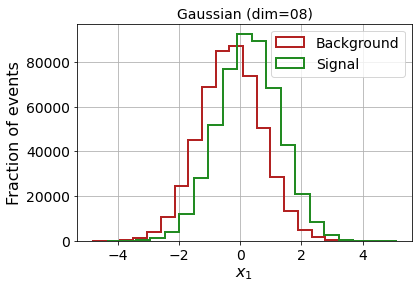

/home/perez/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y

[0]	validation_0-logloss:0.67084	validation_1-logloss:0.67117
[1]	validation_0-logloss:0.65076	validation_1-logloss:0.65134
[2]	validation_0-logloss:0.63312	validation_1-logloss:0.63392
[3]	validation_0-logloss:0.61750	validation_1-logloss:0.61850
[4]	validation_0-logloss:0.60343	validation_1-logloss:0.60466
[5]	validation_0-logloss:0.59077	validation_1-logloss:0.59217
[6]	validation_0-logloss:0.57931	validation_1-logloss:0.58086
[7]	validation_0-logloss:0.56893	validation_1-logloss:0.57066
[8]	validation_0-logloss:0.55940	validation_1-logloss:0.56129
[9]	validation_0-logloss:0.55082	validation_1-logloss:0.55283
[10]	validation_0-logloss:0.54282	validation_1-logloss:0.54499
[11]	validation_0-logloss:0.53561	validation_1-logloss:0.53786
[12]	validation_0-logloss:0.52890	validation_1-logloss:0.53129
[13]	validation_0-logloss:0.52269	validation_1-logloss:0.52518
[14]	validation_0-logloss:0.51703	validation_1-logloss:0.51962
[15]	validation_0-logloss:0.51176	validation_1-logloss:0.51446
[1

[130]	validation_0-logloss:0.42295	validation_1-logloss:0.42987
[131]	validation_0-logloss:0.42290	validation_1-logloss:0.42984
[132]	validation_0-logloss:0.42286	validation_1-logloss:0.42982
[133]	validation_0-logloss:0.42282	validation_1-logloss:0.42980
[134]	validation_0-logloss:0.42278	validation_1-logloss:0.42978
[135]	validation_0-logloss:0.42275	validation_1-logloss:0.42977
[136]	validation_0-logloss:0.42270	validation_1-logloss:0.42975
[137]	validation_0-logloss:0.42268	validation_1-logloss:0.42973
[138]	validation_0-logloss:0.42264	validation_1-logloss:0.42972
[139]	validation_0-logloss:0.42261	validation_1-logloss:0.42971
[140]	validation_0-logloss:0.42258	validation_1-logloss:0.42969
[141]	validation_0-logloss:0.42254	validation_1-logloss:0.42968
[142]	validation_0-logloss:0.42250	validation_1-logloss:0.42966
[143]	validation_0-logloss:0.42247	validation_1-logloss:0.42965
[144]	validation_0-logloss:0.42245	validation_1-logloss:0.42964
[145]	validation_0-logloss:0.42243	valid

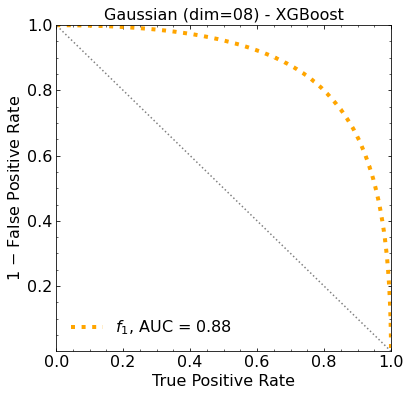

Classification score:


Substituting symbol N from STIXNonUnicode
Substituting symbol N from STIXNonUnicode


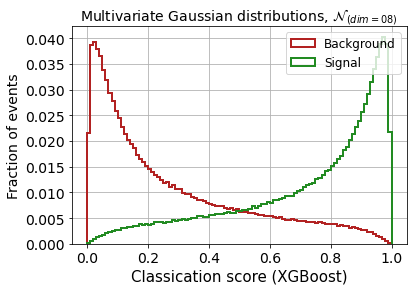

Classification score interpolation:


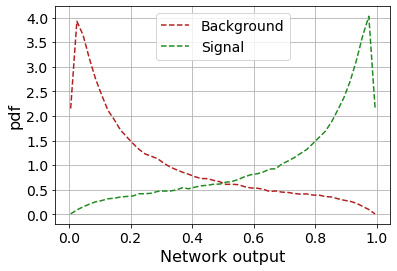


 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 10 bins:  6.082708826106731

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 25 bins:  6.852141104088482

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 50 bins:  7.120698404568124

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 100 bins:  7.2966514269434795

 ----------------------------------------- 

TRUE PDF LIKELIHOOD (GAUSSIANS):
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
n_ensembles (initial):  10000

 If  10100  =  1009    then the proposed range has to be extended
n_ensembles (actual):  9233
This may take long...


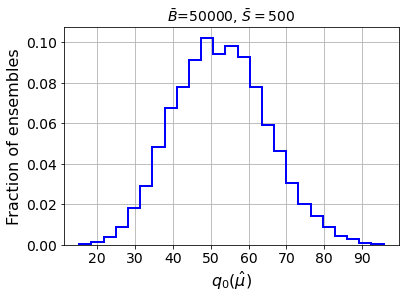

muhat mean:  0.07451532546301311
median q_muhat:  52.37757665999334
Z_gaussian:  7.2372354293606715

 ------------------------------------ 

 MLL + KDE 


/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:788: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,


Background:  KernelDensity(algorithm='auto', atol=0, bandwidth=0.004832930238571752,
              breadth_first=True, kernel='epanechnikov', leaf_size=40,
              metric='euclidean', metric_params=None, rtol=0)


/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:788: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,


Signal:  KernelDensity(algorithm='auto', atol=0, bandwidth=0.004832930238571752,
              breadth_first=True, kernel='epanechnikov', leaf_size=40,
              metric='euclidean', metric_params=None, rtol=0)


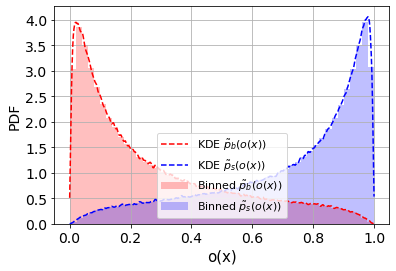

Z_KDE_bins :  7.306819426029539


B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
n_ensembles (initial):  10000

 If  10100  =  1009    then the proposed range has to be extended
n_ensembles (actual):  9233

 This may take long... 



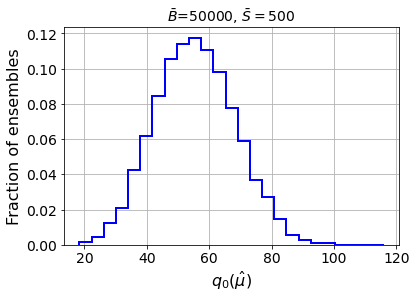

muhat mean:  0.05570237192678436
median q_muhat:  55.191138660047386
Z_KDE:  7.429073876335286
Z_KDE mu=0:  7.435206359555438

 -------------------------------- 

Working points, counting over 1 bin:
S_expected =  500
WP: 0     S/B**0.5=  2.23606797749979
WP:  0.25     S/B**0.5=  3.213715665052712
WP:  0.5     S/B**0.5=  4.002211370397196
WP:  0.75     S/B**0.5=  4.889274250670809
------------------------


In [20]:
dim=8

#######################
# generate the events #
#######################
    
background_X_1 = np.random.normal(-epsilon,1,N)
background_X_2 = np.random.normal(-epsilon,1,N)
background_X_3 = np.random.normal(-epsilon,1,N)
background_X_4 = np.random.normal(-epsilon,1,N)
background_X_5 = np.random.normal(-epsilon,1,N)
background_X_6 = np.random.normal(-epsilon,1,N)
background_X_7 = np.random.normal(-epsilon,1,N)
background_X_8 = np.random.normal(-epsilon,1,N)
    
signal_X_1 = np.random.normal(epsilon,1,N)
signal_X_2 = np.random.normal(epsilon,1,N)
signal_X_3 = np.random.normal(epsilon,1,N)
signal_X_4 = np.random.normal(epsilon,1,N)
signal_X_5 = np.random.normal(epsilon,1,N)
signal_X_6 = np.random.normal(epsilon,1,N)
signal_X_7 = np.random.normal(epsilon,1,N)
signal_X_8 = np.random.normal(epsilon,1,N)

dim1 = np.concatenate((background_X_1,signal_X_1))
dim2 = np.concatenate((background_X_2,signal_X_2))
dim3 = np.concatenate((background_X_3,signal_X_3))
dim4 = np.concatenate((background_X_4,signal_X_4))
dim5 = np.concatenate((background_X_5,signal_X_5))
dim6 = np.concatenate((background_X_6,signal_X_6))
dim7 = np.concatenate((background_X_7,signal_X_7))
dim8 = np.concatenate((background_X_8,signal_X_8))

# labels
background_Y = np.zeros(N)
signal_Y = np.ones(N)

# DATA in a single matrix (features + labels)
df = pd.DataFrame()
df['dim1'] = dim1.reshape(-1)
df['dim2'] = dim2.reshape(-1)
df['dim3'] = dim3.reshape(-1)
df['dim4'] = dim4.reshape(-1)
df['dim5'] = dim5.reshape(-1)
df['dim6'] = dim6.reshape(-1)
df['dim7'] = dim7.reshape(-1)
df['dim8'] = dim8.reshape(-1)
df['Y'] = np.concatenate((background_Y.astype('int'),signal_Y.astype('int')))

X_gauss = df[['dim1','dim2','dim3','dim4','dim5','dim6','dim7','dim8']].values 
Y_gauss = df[['Y']].values

X_gauss_train, X_gauss_val, Y_gauss_train, Y_gauss_val = train_test_split(X_gauss, Y_gauss, test_size=0.5)


print(X_gauss_train.shape)
print(Y_gauss_train.shape)
print(X_gauss_val.shape)
print(Y_gauss_val.shape)


# PLOT (only 1st feature) to visualize the data
X_gauss_val_SM = []
X_gauss_val_NP = []

for i in range(len(Y_gauss_val)):
    if Y_gauss_val[i] ==0:
        X_gauss_val_SM.append(X_gauss_val[i].tolist())
    else:
        X_gauss_val_NP.append(X_gauss_val[i].tolist())    


X_gauss_val_SM = np.array(X_gauss_val_SM)
X_gauss_val_NP = np.array(X_gauss_val_NP)


weights = np.ones_like(X_gauss_val_SM[:,0])/float(len(X_gauss_val_SM[:,0]))
plt.hist(X_gauss_val_SM[:,0], 20, histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(X_gauss_val_NP[:,0])/float(len(X_gauss_val_NP[:,0]))
plt.hist(X_gauss_val_NP[:,0], 20, histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$x_1$",fontsize=16)
plt.ylabel("Fraction of events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.title(r"Gaussian (dim=%0.2d)" % dim,fontsize=14)
plt.show()  




#######################
# CLASSIFIER: XGBoost #
#######################

# CLASSIFIER
classifier = XGBClassifier(
    n_estimators=500,
    learning_rate=0.1,
    reg_lambda=0.0,reg_alpha=0.0,
    gamma=0.0,objective='binary:logistic',
    max_depth=5)

# FIT
classifier.fit(X_gauss_train,Y_gauss_train,eval_set=[(X_gauss_train, Y_gauss_train), (X_gauss_val, Y_gauss_val)],
        eval_metric='logloss',early_stopping_rounds=50,#early stopping
        verbose=True)

# PREDICTIONS
y_pred_xg = classifier.predict_proba(X_gauss_val).T[1]


# ROC
fpr_gauss_xg, tpr_gauss_xg, _ = roc_curve(Y_gauss_val, y_pred_xg)
roc_auc_xg = auc(fpr_gauss_xg, tpr_gauss_xg)

store_AUC.append(roc_auc_xg)


# PLOT THE ROC WITH AUC
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax0.minorticks_on()


plt.plot(tpr_gauss_xg,1-fpr_gauss_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
plt.plot([1,0],[0,1],ls=":",color="grey")
plt.xlabel("True Positive Rate",fontsize=16)
plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
plt.legend()
plt.title(r"Gaussian (dim=%0.2d) - XGBoost" % dim,fontsize=16)
plt.xlim([0,1])
plt.ylim([0,1])
plt.yticks([0.2,0.4,0.6,0.8,1.])
plt.legend(frameon=False,fontsize=16)
plt.show()




########################
# CLASSIFICATION SCORE #
########################

# Outputs for validation data set

pred_XG_SM = []
pred_XG_NP = []

for i in range(len(Y_gauss_val)):
    if Y_gauss_val[i] == 0:
        pred_XG_SM.append(y_pred_xg[i])
    else:
        pred_XG_NP.append(y_pred_xg[i])
        
        
print('Classification score:')
        
weights = np.ones_like(pred_XG_SM)/float(len(pred_XG_SM))
nSM, binsSM, patchesSM = plt.hist(pred_XG_SM, 100, weights=weights, range=[0,1], histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(pred_XG_NP)/float(len(pred_XG_NP))
nNP, binsNP, patchesNP = plt.hist(pred_XG_NP, 100, weights=weights, range=[0,1], histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Classication score (XGBoost)",fontsize=15)
plt.ylabel("Fraction of events",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
plt.title('Multivariate Gaussian distributions, $\mathcal{N}_{(dim=%0.2d)}$' % dim, fontsize=14)
plt.show()





# INTERPOLATE TO USE AS p_s(x) and p_b(x) ESTIMATES

# center of each bin

binsSM_mid = []
binsNP_mid = []

for i in range(len(binsSM)-1):
    binsSM_mid.append( ((binsSM[i+1]-binsSM[i])/2)+binsSM[i] )
    
for i in range(len(binsNP)-1):
    binsNP_mid.append( ((binsNP[i+1]-binsNP[i])/2)+binsNP[i] )
    

# get the width of each bin
bin_width_SM = binsSM[1] - binsSM[0]
bin_width_NP = binsNP[1] - binsNP[0]
   
    
# Interpolation, cubic
fcubic_XG_SM = interp1d(binsSM_mid, nSM, kind='cubic')
fcubic_XG_NP = interp1d(binsNP_mid, nNP, kind='cubic')


# Normalize

def fcubic_XG_SM_norm(x):
    return fcubic_XG_SM(x)/bin_width_SM

def fcubic_XG_NP_norm(x):
    return fcubic_XG_NP(x)/bin_width_NP


print('Classification score interpolation:')
# x to plot
xnew_XG_SM = np.linspace(min(binsSM_mid), max(binsSM_mid), num=50, endpoint=True)
xnew_XG_NP = np.linspace(min(binsNP_mid), max(binsNP_mid), num=50, endpoint=True)

plt.plot(xnew_XG_SM, fcubic_XG_SM_norm(xnew_XG_SM), '--', color='firebrick', label='Background')
plt.plot(xnew_XG_NP, fcubic_XG_NP_norm(xnew_XG_NP), '--', color='forestgreen', label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Network output",fontsize=16)
plt.ylabel("pdf",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()

print('\n ----------------------------------------- \n')








##################################################
# CLASSIFIER OUTPUT BINNED POISON LOG-LIKELIHOOD #
##################################################

# 10 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(10), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(10), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_10bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_10bins.append(Z_bins_XG_10bins)

print('Z_XG 10 bins: ', Z_bins_XG_10bins)
print('\n ----------------------------------------- \n')




##############################

# 25 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(25), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(25), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_25bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_25bins.append(Z_bins_XG_25bins)

print('Z_XG 25 bins: ', Z_bins_XG_25bins)
print('\n ----------------------------------------- \n')




##############################

# 50 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(50), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(50), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_50bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_50bins.append(Z_bins_XG_50bins)

print('Z_XG 50 bins: ', Z_bins_XG_50bins)
print('\n ----------------------------------------- \n')




##############################

# 100 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(100), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(100), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_100bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_100bins.append(Z_bins_XG_100bins)

print('Z_XG 100 bins: ', Z_bins_XG_100bins)
print('\n ----------------------------------------- \n')








###################################
# TRUE PDF LIKELIHOOD (GAUSSIANS) #
###################################

print('TRUE PDF LIKELIHOOD (GAUSSIANS):')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print('S/$\sqrt{B}$: ', SsqrtB)
print('n_ensembles (initial): ', n_ensembles)


# to construct ensembles B and S events are taken from Poisson distributions
mu = S_expected + B_expected


# Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

# around the mean its populated so let's try (proposed range to be checked)
list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
to_check = len(list_events_per_ensembles)

# I want at least one ensemble populated
list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



# Remove from the list the elements without at least 1 ensemble possible
for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] > 1:
        list_events_per_ensembles = list_events_per_ensembles[i:]
        list_nums_ensembles = list_nums_ensembles[i:]
        break


for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] < 1:
        list_events_per_ensembles = list_events_per_ensembles[:i]
        list_nums_ensembles = list_nums_ensembles[:i]
        break

print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

print('n_ensembles (actual): ', sum(list_nums_ensembles))



# lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

p_berno = S_expected/(S_expected+B_expected)

list_S_per_ensembles = []
list_B_per_ensembles = []

for jj in range(len(list_events_per_ensembles)):
    list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
    list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

######
# NOW I HAVE 4 LISTS:
# list_events_per_ensembles     list with the number of events per ensemble (its a range)
# list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
# list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
# list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
######



print('This may take long...')


#############################
# NOW LETS APPLY THE METHOD #
#############################
muhat_selected_list = []
q_muhat = []

for bb in range(len(list_nums_ensembles)):

    for kk in range(list_nums_ensembles[bb]):

#         # SIGNAL events in an ensemble
#         NP_shuf = shuffle(X_gauss_val_NP)[:list_S_per_ensembles[bb]]

#         prob_NP_given_B = [] # p_b(S_ensemble)
#         prob_NP_given_S = [] # p_s(S_ensemble)

#         for ll in range(len(NP_shuf)):
#             prob_NP_given_S.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (NP_shuf[ll,0]-epsilon)**2 + (NP_shuf[ll,1]-epsilon)**2 + (NP_shuf[ll,2]-epsilon)**2 + (NP_shuf[ll,3]-epsilon)**2 + (NP_shuf[ll,4]-epsilon)**2 + (NP_shuf[ll,5]-epsilon)**2 + (NP_shuf[ll,6]-epsilon)**2 + (NP_shuf[ll,7]-epsilon)**2 ) ) )
#             prob_NP_given_B.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (NP_shuf[ll,0]+epsilon)**2 + (NP_shuf[ll,1]+epsilon)**2 + (NP_shuf[ll,2]+epsilon)**2 + (NP_shuf[ll,3]+epsilon)**2 + (NP_shuf[ll,4]+epsilon)**2 + (NP_shuf[ll,5]+epsilon)**2 + (NP_shuf[ll,6]+epsilon)**2 + (NP_shuf[ll,7]+epsilon)**2 ) ) )


        # BACKGROUND events in an ensemble
        SM_shuf = shuffle(X_gauss_val_SM)[:list_B_per_ensembles[bb]]

        prob_SM_given_B = [] # p_b(B_ensemble)
        prob_SM_given_S = [] # p_s(B_ensemble)

        for ll in range(len(SM_shuf)):
            prob_SM_given_S.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (SM_shuf[ll,0]-epsilon)**2 + (SM_shuf[ll,1]-epsilon)**2 + (SM_shuf[ll,2]-epsilon)**2 + (SM_shuf[ll,3]-epsilon)**2 + (SM_shuf[ll,4]-epsilon)**2 + (SM_shuf[ll,5]-epsilon)**2 + (SM_shuf[ll,6]-epsilon)**2 + (SM_shuf[ll,7]-epsilon)**2 ) ) )
            prob_SM_given_B.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (SM_shuf[ll,0]+epsilon)**2 + (SM_shuf[ll,1]+epsilon)**2 + (SM_shuf[ll,2]+epsilon)**2 + (SM_shuf[ll,3]+epsilon)**2 + (SM_shuf[ll,4]+epsilon)**2 + (SM_shuf[ll,5]+epsilon)**2 + (SM_shuf[ll,6]+epsilon)**2 + (SM_shuf[ll,7]+epsilon)**2 ) ) )


        # p_b(x_ensemble) =    concatenate: p_b(B_ensemble) and p_b(S_ensemble)
        prob_x_given_B = prob_SM_given_B #+ prob_NP_given_B

        # p_s(x_ensemble) =    concatenate: p_s(B_ensemble) and p_s(S_ensemble)
        prob_x_given_S = prob_SM_given_S #+ prob_NP_given_S




        # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
        # WE NEED TO ESTIMATE mu_hat for this particular ensemble
        # we are going to obtain a mu_hat with a grid of values for this particular ensemble



        mu_hat_condition_equal_1 = []

        # grid, mu_hat is around 1
        muhat_test = np.arange(0., 1.5, 0.1).tolist()

        B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

        for vv in range(len(muhat_test)):

            mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



        muhat_selected = 0.01

        # from the grid, select the mu_hat such that the condition is equal to 1
        if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 > 0:
                    muhat_selected = muhat_test[ll]
                    break


        if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 < 0:
                    muhat_selected = muhat_test[ll]
                    break


        muhat_selected_list.append(muhat_selected)



        # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
        # and append it (we need the median over lots of ensembles)
        q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (muhat_selected*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )  ) )



# Histogram of q_muhats

weights = np.ones_like(q_muhat)/float(len(q_muhat))
nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
plt.ylabel("Fraction of ensembles",fontsize=16)
plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected),fontsize=14)
plt.grid()
plt.show()


# Finally calculate muhat_mean and Z_gaussian
muhat_mean_gaussian = np.mean(muhat_selected_list)
store_muhat_mean_gaussian.append(muhat_mean_gaussian)

# Remove nan if any
q_muhat = [x for x in q_muhat if x == x]

q_muhat_median = np.median(q_muhat)

Z_gaussian = abs(q_muhat_median)**0.5
store_Z_gaussian.append(Z_gaussian)

print('muhat mean: ', muhat_mean_gaussian)
print('median q_muhat: ', q_muhat_median)
print('Z_gaussian: ', Z_gaussian)


print('\n ------------------------------------ \n')


    
    
    


    
#########
#  KDE  #
#########  

print(' MLL + KDE ')

# FIND THE BANDWIDTH

bandwidth = np.logspace(-4.0, 0, 20)

kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_SM[:50000]])
print('Background: ', grid.best_estimator_)

SM_bandwidth = grid.best_estimator_.bandwidth



kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_NP[:50000]])
print('Signal: ', grid.best_estimator_)

NP_bandwidth = grid.best_estimator_.bandwidth




# with each calculated bandwidth estimate the pdf with KDE to the classifier output (for background and signal)
# notice: epanechnikov kernel
kde_bkg = KernelDensity(kernel='epanechnikov', bandwidth=SM_bandwidth).fit(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ])
kde_sig = KernelDensity(kernel='epanechnikov', bandwidth=NP_bandwidth).fit(np.c_[pred_XG_NP, np.ones(len(pred_XG_NP)) ])


# range (~between 0 and 1)
min_val = np.min([np.min(pred_XG_SM),np.min(pred_XG_NP)])
max_val = np.max([np.max(pred_XG_SM),np.max(pred_XG_NP)])

s_vals = np.linspace(min_val,max_val,1000)





# evaluate the densities for each value of s (~bins)
dens_bkg = np.exp(kde_bkg.score_samples(np.c_[s_vals, np.zeros(len(s_vals)) ]) )
dens_sig = np.exp(kde_sig.score_samples(np.c_[s_vals, np.ones(len(s_vals)) ]) )





# Normalize to 1
# Area
factor_aux_SM = sum(dens_bkg*(s_vals[1]-s_vals[0]))
factor_aux_NP = sum(dens_sig*(s_vals[1]-s_vals[0]))

# normalize
dens_bkg = dens_bkg / factor_aux_SM
dens_sig = dens_sig / factor_aux_NP







# plot to check the estimation

plt.figure()

plt.hist(pred_XG_SM,density=True,bins=50,color='red',alpha=0.25,label=r'Binned $\tilde{p}_{b}(o(x))$');
plt.plot(s_vals,dens_bkg,color='red',label=r'KDE $\tilde{p}_{b}(o(x))$',linestyle='dashed');

plt.hist(pred_XG_NP,density=True,bins=50,color='blue',alpha=0.25,label=r'Binned $\tilde{p}_{s}(o(x))$');
plt.plot(s_vals,dens_sig,color='blue',label=r'KDE $\tilde{p}_{s}(o(x))$',linestyle='dashed');

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("o(x)",fontsize=15)
plt.ylabel("PDF",fontsize=14)
plt.grid()
plt.legend(loc="lower center", fontsize=11, handlelength=2.5)
#plt.title(r'Multivariate Gaussian distributions, $\mathcal{N}_{dim}$', fontsize=14)
#plt.savefig('images/' + 'Ndimgaussian-output.pdf', format="pdf", bbox_inches="tight")
plt.show()





# We can do a quick Z bin-loglikelihood calculation using the computed KDE
# this is to check the KDE here, because we use KDE to avoid binning


# B events in each bin: 
# total number of B * B_pdf value in each bin * bin size
Bd = B_expected*dens_bkg*(s_vals[1]-s_vals[0])


# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
Bd_noceros = []
for i in range(len(Bd)):
    if Bd[i]!=0:
        Bd_noceros.append(Bd[i])

min_back = min(Bd_noceros)

# replace the zeros
for i in range(len(Bd)):
    if Bd[i]==0:
        Bd[i] = min_back


# S events in each bin: 
# value of S/sqrt{B} * sqrt{B} * S_pdf value in each bin * bin size
Sd = SsqrtB*np.sqrt(B_expected)*dens_sig*(s_vals[1]-s_vals[0])


# Z value:
#Z_KDE_bins = np.sqrt(2.0*np.sum(((Sd+Bd)*np.log(1.0+Sd/Bd)-Sd))) # Discovery
Z_KDE_bins = np.sqrt(2.0*np.sum(Bd*np.log(Bd/(Sd+Bd))+Sd)) # Exclusion

store_Z_KDE_bins.append(Z_KDE_bins)

print('Z_KDE_bins : ', Z_KDE_bins)



    
    
    
#############
# MLL + KDE #
#############
    
# FOR EXCLUSION:
# we need to evaluate the KDE densities with the classifier output of BACKGROUND EVENTS

# FOR DISCOVERY:
# we need to evaluate the KDE densities with the classifier output of BACKGROUND and SIGNAL EVENTS

KDE_SM_pred_SM = np.exp(kde_bkg.score_samples(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ]) )
KDE_NP_pred_SM = np.exp(kde_sig.score_samples(np.c_[pred_XG_SM, np.ones(len(pred_XG_SM)) ]) )


# Normalize

KDE_SM_pred_SM = KDE_SM_pred_SM / factor_aux_SM
KDE_NP_pred_SM = KDE_NP_pred_SM / factor_aux_NP




indices = [i for i in range(len(KDE_NP_pred_SM))]


# the first part is the same as before, but we repeat it, it is not the expensive part

print('\n')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)
print('n_ensembles (initial): ', n_ensembles)


# to construct ensembles B and S events are taken from Poisson distributions
mu = S_expected + B_expected


# Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

# around the mean its populated so let's try (proposed range to be checked)
list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
to_check = len(list_events_per_ensembles)

# I want at least one ensemble populated
list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



# Remove from the list the elements without at least 1 ensemble possible
for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] > 1:
        list_events_per_ensembles = list_events_per_ensembles[i:]
        list_nums_ensembles = list_nums_ensembles[i:]
        break


for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] < 1:
        list_events_per_ensembles = list_events_per_ensembles[:i]
        list_nums_ensembles = list_nums_ensembles[:i]
        break

print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

print('n_ensembles (actual): ', sum(list_nums_ensembles))



# lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

p_berno = S_expected/(S_expected+B_expected)

list_S_per_ensembles = []
list_B_per_ensembles = []

for jj in range(len(list_events_per_ensembles)):
    list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
    list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

######
# NOW I HAVE 4 LISTS:
# list_events_per_ensembles     list with the number of events per ensemble (its a range)
# list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
# list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
# list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
######



print('\n This may take long... \n')


# NOW LETS APPLY THE METHOD

muhat_selected_list = []
q_muhat = []
q_muhat_mu0 = []

for bb in range(len(list_nums_ensembles)):

    for kk in range(list_nums_ensembles[bb]):

        # KDE
        ran_ind = np.random.choice(indices, list_B_per_ensembles[bb])

        KDE_SM_pred_SM_shuf = []
        KDE_NP_pred_SM_shuf = []

        for i in ran_ind:
            KDE_SM_pred_SM_shuf.append(KDE_SM_pred_SM[i])
            KDE_NP_pred_SM_shuf.append(KDE_NP_pred_SM[i])

        KDE_SM_pred_SM_shuf  = np.array(KDE_SM_pred_SM_shuf)
        KDE_NP_pred_SM_shuf  = np.array(KDE_NP_pred_SM_shuf)



        # p_b(o(x_ensemble)) =    concatenate: p_b(o(B_ensemble)) and p_b(o(S_ensemble))  NOTICE THE o(x)
        prob_x_given_B = np.ndarray.tolist( KDE_SM_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_SM_pred_NP_shuf )

        # p_s(o(x_ensemble)) =    concatenate: p_s(o(B_ensemble)) and p_s(o(S_ensemble))  NOTICE THE o(x)
        prob_x_given_S = np.ndarray.tolist( KDE_NP_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_NP_pred_NP_shuf )





        # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
        # WE NEED TO ESTIMATE mu_hat for this particular ensemble
        # we are going to obtain a mu_hat with a grid of values for this particular ensemble



        mu_hat_condition_equal_1 = []

        # grid, mu_hat is around 1
        muhat_test = np.arange(0., 1.5, 0.1).tolist()

        B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

        for vv in range(len(muhat_test)):

            mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



        muhat_selected = 0.01

        # from the grid, select the mu_hat such that the condition is equal to 1
        if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 > 0:
                    muhat_selected = muhat_test[ll]
                    break


        if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 < 0:
                    muhat_selected = muhat_test[ll]
                    break


        muhat_selected_list.append(muhat_selected)



        # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
        # and append it (we need the median over lots of ensembles)
        #q_muhat.append( 2 * ( (-1.*muhat_selected * S_expected) + sum( [np.log( 1 + ( (muhat_selected*S_expected/B_expected) * (x / y) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] ) ) )
        # EXCLUSION:
        q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (muhat_selected*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
) )
        q_muhat_mu0.append( 2 * ( ( (1.-0.) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (0.*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
) )


# Histogram of q_muhats

weights = np.ones_like(q_muhat)/float(len(q_muhat))
nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)
#plt.xlim(0,1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
plt.ylabel("Fraction of ensembles",fontsize=16)
plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected),fontsize=14)
plt.grid()
#plt.legend(fontsize=14)
plt.show()


# Finally calculate muhat_mean and Z_gaussian

# Remove nan if any
q_muhat_mu0 = [x for x in q_muhat_mu0 if x == x]

q_muhat_median_mu0 = np.median(q_muhat_mu0)

Z_KDE_mu0 = abs(q_muhat_median_mu0)**0.5
store_Z_MLL_KDE_mu0.append(Z_KDE_mu0)


# Finally calculate muhat_mean and Z_gaussian
muhat_mean_MLL_KDE = np.mean(muhat_selected_list)
store_muhat_mean_MLL_KDE.append(muhat_mean_MLL_KDE)

# Remove nan if any
q_muhat = [x for x in q_muhat if x == x]

q_muhat_median = np.median(q_muhat)

Z_KDE = abs(q_muhat_median)**0.5
store_Z_MLL_KDE.append(Z_KDE)

print('muhat mean: ', muhat_mean_MLL_KDE)
print('median q_muhat: ', q_muhat_median)
print('Z_KDE: ', Z_KDE)
print('Z_KDE mu=0: ', Z_KDE_mu0)

print('\n -------------------------------- \n')
    
    

    
    
    
    
    
    
#######################################
# Working points, counting over 1 bin #
#######################################

print('Working points, counting over 1 bin:')

# BACKGROUND 

# number of background ensembles
B_ensembles = int(len(pred_XG_SM)/B_expected)

# shorten the number of B events so I get an integer number of ensembles
pred_XG_SM_entero = pred_XG_SM[:int(len(pred_XG_SM)/B_expected) * B_expected]

XG_SM_passWP0 = 0
XG_SM_passWP1 = 0
XG_SM_passWP2 = 0

for i in range(len(pred_XG_SM_entero)):
    if pred_XG_SM_entero[i] > WP[0]:
        XG_SM_passWP0 += 1
    if pred_XG_SM_entero[i] > WP[1]:
        XG_SM_passWP1 += 1
    if pred_XG_SM_entero[i] > WP[2]:
        XG_SM_passWP2 += 1



# SIGNAL

# number of signal ensembles
S_ensembles = int(len(pred_XG_NP)/S_expected)

# shorten the number of S events so I get an integer number of ensembles
pred_XG_NP_entero = pred_XG_NP[:int(len(pred_XG_NP)/S_expected) * S_expected]

XG_NP_passWP0 = 0
XG_NP_passWP1 = 0
XG_NP_passWP2 = 0

for i in range(len(pred_XG_NP_entero)):
    if pred_XG_NP_entero[i] > WP[0]:
        XG_NP_passWP0 += 1
    if pred_XG_NP_entero[i] > WP[1]:
        XG_NP_passWP1 += 1
    if pred_XG_NP_entero[i] > WP[2]:
        XG_NP_passWP2 += 1

Z_WP0 = ( XG_NP_passWP0 / S_ensembles ) / ( XG_SM_passWP0 / B_ensembles )**0.5
Z_WP1 = ( XG_NP_passWP1 / S_ensembles ) / ( XG_SM_passWP1 / B_ensembles )**0.5
Z_WP2 = ( XG_NP_passWP2 / S_ensembles ) / ( XG_SM_passWP2 / B_ensembles )**0.5


# save the results Z_binned after WP
SrootB_WP0.append( Z_WP0 )
SrootB_WP1.append( Z_WP1 )
SrootB_WP2.append( Z_WP2 )

print('S_expected = ', S_expected)
print('WP: 0     S/B**0.5= ', S_expected/(B_expected)**0.5)
print('WP: ', WP[0], '    S/B**0.5= ', Z_WP0 )
print('WP: ', WP[1], '    S/B**0.5= ', Z_WP1 )
print('WP: ', WP[2], '    S/B**0.5= ', Z_WP2 )
print('------------------------')

In [21]:
print('dim = ', dim)

print(roc_auc_xg)

print(Z_bins_XG_10bins)
print(Z_bins_XG_25bins)
print(Z_bins_XG_50bins)
print(Z_bins_XG_100bins)

print(muhat_mean_gaussian)
print(Z_gaussian)

print(muhat_mean_MLL_KDE)
print(Z_KDE_bins)
print(Z_KDE)
print(Z_KDE_mu0)

print(Z_WP0)
print(Z_WP1)
print(Z_WP2)

dim =  8
0.8828918621468724
6.082708826106731
6.852141104088482
7.120698404568124
7.2966514269434795
0.07451532546301311
7.2372354293606715
0.05570237192678436
7.306819426029539
7.429073876335286
7.435206359555438
3.213715665052712
4.002211370397196
4.889274250670809


In [ ]:
# To use if you dont want to run everything again. Store the previous results
store_AUC.append()

store_Z_bins_XG_10bins.append()
store_Z_bins_XG_25bins.append()
store_Z_bins_XG_50bins.append()
store_Z_bins_XG_100bins.append()

store_muhat_mean_gaussian.append()
store_Z_gaussian.append()

store_muhat_mean_MLL_KDE.append()
store_Z_KDE_bins.append()
store_Z_MLL_KDE.append()
store_Z_MLL_KDE_mu0.append()

SrootB_WP0.append()
SrootB_WP1.append()
SrootB_WP2.append()

## Dim=9

(1000000, 9)
(1000000, 1)
(1000000, 9)
(1000000, 1)


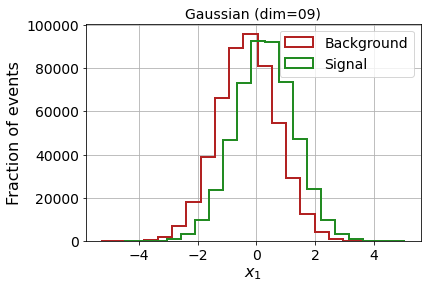

/home/perez/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y

[0]	validation_0-logloss:0.67066	validation_1-logloss:0.67104
[1]	validation_0-logloss:0.65014	validation_1-logloss:0.65064
[2]	validation_0-logloss:0.63216	validation_1-logloss:0.63286
[3]	validation_0-logloss:0.61597	validation_1-logloss:0.61682
[4]	validation_0-logloss:0.60143	validation_1-logloss:0.60245
[5]	validation_0-logloss:0.58829	validation_1-logloss:0.58950
[6]	validation_0-logloss:0.57622	validation_1-logloss:0.57754
[7]	validation_0-logloss:0.56523	validation_1-logloss:0.56672
[8]	validation_0-logloss:0.55524	validation_1-logloss:0.55682
[9]	validation_0-logloss:0.54606	validation_1-logloss:0.54773
[10]	validation_0-logloss:0.53755	validation_1-logloss:0.53934
[11]	validation_0-logloss:0.52976	validation_1-logloss:0.53164
[12]	validation_0-logloss:0.52253	validation_1-logloss:0.52450
[13]	validation_0-logloss:0.51578	validation_1-logloss:0.51788
[14]	validation_0-logloss:0.50958	validation_1-logloss:0.51177
[15]	validation_0-logloss:0.50378	validation_1-logloss:0.50610
[1

[130]	validation_0-logloss:0.39929	validation_1-logloss:0.40583
[131]	validation_0-logloss:0.39924	validation_1-logloss:0.40580
[132]	validation_0-logloss:0.39918	validation_1-logloss:0.40576
[133]	validation_0-logloss:0.39912	validation_1-logloss:0.40573
[134]	validation_0-logloss:0.39907	validation_1-logloss:0.40570
[135]	validation_0-logloss:0.39902	validation_1-logloss:0.40566
[136]	validation_0-logloss:0.39897	validation_1-logloss:0.40563
[137]	validation_0-logloss:0.39892	validation_1-logloss:0.40560
[138]	validation_0-logloss:0.39887	validation_1-logloss:0.40557
[139]	validation_0-logloss:0.39883	validation_1-logloss:0.40555
[140]	validation_0-logloss:0.39878	validation_1-logloss:0.40552
[141]	validation_0-logloss:0.39873	validation_1-logloss:0.40549
[142]	validation_0-logloss:0.39869	validation_1-logloss:0.40547
[143]	validation_0-logloss:0.39864	validation_1-logloss:0.40544
[144]	validation_0-logloss:0.39860	validation_1-logloss:0.40542
[145]	validation_0-logloss:0.39856	valid

[259]	validation_0-logloss:0.39637	validation_1-logloss:0.40490
[260]	validation_0-logloss:0.39636	validation_1-logloss:0.40490
[261]	validation_0-logloss:0.39634	validation_1-logloss:0.40490
[262]	validation_0-logloss:0.39633	validation_1-logloss:0.40490
[263]	validation_0-logloss:0.39633	validation_1-logloss:0.40490
[264]	validation_0-logloss:0.39632	validation_1-logloss:0.40490
[265]	validation_0-logloss:0.39631	validation_1-logloss:0.40490
[266]	validation_0-logloss:0.39631	validation_1-logloss:0.40490
[267]	validation_0-logloss:0.39631	validation_1-logloss:0.40490
[268]	validation_0-logloss:0.39629	validation_1-logloss:0.40491
[269]	validation_0-logloss:0.39628	validation_1-logloss:0.40490
[270]	validation_0-logloss:0.39627	validation_1-logloss:0.40491
[271]	validation_0-logloss:0.39625	validation_1-logloss:0.40491
[272]	validation_0-logloss:0.39624	validation_1-logloss:0.40490
[273]	validation_0-logloss:0.39623	validation_1-logloss:0.40491
[274]	validation_0-logloss:0.39623	valid

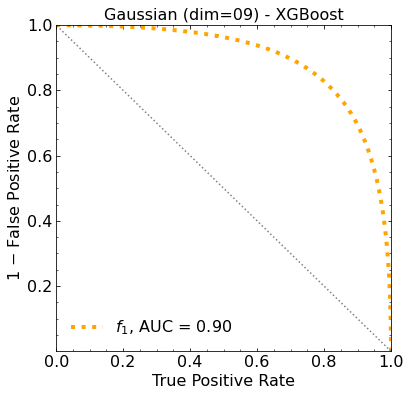

Classification score:


Substituting symbol N from STIXNonUnicode
Substituting symbol N from STIXNonUnicode


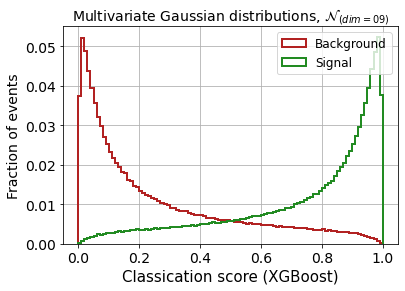

Classification score interpolation:


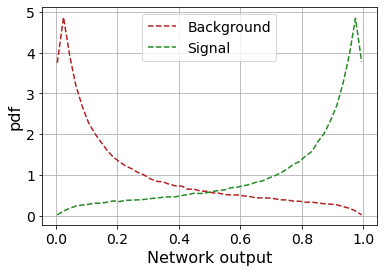


 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 10 bins:  6.548693759173448

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 25 bins:  7.469689773205326

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 50 bins:  7.859451687609371

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 100 bins:  8.038566021694608

 ----------------------------------------- 

TRUE PDF LIKELIHOOD (GAUSSIANS):
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
n_ensembles (initial):  10000

 If  10100  =  1009    then the proposed range has to be extended
n_ensembles (actual):  9233
This may take long...


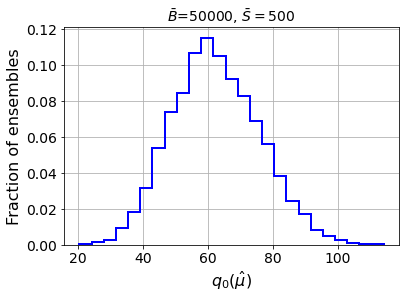

muhat mean:  0.08629914437344308
median q_muhat:  61.7139913231656
Z_gaussian:  7.855825311395717

 ------------------------------------ 

 MLL + KDE 


/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:788: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,


Background:  KernelDensity(algorithm='auto', atol=0, bandwidth=0.004832930238571752,
              breadth_first=True, kernel='epanechnikov', leaf_size=40,
              metric='euclidean', metric_params=None, rtol=0)


/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:788: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,


Signal:  KernelDensity(algorithm='auto', atol=0, bandwidth=0.002976351441631319,
              breadth_first=True, kernel='epanechnikov', leaf_size=40,
              metric='euclidean', metric_params=None, rtol=0)


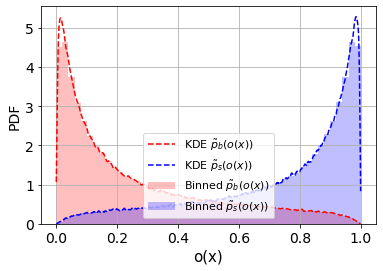

Z_KDE_bins :  8.080892845979282


B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
n_ensembles (initial):  10000

 If  10100  =  1009    then the proposed range has to be extended
n_ensembles (actual):  9233

 This may take long... 



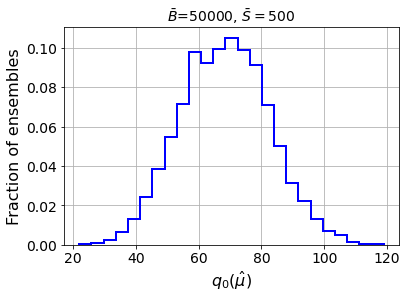

muhat mean:  0.04868406801689592
median q_muhat:  68.43789503504877
Z_KDE:  8.2727199296875
Z_KDE mu=0:  8.275731798854027

 -------------------------------- 

Working points, counting over 1 bin:
S_expected =  500
WP: 0     S/B**0.5=  2.23606797749979
WP:  0.25     S/B**0.5=  3.361761231237201
WP:  0.5     S/B**0.5=  4.2221713585771035
WP:  0.75     S/B**0.5=  5.312247430896109
------------------------


In [22]:
dim=9

#######################
# generate the events #
#######################
    
background_X_1 = np.random.normal(-epsilon,1,N)
background_X_2 = np.random.normal(-epsilon,1,N)
background_X_3 = np.random.normal(-epsilon,1,N)
background_X_4 = np.random.normal(-epsilon,1,N)
background_X_5 = np.random.normal(-epsilon,1,N)
background_X_6 = np.random.normal(-epsilon,1,N)
background_X_7 = np.random.normal(-epsilon,1,N)
background_X_8 = np.random.normal(-epsilon,1,N)
background_X_9 = np.random.normal(-epsilon,1,N)
    
signal_X_1 = np.random.normal(epsilon,1,N)
signal_X_2 = np.random.normal(epsilon,1,N)
signal_X_3 = np.random.normal(epsilon,1,N)
signal_X_4 = np.random.normal(epsilon,1,N)
signal_X_5 = np.random.normal(epsilon,1,N)
signal_X_6 = np.random.normal(epsilon,1,N)
signal_X_7 = np.random.normal(epsilon,1,N)
signal_X_8 = np.random.normal(epsilon,1,N)
signal_X_9 = np.random.normal(epsilon,1,N)

dim1 = np.concatenate((background_X_1,signal_X_1))
dim2 = np.concatenate((background_X_2,signal_X_2))
dim3 = np.concatenate((background_X_3,signal_X_3))
dim4 = np.concatenate((background_X_4,signal_X_4))
dim5 = np.concatenate((background_X_5,signal_X_5))
dim6 = np.concatenate((background_X_6,signal_X_6))
dim7 = np.concatenate((background_X_7,signal_X_7))
dim8 = np.concatenate((background_X_8,signal_X_8))
dim9 = np.concatenate((background_X_9,signal_X_9))

# labels
background_Y = np.zeros(N)
signal_Y = np.ones(N)

# DATA in a single matrix (features + labels)
df = pd.DataFrame()
df['dim1'] = dim1.reshape(-1)
df['dim2'] = dim2.reshape(-1)
df['dim3'] = dim3.reshape(-1)
df['dim4'] = dim4.reshape(-1)
df['dim5'] = dim5.reshape(-1)
df['dim6'] = dim6.reshape(-1)
df['dim7'] = dim7.reshape(-1)
df['dim8'] = dim8.reshape(-1)
df['dim9'] = dim9.reshape(-1)
df['Y'] = np.concatenate((background_Y.astype('int'),signal_Y.astype('int')))

X_gauss = df[['dim1','dim2','dim3','dim4','dim5','dim6','dim7','dim8','dim9']].values 
Y_gauss = df[['Y']].values

X_gauss_train, X_gauss_val, Y_gauss_train, Y_gauss_val = train_test_split(X_gauss, Y_gauss, test_size=0.5)


print(X_gauss_train.shape)
print(Y_gauss_train.shape)
print(X_gauss_val.shape)
print(Y_gauss_val.shape)


# PLOT (only 1st feature) to visualize the data
X_gauss_val_SM = []
X_gauss_val_NP = []

for i in range(len(Y_gauss_val)):
    if Y_gauss_val[i] ==0:
        X_gauss_val_SM.append(X_gauss_val[i].tolist())
    else:
        X_gauss_val_NP.append(X_gauss_val[i].tolist())    


X_gauss_val_SM = np.array(X_gauss_val_SM)
X_gauss_val_NP = np.array(X_gauss_val_NP)


weights = np.ones_like(X_gauss_val_SM[:,0])/float(len(X_gauss_val_SM[:,0]))
plt.hist(X_gauss_val_SM[:,0], 20, histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(X_gauss_val_NP[:,0])/float(len(X_gauss_val_NP[:,0]))
plt.hist(X_gauss_val_NP[:,0], 20, histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$x_1$",fontsize=16)
plt.ylabel("Fraction of events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.title(r"Gaussian (dim=%0.2d)" % dim,fontsize=14)
plt.show()  




#######################
# CLASSIFIER: XGBoost #
#######################

# CLASSIFIER
classifier = XGBClassifier(
    n_estimators=500,
    learning_rate=0.1,
    reg_lambda=0.0,reg_alpha=0.0,
    gamma=0.0,objective='binary:logistic',
    max_depth=5)

# FIT
classifier.fit(X_gauss_train,Y_gauss_train,eval_set=[(X_gauss_train, Y_gauss_train), (X_gauss_val, Y_gauss_val)],
        eval_metric='logloss',early_stopping_rounds=50,#early stopping
        verbose=True)

# PREDICTIONS
y_pred_xg = classifier.predict_proba(X_gauss_val).T[1]


# ROC
fpr_gauss_xg, tpr_gauss_xg, _ = roc_curve(Y_gauss_val, y_pred_xg)
roc_auc_xg = auc(fpr_gauss_xg, tpr_gauss_xg)

store_AUC.append(roc_auc_xg)


# PLOT THE ROC WITH AUC
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax0.minorticks_on()


plt.plot(tpr_gauss_xg,1-fpr_gauss_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
plt.plot([1,0],[0,1],ls=":",color="grey")
plt.xlabel("True Positive Rate",fontsize=16)
plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
plt.legend()
plt.title(r"Gaussian (dim=%0.2d) - XGBoost" % dim,fontsize=16)
plt.xlim([0,1])
plt.ylim([0,1])
plt.yticks([0.2,0.4,0.6,0.8,1.])
plt.legend(frameon=False,fontsize=16)
plt.show()




########################
# CLASSIFICATION SCORE #
########################

# Outputs for validation data set

pred_XG_SM = []
pred_XG_NP = []

for i in range(len(Y_gauss_val)):
    if Y_gauss_val[i] == 0:
        pred_XG_SM.append(y_pred_xg[i])
    else:
        pred_XG_NP.append(y_pred_xg[i])
        
        
print('Classification score:')
        
weights = np.ones_like(pred_XG_SM)/float(len(pred_XG_SM))
nSM, binsSM, patchesSM = plt.hist(pred_XG_SM, 100, weights=weights, range=[0,1], histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(pred_XG_NP)/float(len(pred_XG_NP))
nNP, binsNP, patchesNP = plt.hist(pred_XG_NP, 100, weights=weights, range=[0,1], histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Classication score (XGBoost)",fontsize=15)
plt.ylabel("Fraction of events",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
plt.title('Multivariate Gaussian distributions, $\mathcal{N}_{(dim=%0.2d)}$' % dim, fontsize=14)
plt.show()





# INTERPOLATE TO USE AS p_s(x) and p_b(x) ESTIMATES

# center of each bin

binsSM_mid = []
binsNP_mid = []

for i in range(len(binsSM)-1):
    binsSM_mid.append( ((binsSM[i+1]-binsSM[i])/2)+binsSM[i] )
    
for i in range(len(binsNP)-1):
    binsNP_mid.append( ((binsNP[i+1]-binsNP[i])/2)+binsNP[i] )
    

# get the width of each bin
bin_width_SM = binsSM[1] - binsSM[0]
bin_width_NP = binsNP[1] - binsNP[0]
   
    
# Interpolation, cubic
fcubic_XG_SM = interp1d(binsSM_mid, nSM, kind='cubic')
fcubic_XG_NP = interp1d(binsNP_mid, nNP, kind='cubic')


# Normalize

def fcubic_XG_SM_norm(x):
    return fcubic_XG_SM(x)/bin_width_SM

def fcubic_XG_NP_norm(x):
    return fcubic_XG_NP(x)/bin_width_NP


print('Classification score interpolation:')
# x to plot
xnew_XG_SM = np.linspace(min(binsSM_mid), max(binsSM_mid), num=50, endpoint=True)
xnew_XG_NP = np.linspace(min(binsNP_mid), max(binsNP_mid), num=50, endpoint=True)

plt.plot(xnew_XG_SM, fcubic_XG_SM_norm(xnew_XG_SM), '--', color='firebrick', label='Background')
plt.plot(xnew_XG_NP, fcubic_XG_NP_norm(xnew_XG_NP), '--', color='forestgreen', label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Network output",fontsize=16)
plt.ylabel("pdf",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()

print('\n ----------------------------------------- \n')








##################################################
# CLASSIFIER OUTPUT BINNED POISON LOG-LIKELIHOOD #
##################################################

# 10 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(10), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(10), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_10bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_10bins.append(Z_bins_XG_10bins)

print('Z_XG 10 bins: ', Z_bins_XG_10bins)
print('\n ----------------------------------------- \n')




##############################

# 25 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(25), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(25), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_25bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_25bins.append(Z_bins_XG_25bins)

print('Z_XG 25 bins: ', Z_bins_XG_25bins)
print('\n ----------------------------------------- \n')




##############################

# 50 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(50), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(50), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_50bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_50bins.append(Z_bins_XG_50bins)

print('Z_XG 50 bins: ', Z_bins_XG_50bins)
print('\n ----------------------------------------- \n')




##############################

# 100 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(100), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(100), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_100bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_100bins.append(Z_bins_XG_100bins)

print('Z_XG 100 bins: ', Z_bins_XG_100bins)
print('\n ----------------------------------------- \n')








###################################
# TRUE PDF LIKELIHOOD (GAUSSIANS) #
###################################

print('TRUE PDF LIKELIHOOD (GAUSSIANS):')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print('S/$\sqrt{B}$: ', SsqrtB)
print('n_ensembles (initial): ', n_ensembles)


# to construct ensembles B and S events are taken from Poisson distributions
mu = S_expected + B_expected


# Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

# around the mean its populated so let's try (proposed range to be checked)
list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
to_check = len(list_events_per_ensembles)

# I want at least one ensemble populated
list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



# Remove from the list the elements without at least 1 ensemble possible
for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] > 1:
        list_events_per_ensembles = list_events_per_ensembles[i:]
        list_nums_ensembles = list_nums_ensembles[i:]
        break


for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] < 1:
        list_events_per_ensembles = list_events_per_ensembles[:i]
        list_nums_ensembles = list_nums_ensembles[:i]
        break

print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

print('n_ensembles (actual): ', sum(list_nums_ensembles))



# lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

p_berno = S_expected/(S_expected+B_expected)

list_S_per_ensembles = []
list_B_per_ensembles = []

for jj in range(len(list_events_per_ensembles)):
    list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
    list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

######
# NOW I HAVE 4 LISTS:
# list_events_per_ensembles     list with the number of events per ensemble (its a range)
# list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
# list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
# list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
######



print('This may take long...')


#############################
# NOW LETS APPLY THE METHOD #
#############################
muhat_selected_list = []
q_muhat = []

for bb in range(len(list_nums_ensembles)):

    for kk in range(list_nums_ensembles[bb]):

#         # SIGNAL events in an ensemble
#         NP_shuf = shuffle(X_gauss_val_NP)[:list_S_per_ensembles[bb]]

#         prob_NP_given_B = [] # p_b(S_ensemble)
#         prob_NP_given_S = [] # p_s(S_ensemble)

#         for ll in range(len(NP_shuf)):
#             prob_NP_given_S.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (NP_shuf[ll,0]-epsilon)**2 + (NP_shuf[ll,1]-epsilon)**2 + (NP_shuf[ll,2]-epsilon)**2 + (NP_shuf[ll,3]-epsilon)**2 + (NP_shuf[ll,4]-epsilon)**2 + (NP_shuf[ll,5]-epsilon)**2 + (NP_shuf[ll,6]-epsilon)**2 + (NP_shuf[ll,7]-epsilon)**2 + (NP_shuf[ll,8]-epsilon)**2 ) ) )
#             prob_NP_given_B.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (NP_shuf[ll,0]+epsilon)**2 + (NP_shuf[ll,1]+epsilon)**2 + (NP_shuf[ll,2]+epsilon)**2 + (NP_shuf[ll,3]+epsilon)**2 + (NP_shuf[ll,4]+epsilon)**2 + (NP_shuf[ll,5]+epsilon)**2 + (NP_shuf[ll,6]+epsilon)**2 + (NP_shuf[ll,7]+epsilon)**2 + (NP_shuf[ll,8]+epsilon)**2 ) ) )


        # BACKGROUND events in an ensemble
        SM_shuf = shuffle(X_gauss_val_SM)[:list_B_per_ensembles[bb]]

        prob_SM_given_B = [] # p_b(B_ensemble)
        prob_SM_given_S = [] # p_s(B_ensemble)

        for ll in range(len(SM_shuf)):
            prob_SM_given_S.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (SM_shuf[ll,0]-epsilon)**2 + (SM_shuf[ll,1]-epsilon)**2 + (SM_shuf[ll,2]-epsilon)**2 + (SM_shuf[ll,3]-epsilon)**2 + (SM_shuf[ll,4]-epsilon)**2 + (SM_shuf[ll,5]-epsilon)**2 + (SM_shuf[ll,6]-epsilon)**2 + (SM_shuf[ll,7]-epsilon)**2 + (SM_shuf[ll,8]-epsilon)**2 ) ) )
            prob_SM_given_B.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (SM_shuf[ll,0]+epsilon)**2 + (SM_shuf[ll,1]+epsilon)**2 + (SM_shuf[ll,2]+epsilon)**2 + (SM_shuf[ll,3]+epsilon)**2 + (SM_shuf[ll,4]+epsilon)**2 + (SM_shuf[ll,5]+epsilon)**2 + (SM_shuf[ll,6]+epsilon)**2 + (SM_shuf[ll,7]+epsilon)**2 + (SM_shuf[ll,8]+epsilon)**2 ) ) )


        # p_b(x_ensemble) =    concatenate: p_b(B_ensemble) and p_b(S_ensemble)
        prob_x_given_B = prob_SM_given_B #+ prob_NP_given_B

        # p_s(x_ensemble) =    concatenate: p_s(B_ensemble) and p_s(S_ensemble)
        prob_x_given_S = prob_SM_given_S #+ prob_NP_given_S




        # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
        # WE NEED TO ESTIMATE mu_hat for this particular ensemble
        # we are going to obtain a mu_hat with a grid of values for this particular ensemble



        mu_hat_condition_equal_1 = []

        # grid, mu_hat is around 1
        muhat_test = np.arange(0., 1.5, 0.1).tolist()

        B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

        for vv in range(len(muhat_test)):

            mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



        muhat_selected = 0.01

        # from the grid, select the mu_hat such that the condition is equal to 1
        if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 > 0:
                    muhat_selected = muhat_test[ll]
                    break


        if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 < 0:
                    muhat_selected = muhat_test[ll]
                    break


        muhat_selected_list.append(muhat_selected)



        # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
        # and append it (we need the median over lots of ensembles)
        q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (muhat_selected*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )  ) )



# Histogram of q_muhats

weights = np.ones_like(q_muhat)/float(len(q_muhat))
nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
plt.ylabel("Fraction of ensembles",fontsize=16)
plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected),fontsize=14)
plt.grid()
plt.show()


# Finally calculate muhat_mean and Z_gaussian
muhat_mean_gaussian = np.mean(muhat_selected_list)
store_muhat_mean_gaussian.append(muhat_mean_gaussian)

# Remove nan if any
q_muhat = [x for x in q_muhat if x == x]

q_muhat_median = np.median(q_muhat)

Z_gaussian = abs(q_muhat_median)**0.5
store_Z_gaussian.append(Z_gaussian)

print('muhat mean: ', muhat_mean_gaussian)
print('median q_muhat: ', q_muhat_median)
print('Z_gaussian: ', Z_gaussian)


print('\n ------------------------------------ \n')


    
    
    


    
#########
#  KDE  #
#########  

print(' MLL + KDE ')

# FIND THE BANDWIDTH

bandwidth = np.logspace(-4.0, 0, 20)

kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_SM[:50000]])
print('Background: ', grid.best_estimator_)

SM_bandwidth = grid.best_estimator_.bandwidth



kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_NP[:50000]])
print('Signal: ', grid.best_estimator_)

NP_bandwidth = grid.best_estimator_.bandwidth




# with each calculated bandwidth estimate the pdf with KDE to the classifier output (for background and signal)
# notice: epanechnikov kernel
kde_bkg = KernelDensity(kernel='epanechnikov', bandwidth=SM_bandwidth).fit(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ])
kde_sig = KernelDensity(kernel='epanechnikov', bandwidth=NP_bandwidth).fit(np.c_[pred_XG_NP, np.ones(len(pred_XG_NP)) ])


# range (~between 0 and 1)
min_val = np.min([np.min(pred_XG_SM),np.min(pred_XG_NP)])
max_val = np.max([np.max(pred_XG_SM),np.max(pred_XG_NP)])

s_vals = np.linspace(min_val,max_val,1000)





# evaluate the densities for each value of s (~bins)
dens_bkg = np.exp(kde_bkg.score_samples(np.c_[s_vals, np.zeros(len(s_vals)) ]) )
dens_sig = np.exp(kde_sig.score_samples(np.c_[s_vals, np.ones(len(s_vals)) ]) )





# Normalize to 1
# Area
factor_aux_SM = sum(dens_bkg*(s_vals[1]-s_vals[0]))
factor_aux_NP = sum(dens_sig*(s_vals[1]-s_vals[0]))

# normalize
dens_bkg = dens_bkg / factor_aux_SM
dens_sig = dens_sig / factor_aux_NP







# plot to check the estimation

plt.figure()

plt.hist(pred_XG_SM,density=True,bins=50,color='red',alpha=0.25,label=r'Binned $\tilde{p}_{b}(o(x))$');
plt.plot(s_vals,dens_bkg,color='red',label=r'KDE $\tilde{p}_{b}(o(x))$',linestyle='dashed');

plt.hist(pred_XG_NP,density=True,bins=50,color='blue',alpha=0.25,label=r'Binned $\tilde{p}_{s}(o(x))$');
plt.plot(s_vals,dens_sig,color='blue',label=r'KDE $\tilde{p}_{s}(o(x))$',linestyle='dashed');

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("o(x)",fontsize=15)
plt.ylabel("PDF",fontsize=14)
plt.grid()
plt.legend(loc="lower center", fontsize=11, handlelength=2.5)
#plt.title(r'Multivariate Gaussian distributions, $\mathcal{N}_{dim}$', fontsize=14)
#plt.savefig('images/' + 'Ndimgaussian-output.pdf', format="pdf", bbox_inches="tight")
plt.show()





# We can do a quick Z bin-loglikelihood calculation using the computed KDE
# this is to check the KDE here, because we use KDE to avoid binning


# B events in each bin: 
# total number of B * B_pdf value in each bin * bin size
Bd = B_expected*dens_bkg*(s_vals[1]-s_vals[0])


# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
Bd_noceros = []
for i in range(len(Bd)):
    if Bd[i]!=0:
        Bd_noceros.append(Bd[i])

min_back = min(Bd_noceros)

# replace the zeros
for i in range(len(Bd)):
    if Bd[i]==0:
        Bd[i] = min_back


# S events in each bin: 
# value of S/sqrt{B} * sqrt{B} * S_pdf value in each bin * bin size
Sd = SsqrtB*np.sqrt(B_expected)*dens_sig*(s_vals[1]-s_vals[0])


# Z value:
#Z_KDE_bins = np.sqrt(2.0*np.sum(((Sd+Bd)*np.log(1.0+Sd/Bd)-Sd))) # Discovery
Z_KDE_bins = np.sqrt(2.0*np.sum(Bd*np.log(Bd/(Sd+Bd))+Sd)) # Exclusion

store_Z_KDE_bins.append(Z_KDE_bins)

print('Z_KDE_bins : ', Z_KDE_bins)



    
    
    
#############
# MLL + KDE #
#############
    
# FOR EXCLUSION:
# we need to evaluate the KDE densities with the classifier output of BACKGROUND EVENTS

# FOR DISCOVERY:
# we need to evaluate the KDE densities with the classifier output of BACKGROUND and SIGNAL EVENTS

KDE_SM_pred_SM = np.exp(kde_bkg.score_samples(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ]) )
KDE_NP_pred_SM = np.exp(kde_sig.score_samples(np.c_[pred_XG_SM, np.ones(len(pred_XG_SM)) ]) )


# Normalize

KDE_SM_pred_SM = KDE_SM_pred_SM / factor_aux_SM
KDE_NP_pred_SM = KDE_NP_pred_SM / factor_aux_NP




indices = [i for i in range(len(KDE_NP_pred_SM))]


# the first part is the same as before, but we repeat it, it is not the expensive part

print('\n')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)
print('n_ensembles (initial): ', n_ensembles)


# to construct ensembles B and S events are taken from Poisson distributions
mu = S_expected + B_expected


# Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

# around the mean its populated so let's try (proposed range to be checked)
list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
to_check = len(list_events_per_ensembles)

# I want at least one ensemble populated
list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



# Remove from the list the elements without at least 1 ensemble possible
for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] > 1:
        list_events_per_ensembles = list_events_per_ensembles[i:]
        list_nums_ensembles = list_nums_ensembles[i:]
        break


for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] < 1:
        list_events_per_ensembles = list_events_per_ensembles[:i]
        list_nums_ensembles = list_nums_ensembles[:i]
        break

print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

print('n_ensembles (actual): ', sum(list_nums_ensembles))



# lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

p_berno = S_expected/(S_expected+B_expected)

list_S_per_ensembles = []
list_B_per_ensembles = []

for jj in range(len(list_events_per_ensembles)):
    list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
    list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

######
# NOW I HAVE 4 LISTS:
# list_events_per_ensembles     list with the number of events per ensemble (its a range)
# list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
# list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
# list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
######



print('\n This may take long... \n')


# NOW LETS APPLY THE METHOD

muhat_selected_list = []
q_muhat = []
q_muhat_mu0 = []

for bb in range(len(list_nums_ensembles)):

    for kk in range(list_nums_ensembles[bb]):

        # KDE
        ran_ind = np.random.choice(indices, list_B_per_ensembles[bb])

        KDE_SM_pred_SM_shuf = []
        KDE_NP_pred_SM_shuf = []

        for i in ran_ind:
            KDE_SM_pred_SM_shuf.append(KDE_SM_pred_SM[i])
            KDE_NP_pred_SM_shuf.append(KDE_NP_pred_SM[i])

        KDE_SM_pred_SM_shuf  = np.array(KDE_SM_pred_SM_shuf)
        KDE_NP_pred_SM_shuf  = np.array(KDE_NP_pred_SM_shuf)



        # p_b(o(x_ensemble)) =    concatenate: p_b(o(B_ensemble)) and p_b(o(S_ensemble))  NOTICE THE o(x)
        prob_x_given_B = np.ndarray.tolist( KDE_SM_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_SM_pred_NP_shuf )

        # p_s(o(x_ensemble)) =    concatenate: p_s(o(B_ensemble)) and p_s(o(S_ensemble))  NOTICE THE o(x)
        prob_x_given_S = np.ndarray.tolist( KDE_NP_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_NP_pred_NP_shuf )





        # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
        # WE NEED TO ESTIMATE mu_hat for this particular ensemble
        # we are going to obtain a mu_hat with a grid of values for this particular ensemble



        mu_hat_condition_equal_1 = []

        # grid, mu_hat is around 1
        muhat_test = np.arange(0., 1.5, 0.1).tolist()

        B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

        for vv in range(len(muhat_test)):

            mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



        muhat_selected = 0.01

        # from the grid, select the mu_hat such that the condition is equal to 1
        if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 > 0:
                    muhat_selected = muhat_test[ll]
                    break


        if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 < 0:
                    muhat_selected = muhat_test[ll]
                    break


        muhat_selected_list.append(muhat_selected)



        # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
        # and append it (we need the median over lots of ensembles)
        #q_muhat.append( 2 * ( (-1.*muhat_selected * S_expected) + sum( [np.log( 1 + ( (muhat_selected*S_expected/B_expected) * (x / y) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] ) ) )
        # EXCLUSION:
        q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (muhat_selected*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
) )
        q_muhat_mu0.append( 2 * ( ( (1.-0.) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (0.*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
) )


# Histogram of q_muhats

weights = np.ones_like(q_muhat)/float(len(q_muhat))
nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)
#plt.xlim(0,1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
plt.ylabel("Fraction of ensembles",fontsize=16)
plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected),fontsize=14)
plt.grid()
#plt.legend(fontsize=14)
plt.show()


# Finally calculate muhat_mean and Z_gaussian

# Remove nan if any
q_muhat_mu0 = [x for x in q_muhat_mu0 if x == x]

q_muhat_median_mu0 = np.median(q_muhat_mu0)

Z_KDE_mu0 = abs(q_muhat_median_mu0)**0.5
store_Z_MLL_KDE_mu0.append(Z_KDE_mu0)


# Finally calculate muhat_mean and Z_gaussian
muhat_mean_MLL_KDE = np.mean(muhat_selected_list)
store_muhat_mean_MLL_KDE.append(muhat_mean_MLL_KDE)

# Remove nan if any
q_muhat = [x for x in q_muhat if x == x]

q_muhat_median = np.median(q_muhat)

Z_KDE = abs(q_muhat_median)**0.5
store_Z_MLL_KDE.append(Z_KDE)

print('muhat mean: ', muhat_mean_MLL_KDE)
print('median q_muhat: ', q_muhat_median)
print('Z_KDE: ', Z_KDE)
print('Z_KDE mu=0: ', Z_KDE_mu0)

print('\n -------------------------------- \n')
    
    

    
    
    
    
    
    
#######################################
# Working points, counting over 1 bin #
#######################################

print('Working points, counting over 1 bin:')

# BACKGROUND 

# number of background ensembles
B_ensembles = int(len(pred_XG_SM)/B_expected)

# shorten the number of B events so I get an integer number of ensembles
pred_XG_SM_entero = pred_XG_SM[:int(len(pred_XG_SM)/B_expected) * B_expected]

XG_SM_passWP0 = 0
XG_SM_passWP1 = 0
XG_SM_passWP2 = 0

for i in range(len(pred_XG_SM_entero)):
    if pred_XG_SM_entero[i] > WP[0]:
        XG_SM_passWP0 += 1
    if pred_XG_SM_entero[i] > WP[1]:
        XG_SM_passWP1 += 1
    if pred_XG_SM_entero[i] > WP[2]:
        XG_SM_passWP2 += 1



# SIGNAL

# number of signal ensembles
S_ensembles = int(len(pred_XG_NP)/S_expected)

# shorten the number of S events so I get an integer number of ensembles
pred_XG_NP_entero = pred_XG_NP[:int(len(pred_XG_NP)/S_expected) * S_expected]

XG_NP_passWP0 = 0
XG_NP_passWP1 = 0
XG_NP_passWP2 = 0

for i in range(len(pred_XG_NP_entero)):
    if pred_XG_NP_entero[i] > WP[0]:
        XG_NP_passWP0 += 1
    if pred_XG_NP_entero[i] > WP[1]:
        XG_NP_passWP1 += 1
    if pred_XG_NP_entero[i] > WP[2]:
        XG_NP_passWP2 += 1

Z_WP0 = ( XG_NP_passWP0 / S_ensembles ) / ( XG_SM_passWP0 / B_ensembles )**0.5
Z_WP1 = ( XG_NP_passWP1 / S_ensembles ) / ( XG_SM_passWP1 / B_ensembles )**0.5
Z_WP2 = ( XG_NP_passWP2 / S_ensembles ) / ( XG_SM_passWP2 / B_ensembles )**0.5


# save the results Z_binned after WP
SrootB_WP0.append( Z_WP0 )
SrootB_WP1.append( Z_WP1 )
SrootB_WP2.append( Z_WP2 )

print('S_expected = ', S_expected)
print('WP: 0     S/B**0.5= ', S_expected/(B_expected)**0.5)
print('WP: ', WP[0], '    S/B**0.5= ', Z_WP0 )
print('WP: ', WP[1], '    S/B**0.5= ', Z_WP1 )
print('WP: ', WP[2], '    S/B**0.5= ', Z_WP2 )
print('------------------------')

In [23]:
print('dim = ', dim)

print(roc_auc_xg)

print(Z_bins_XG_10bins)
print(Z_bins_XG_25bins)
print(Z_bins_XG_50bins)
print(Z_bins_XG_100bins)

print(muhat_mean_gaussian)
print(Z_gaussian)

print(muhat_mean_MLL_KDE)
print(Z_KDE_bins)
print(Z_KDE)
print(Z_KDE_mu0)

print(Z_WP0)
print(Z_WP1)
print(Z_WP2)

dim =  9
0.896949217530446
6.548693759173448
7.469689773205326
7.859451687609371
8.038566021694608
0.08629914437344308
7.855825311395717
0.04868406801689592
8.080892845979282
8.2727199296875
8.275731798854027
3.361761231237201
4.2221713585771035
5.312247430896109


In [ ]:
# To use if you dont want to run everything again. Store the previous results
store_AUC.append()

store_Z_bins_XG_10bins.append()
store_Z_bins_XG_25bins.append()
store_Z_bins_XG_50bins.append()
store_Z_bins_XG_100bins.append()

store_muhat_mean_gaussian.append()
store_Z_gaussian.append()

store_muhat_mean_MLL_KDE.append()
store_Z_KDE_bins.append()
store_Z_MLL_KDE.append()
store_Z_MLL_KDE_mu0.append()

SrootB_WP0.append()
SrootB_WP1.append()
SrootB_WP2.append()

## Dim=10

(1000000, 10)
(1000000, 1)
(1000000, 10)
(1000000, 1)


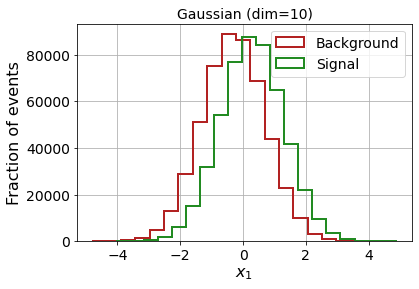

/home/perez/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y

[0]	validation_0-logloss:0.67076	validation_1-logloss:0.67110
[1]	validation_0-logloss:0.65028	validation_1-logloss:0.65072
[2]	validation_0-logloss:0.63182	validation_1-logloss:0.63243
[3]	validation_0-logloss:0.61530	validation_1-logloss:0.61607
[4]	validation_0-logloss:0.60033	validation_1-logloss:0.60125
[5]	validation_0-logloss:0.58675	validation_1-logloss:0.58777
[6]	validation_0-logloss:0.57427	validation_1-logloss:0.57539
[7]	validation_0-logloss:0.56289	validation_1-logloss:0.56416
[8]	validation_0-logloss:0.55234	validation_1-logloss:0.55372
[9]	validation_0-logloss:0.54261	validation_1-logloss:0.54408
[10]	validation_0-logloss:0.53367	validation_1-logloss:0.53524
[11]	validation_0-logloss:0.52544	validation_1-logloss:0.52704
[12]	validation_0-logloss:0.51773	validation_1-logloss:0.51943
[13]	validation_0-logloss:0.51057	validation_1-logloss:0.51234
[14]	validation_0-logloss:0.50386	validation_1-logloss:0.50575
[15]	validation_0-logloss:0.49764	validation_1-logloss:0.49961
[1

[130]	validation_0-logloss:0.37798	validation_1-logloss:0.38335
[131]	validation_0-logloss:0.37790	validation_1-logloss:0.38328
[132]	validation_0-logloss:0.37782	validation_1-logloss:0.38321
[133]	validation_0-logloss:0.37773	validation_1-logloss:0.38315
[134]	validation_0-logloss:0.37766	validation_1-logloss:0.38310
[135]	validation_0-logloss:0.37759	validation_1-logloss:0.38305
[136]	validation_0-logloss:0.37752	validation_1-logloss:0.38300
[137]	validation_0-logloss:0.37745	validation_1-logloss:0.38295
[138]	validation_0-logloss:0.37738	validation_1-logloss:0.38290
[139]	validation_0-logloss:0.37732	validation_1-logloss:0.38285
[140]	validation_0-logloss:0.37725	validation_1-logloss:0.38280
[141]	validation_0-logloss:0.37719	validation_1-logloss:0.38275
[142]	validation_0-logloss:0.37713	validation_1-logloss:0.38271
[143]	validation_0-logloss:0.37707	validation_1-logloss:0.38267
[144]	validation_0-logloss:0.37701	validation_1-logloss:0.38263
[145]	validation_0-logloss:0.37695	valid

[259]	validation_0-logloss:0.37406	validation_1-logloss:0.38147
[260]	validation_0-logloss:0.37404	validation_1-logloss:0.38147
[261]	validation_0-logloss:0.37402	validation_1-logloss:0.38147
[262]	validation_0-logloss:0.37402	validation_1-logloss:0.38147
[263]	validation_0-logloss:0.37401	validation_1-logloss:0.38146
[264]	validation_0-logloss:0.37400	validation_1-logloss:0.38147
[265]	validation_0-logloss:0.37400	validation_1-logloss:0.38146
[266]	validation_0-logloss:0.37398	validation_1-logloss:0.38147
[267]	validation_0-logloss:0.37397	validation_1-logloss:0.38147
[268]	validation_0-logloss:0.37396	validation_1-logloss:0.38147
[269]	validation_0-logloss:0.37395	validation_1-logloss:0.38147
[270]	validation_0-logloss:0.37393	validation_1-logloss:0.38147
[271]	validation_0-logloss:0.37392	validation_1-logloss:0.38147
[272]	validation_0-logloss:0.37390	validation_1-logloss:0.38147
[273]	validation_0-logloss:0.37389	validation_1-logloss:0.38147
[274]	validation_0-logloss:0.37387	valid

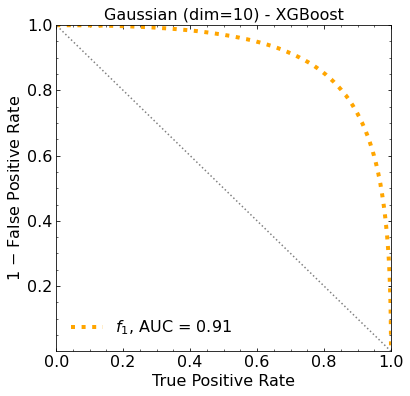

Classification score:


Substituting symbol N from STIXNonUnicode
Substituting symbol N from STIXNonUnicode


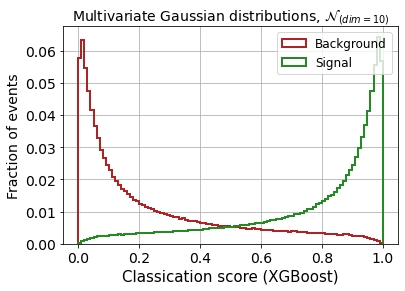

Classification score interpolation:


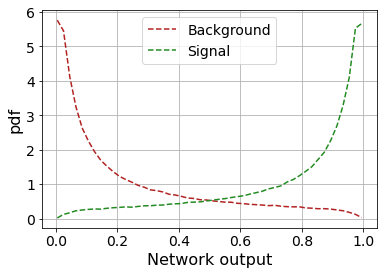


 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 10 bins:  7.057926757916572

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 25 bins:  8.136427236773278

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 50 bins:  8.599817850081035

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 100 bins:  8.757362779856813

 ----------------------------------------- 

TRUE PDF LIKELIHOOD (GAUSSIANS):
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
n_ensembles (initial):  10000

 If  10100  =  1009    then the proposed range has to be extended
n_ensembles (actual):  9233
This may take long...


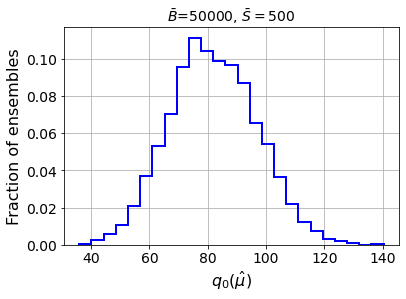

muhat mean:  0.06802772663273042
median q_muhat:  81.42369402568283
Z_gaussian:  9.02350785591074

 ------------------------------------ 

 MLL + KDE 


/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:788: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,


Background:  KernelDensity(algorithm='auto', atol=0, bandwidth=0.002976351441631319,
              breadth_first=True, kernel='epanechnikov', leaf_size=40,
              metric='euclidean', metric_params=None, rtol=0)


/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:788: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,


Signal:  KernelDensity(algorithm='auto', atol=0, bandwidth=0.002976351441631319,
              breadth_first=True, kernel='epanechnikov', leaf_size=40,
              metric='euclidean', metric_params=None, rtol=0)


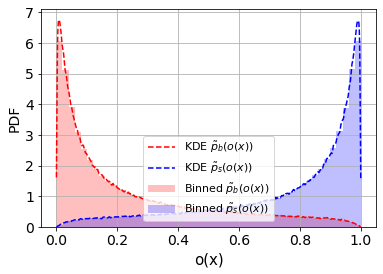

Z_KDE_bins :  8.872587876935846


B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
n_ensembles (initial):  10000

 If  10100  =  1009    then the proposed range has to be extended
n_ensembles (actual):  9233

 This may take long... 



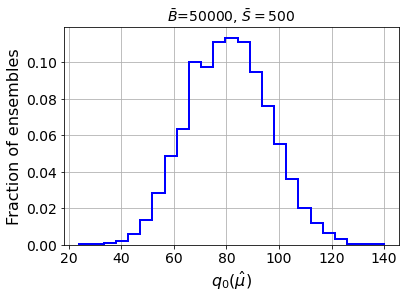

muhat mean:  0.04763348857359471
median q_muhat:  80.84232429843541
Z_KDE:  8.991235971680169
Z_KDE mu=0:  8.996922186305639

 -------------------------------- 

Working points, counting over 1 bin:
S_expected =  500
WP: 0     S/B**0.5=  2.23606797749979
WP:  0.25     S/B**0.5=  3.508298604653455
WP:  0.5     S/B**0.5=  4.45255705154171
WP:  0.75     S/B**0.5=  5.68569237921281
------------------------


In [24]:
dim=10

#######################
# generate the events #
#######################
    
background_X_1 = np.random.normal(-epsilon,1,N)
background_X_2 = np.random.normal(-epsilon,1,N)
background_X_3 = np.random.normal(-epsilon,1,N)
background_X_4 = np.random.normal(-epsilon,1,N)
background_X_5 = np.random.normal(-epsilon,1,N)
background_X_6 = np.random.normal(-epsilon,1,N)
background_X_7 = np.random.normal(-epsilon,1,N)
background_X_8 = np.random.normal(-epsilon,1,N)
background_X_9 = np.random.normal(-epsilon,1,N)
background_X_10 = np.random.normal(-epsilon,1,N)
    
signal_X_1 = np.random.normal(epsilon,1,N)
signal_X_2 = np.random.normal(epsilon,1,N)
signal_X_3 = np.random.normal(epsilon,1,N)
signal_X_4 = np.random.normal(epsilon,1,N)
signal_X_5 = np.random.normal(epsilon,1,N)
signal_X_6 = np.random.normal(epsilon,1,N)
signal_X_7 = np.random.normal(epsilon,1,N)
signal_X_8 = np.random.normal(epsilon,1,N)
signal_X_9 = np.random.normal(epsilon,1,N)
signal_X_10 = np.random.normal(epsilon,1,N)

dim1 = np.concatenate((background_X_1,signal_X_1))
dim2 = np.concatenate((background_X_2,signal_X_2))
dim3 = np.concatenate((background_X_3,signal_X_3))
dim4 = np.concatenate((background_X_4,signal_X_4))
dim5 = np.concatenate((background_X_5,signal_X_5))
dim6 = np.concatenate((background_X_6,signal_X_6))
dim7 = np.concatenate((background_X_7,signal_X_7))
dim8 = np.concatenate((background_X_8,signal_X_8))
dim9 = np.concatenate((background_X_9,signal_X_9))
dim10 = np.concatenate((background_X_10,signal_X_10))

# labels
background_Y = np.zeros(N)
signal_Y = np.ones(N)

# DATA in a single matrix (features + labels)
df = pd.DataFrame()
df['dim1'] = dim1.reshape(-1)
df['dim2'] = dim2.reshape(-1)
df['dim3'] = dim3.reshape(-1)
df['dim4'] = dim4.reshape(-1)
df['dim5'] = dim5.reshape(-1)
df['dim6'] = dim6.reshape(-1)
df['dim7'] = dim7.reshape(-1)
df['dim8'] = dim8.reshape(-1)
df['dim9'] = dim9.reshape(-1)
df['dim10'] = dim10.reshape(-1)
df['Y'] = np.concatenate((background_Y.astype('int'),signal_Y.astype('int')))

X_gauss = df[['dim1','dim2','dim3','dim4','dim5','dim6','dim7','dim8','dim9','dim10']].values 
Y_gauss = df[['Y']].values

X_gauss_train, X_gauss_val, Y_gauss_train, Y_gauss_val = train_test_split(X_gauss, Y_gauss, test_size=0.5)


print(X_gauss_train.shape)
print(Y_gauss_train.shape)
print(X_gauss_val.shape)
print(Y_gauss_val.shape)


# PLOT (only 1st feature) to visualize the data
X_gauss_val_SM = []
X_gauss_val_NP = []

for i in range(len(Y_gauss_val)):
    if Y_gauss_val[i] ==0:
        X_gauss_val_SM.append(X_gauss_val[i].tolist())
    else:
        X_gauss_val_NP.append(X_gauss_val[i].tolist())    


X_gauss_val_SM = np.array(X_gauss_val_SM)
X_gauss_val_NP = np.array(X_gauss_val_NP)


weights = np.ones_like(X_gauss_val_SM[:,0])/float(len(X_gauss_val_SM[:,0]))
plt.hist(X_gauss_val_SM[:,0], 20, histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(X_gauss_val_NP[:,0])/float(len(X_gauss_val_NP[:,0]))
plt.hist(X_gauss_val_NP[:,0], 20, histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$x_1$",fontsize=16)
plt.ylabel("Fraction of events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.title(r"Gaussian (dim=%0.2d)" % dim,fontsize=14)
plt.show()  




#######################
# CLASSIFIER: XGBoost #
#######################

# CLASSIFIER
classifier = XGBClassifier(
    n_estimators=500,
    learning_rate=0.1,
    reg_lambda=0.0,reg_alpha=0.0,
    gamma=0.0,objective='binary:logistic',
    max_depth=5)

# FIT
classifier.fit(X_gauss_train,Y_gauss_train,eval_set=[(X_gauss_train, Y_gauss_train), (X_gauss_val, Y_gauss_val)],
        eval_metric='logloss',early_stopping_rounds=50,#early stopping
        verbose=True)

# PREDICTIONS
y_pred_xg = classifier.predict_proba(X_gauss_val).T[1]


# ROC
fpr_gauss_xg, tpr_gauss_xg, _ = roc_curve(Y_gauss_val, y_pred_xg)
roc_auc_xg = auc(fpr_gauss_xg, tpr_gauss_xg)

store_AUC.append(roc_auc_xg)


# PLOT THE ROC WITH AUC
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax0.minorticks_on()


plt.plot(tpr_gauss_xg,1-fpr_gauss_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
plt.plot([1,0],[0,1],ls=":",color="grey")
plt.xlabel("True Positive Rate",fontsize=16)
plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
plt.legend()
plt.title(r"Gaussian (dim=%0.2d) - XGBoost" % dim,fontsize=16)
plt.xlim([0,1])
plt.ylim([0,1])
plt.yticks([0.2,0.4,0.6,0.8,1.])
plt.legend(frameon=False,fontsize=16)
plt.show()




########################
# CLASSIFICATION SCORE #
########################

# Outputs for validation data set

pred_XG_SM = []
pred_XG_NP = []

for i in range(len(Y_gauss_val)):
    if Y_gauss_val[i] == 0:
        pred_XG_SM.append(y_pred_xg[i])
    else:
        pred_XG_NP.append(y_pred_xg[i])
        
        
print('Classification score:')
        
weights = np.ones_like(pred_XG_SM)/float(len(pred_XG_SM))
nSM, binsSM, patchesSM = plt.hist(pred_XG_SM, 100, weights=weights, range=[0,1], histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(pred_XG_NP)/float(len(pred_XG_NP))
nNP, binsNP, patchesNP = plt.hist(pred_XG_NP, 100, weights=weights, range=[0,1], histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Classication score (XGBoost)",fontsize=15)
plt.ylabel("Fraction of events",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
plt.title('Multivariate Gaussian distributions, $\mathcal{N}_{(dim=%0.2d)}$' % dim, fontsize=14)
plt.show()





# INTERPOLATE TO USE AS p_s(x) and p_b(x) ESTIMATES

# center of each bin

binsSM_mid = []
binsNP_mid = []

for i in range(len(binsSM)-1):
    binsSM_mid.append( ((binsSM[i+1]-binsSM[i])/2)+binsSM[i] )
    
for i in range(len(binsNP)-1):
    binsNP_mid.append( ((binsNP[i+1]-binsNP[i])/2)+binsNP[i] )
    

# get the width of each bin
bin_width_SM = binsSM[1] - binsSM[0]
bin_width_NP = binsNP[1] - binsNP[0]
   
    
# Interpolation, cubic
fcubic_XG_SM = interp1d(binsSM_mid, nSM, kind='cubic')
fcubic_XG_NP = interp1d(binsNP_mid, nNP, kind='cubic')


# Normalize

def fcubic_XG_SM_norm(x):
    return fcubic_XG_SM(x)/bin_width_SM

def fcubic_XG_NP_norm(x):
    return fcubic_XG_NP(x)/bin_width_NP


print('Classification score interpolation:')
# x to plot
xnew_XG_SM = np.linspace(min(binsSM_mid), max(binsSM_mid), num=50, endpoint=True)
xnew_XG_NP = np.linspace(min(binsNP_mid), max(binsNP_mid), num=50, endpoint=True)

plt.plot(xnew_XG_SM, fcubic_XG_SM_norm(xnew_XG_SM), '--', color='firebrick', label='Background')
plt.plot(xnew_XG_NP, fcubic_XG_NP_norm(xnew_XG_NP), '--', color='forestgreen', label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Network output",fontsize=16)
plt.ylabel("pdf",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()

print('\n ----------------------------------------- \n')








##################################################
# CLASSIFIER OUTPUT BINNED POISON LOG-LIKELIHOOD #
##################################################

# 10 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(10), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(10), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_10bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_10bins.append(Z_bins_XG_10bins)

print('Z_XG 10 bins: ', Z_bins_XG_10bins)
print('\n ----------------------------------------- \n')




##############################

# 25 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(25), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(25), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_25bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_25bins.append(Z_bins_XG_25bins)

print('Z_XG 25 bins: ', Z_bins_XG_25bins)
print('\n ----------------------------------------- \n')




##############################

# 50 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(50), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(50), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_50bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_50bins.append(Z_bins_XG_50bins)

print('Z_XG 50 bins: ', Z_bins_XG_50bins)
print('\n ----------------------------------------- \n')




##############################

# 100 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(100), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(100), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_100bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_100bins.append(Z_bins_XG_100bins)

print('Z_XG 100 bins: ', Z_bins_XG_100bins)
print('\n ----------------------------------------- \n')








###################################
# TRUE PDF LIKELIHOOD (GAUSSIANS) #
###################################

print('TRUE PDF LIKELIHOOD (GAUSSIANS):')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print('S/$\sqrt{B}$: ', SsqrtB)
print('n_ensembles (initial): ', n_ensembles)


# to construct ensembles B and S events are taken from Poisson distributions
mu = S_expected + B_expected


# Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

# around the mean its populated so let's try (proposed range to be checked)
list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
to_check = len(list_events_per_ensembles)

# I want at least one ensemble populated
list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



# Remove from the list the elements without at least 1 ensemble possible
for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] > 1:
        list_events_per_ensembles = list_events_per_ensembles[i:]
        list_nums_ensembles = list_nums_ensembles[i:]
        break


for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] < 1:
        list_events_per_ensembles = list_events_per_ensembles[:i]
        list_nums_ensembles = list_nums_ensembles[:i]
        break

print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

print('n_ensembles (actual): ', sum(list_nums_ensembles))



# lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

p_berno = S_expected/(S_expected+B_expected)

list_S_per_ensembles = []
list_B_per_ensembles = []

for jj in range(len(list_events_per_ensembles)):
    list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
    list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

######
# NOW I HAVE 4 LISTS:
# list_events_per_ensembles     list with the number of events per ensemble (its a range)
# list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
# list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
# list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
######



print('This may take long...')


#############################
# NOW LETS APPLY THE METHOD #
#############################
muhat_selected_list = []
q_muhat = []

for bb in range(len(list_nums_ensembles)):

    for kk in range(list_nums_ensembles[bb]):

#         # SIGNAL events in an ensemble
#         NP_shuf = shuffle(X_gauss_val_NP)[:list_S_per_ensembles[bb]]

#         prob_NP_given_B = [] # p_b(S_ensemble)
#         prob_NP_given_S = [] # p_s(S_ensemble)

#         for ll in range(len(NP_shuf)):
#             prob_NP_given_S.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (NP_shuf[ll,0]-epsilon)**2 + (NP_shuf[ll,1]-epsilon)**2 + (NP_shuf[ll,2]-epsilon)**2 + (NP_shuf[ll,3]-epsilon)**2 + (NP_shuf[ll,4]-epsilon)**2 + (NP_shuf[ll,5]-epsilon)**2 + (NP_shuf[ll,6]-epsilon)**2 + (NP_shuf[ll,7]-epsilon)**2 + (NP_shuf[ll,8]-epsilon)**2 + (NP_shuf[ll,9]-epsilon)**2 ) ) )
#             prob_NP_given_B.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (NP_shuf[ll,0]+epsilon)**2 + (NP_shuf[ll,1]+epsilon)**2 + (NP_shuf[ll,2]+epsilon)**2 + (NP_shuf[ll,3]+epsilon)**2 + (NP_shuf[ll,4]+epsilon)**2 + (NP_shuf[ll,5]+epsilon)**2 + (NP_shuf[ll,6]+epsilon)**2 + (NP_shuf[ll,7]+epsilon)**2 + (NP_shuf[ll,8]+epsilon)**2 + (NP_shuf[ll,9]+epsilon)**2 ) ) )


        # BACKGROUND events in an ensemble
        SM_shuf = shuffle(X_gauss_val_SM)[:list_B_per_ensembles[bb]]

        prob_SM_given_B = [] # p_b(B_ensemble)
        prob_SM_given_S = [] # p_s(B_ensemble)

        for ll in range(len(SM_shuf)):
            prob_SM_given_S.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (SM_shuf[ll,0]-epsilon)**2 + (SM_shuf[ll,1]-epsilon)**2 + (SM_shuf[ll,2]-epsilon)**2 + (SM_shuf[ll,3]-epsilon)**2 + (SM_shuf[ll,4]-epsilon)**2 + (SM_shuf[ll,5]-epsilon)**2 + (SM_shuf[ll,6]-epsilon)**2 + (SM_shuf[ll,7]-epsilon)**2 + (SM_shuf[ll,8]-epsilon)**2 + (SM_shuf[ll,9]-epsilon)**2 ) ) )
            prob_SM_given_B.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (SM_shuf[ll,0]+epsilon)**2 + (SM_shuf[ll,1]+epsilon)**2 + (SM_shuf[ll,2]+epsilon)**2 + (SM_shuf[ll,3]+epsilon)**2 + (SM_shuf[ll,4]+epsilon)**2 + (SM_shuf[ll,5]+epsilon)**2 + (SM_shuf[ll,6]+epsilon)**2 + (SM_shuf[ll,7]+epsilon)**2 + (SM_shuf[ll,8]+epsilon)**2 + (SM_shuf[ll,9]+epsilon)**2 ) ) )


        # p_b(x_ensemble) =    concatenate: p_b(B_ensemble) and p_b(S_ensemble)
        prob_x_given_B = prob_SM_given_B #+ prob_NP_given_B

        # p_s(x_ensemble) =    concatenate: p_s(B_ensemble) and p_s(S_ensemble)
        prob_x_given_S = prob_SM_given_S #+ prob_NP_given_S




        # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
        # WE NEED TO ESTIMATE mu_hat for this particular ensemble
        # we are going to obtain a mu_hat with a grid of values for this particular ensemble



        mu_hat_condition_equal_1 = []

        # grid, mu_hat is around 1
        muhat_test = np.arange(0., 1.5, 0.1).tolist()

        B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

        for vv in range(len(muhat_test)):

            mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



        muhat_selected = 0.01

        # from the grid, select the mu_hat such that the condition is equal to 1
        if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 > 0:
                    muhat_selected = muhat_test[ll]
                    break


        if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 < 0:
                    muhat_selected = muhat_test[ll]
                    break


        muhat_selected_list.append(muhat_selected)



        # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
        # and append it (we need the median over lots of ensembles)
        q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (muhat_selected*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )  ) )



# Histogram of q_muhats

weights = np.ones_like(q_muhat)/float(len(q_muhat))
nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
plt.ylabel("Fraction of ensembles",fontsize=16)
plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected),fontsize=14)
plt.grid()
plt.show()


# Finally calculate muhat_mean and Z_gaussian
muhat_mean_gaussian = np.mean(muhat_selected_list)
store_muhat_mean_gaussian.append(muhat_mean_gaussian)

# Remove nan if any
q_muhat = [x for x in q_muhat if x == x]

q_muhat_median = np.median(q_muhat)

Z_gaussian = abs(q_muhat_median)**0.5
store_Z_gaussian.append(Z_gaussian)

print('muhat mean: ', muhat_mean_gaussian)
print('median q_muhat: ', q_muhat_median)
print('Z_gaussian: ', Z_gaussian)


print('\n ------------------------------------ \n')


    
    
    


    
#########
#  KDE  #
#########  

print(' MLL + KDE ')

# FIND THE BANDWIDTH

bandwidth = np.logspace(-4.0, 0, 20)

kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_SM[:50000]])
print('Background: ', grid.best_estimator_)

SM_bandwidth = grid.best_estimator_.bandwidth



kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_NP[:50000]])
print('Signal: ', grid.best_estimator_)

NP_bandwidth = grid.best_estimator_.bandwidth




# with each calculated bandwidth estimate the pdf with KDE to the classifier output (for background and signal)
# notice: epanechnikov kernel
kde_bkg = KernelDensity(kernel='epanechnikov', bandwidth=SM_bandwidth).fit(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ])
kde_sig = KernelDensity(kernel='epanechnikov', bandwidth=NP_bandwidth).fit(np.c_[pred_XG_NP, np.ones(len(pred_XG_NP)) ])


# range (~between 0 and 1)
min_val = np.min([np.min(pred_XG_SM),np.min(pred_XG_NP)])
max_val = np.max([np.max(pred_XG_SM),np.max(pred_XG_NP)])

s_vals = np.linspace(min_val,max_val,1000)





# evaluate the densities for each value of s (~bins)
dens_bkg = np.exp(kde_bkg.score_samples(np.c_[s_vals, np.zeros(len(s_vals)) ]) )
dens_sig = np.exp(kde_sig.score_samples(np.c_[s_vals, np.ones(len(s_vals)) ]) )





# Normalize to 1
# Area
factor_aux_SM = sum(dens_bkg*(s_vals[1]-s_vals[0]))
factor_aux_NP = sum(dens_sig*(s_vals[1]-s_vals[0]))

# normalize
dens_bkg = dens_bkg / factor_aux_SM
dens_sig = dens_sig / factor_aux_NP







# plot to check the estimation

plt.figure()

plt.hist(pred_XG_SM,density=True,bins=50,color='red',alpha=0.25,label=r'Binned $\tilde{p}_{b}(o(x))$');
plt.plot(s_vals,dens_bkg,color='red',label=r'KDE $\tilde{p}_{b}(o(x))$',linestyle='dashed');

plt.hist(pred_XG_NP,density=True,bins=50,color='blue',alpha=0.25,label=r'Binned $\tilde{p}_{s}(o(x))$');
plt.plot(s_vals,dens_sig,color='blue',label=r'KDE $\tilde{p}_{s}(o(x))$',linestyle='dashed');

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("o(x)",fontsize=15)
plt.ylabel("PDF",fontsize=14)
plt.grid()
plt.legend(loc="lower center", fontsize=11, handlelength=2.5)
#plt.title(r'Multivariate Gaussian distributions, $\mathcal{N}_{dim}$', fontsize=14)
#plt.savefig('images/' + 'Ndimgaussian-output.pdf', format="pdf", bbox_inches="tight")
plt.show()





# We can do a quick Z bin-loglikelihood calculation using the computed KDE
# this is to check the KDE here, because we use KDE to avoid binning


# B events in each bin: 
# total number of B * B_pdf value in each bin * bin size
Bd = B_expected*dens_bkg*(s_vals[1]-s_vals[0])


# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
Bd_noceros = []
for i in range(len(Bd)):
    if Bd[i]!=0:
        Bd_noceros.append(Bd[i])

min_back = min(Bd_noceros)

# replace the zeros
for i in range(len(Bd)):
    if Bd[i]==0:
        Bd[i] = min_back


# S events in each bin: 
# value of S/sqrt{B} * sqrt{B} * S_pdf value in each bin * bin size
Sd = SsqrtB*np.sqrt(B_expected)*dens_sig*(s_vals[1]-s_vals[0])


# Z value:
#Z_KDE_bins = np.sqrt(2.0*np.sum(((Sd+Bd)*np.log(1.0+Sd/Bd)-Sd))) # Discovery
Z_KDE_bins = np.sqrt(2.0*np.sum(Bd*np.log(Bd/(Sd+Bd))+Sd)) # Exclusion

store_Z_KDE_bins.append(Z_KDE_bins)

print('Z_KDE_bins : ', Z_KDE_bins)



    
    
    
#############
# MLL + KDE #
#############
    
# FOR EXCLUSION:
# we need to evaluate the KDE densities with the classifier output of BACKGROUND EVENTS

# FOR DISCOVERY:
# we need to evaluate the KDE densities with the classifier output of BACKGROUND and SIGNAL EVENTS

KDE_SM_pred_SM = np.exp(kde_bkg.score_samples(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ]) )
KDE_NP_pred_SM = np.exp(kde_sig.score_samples(np.c_[pred_XG_SM, np.ones(len(pred_XG_SM)) ]) )


# Normalize

KDE_SM_pred_SM = KDE_SM_pred_SM / factor_aux_SM
KDE_NP_pred_SM = KDE_NP_pred_SM / factor_aux_NP




indices = [i for i in range(len(KDE_NP_pred_SM))]


# the first part is the same as before, but we repeat it, it is not the expensive part

print('\n')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)
print('n_ensembles (initial): ', n_ensembles)


# to construct ensembles B and S events are taken from Poisson distributions
mu = S_expected + B_expected


# Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

# around the mean its populated so let's try (proposed range to be checked)
list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
to_check = len(list_events_per_ensembles)

# I want at least one ensemble populated
list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



# Remove from the list the elements without at least 1 ensemble possible
for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] > 1:
        list_events_per_ensembles = list_events_per_ensembles[i:]
        list_nums_ensembles = list_nums_ensembles[i:]
        break


for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] < 1:
        list_events_per_ensembles = list_events_per_ensembles[:i]
        list_nums_ensembles = list_nums_ensembles[:i]
        break

print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

print('n_ensembles (actual): ', sum(list_nums_ensembles))



# lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

p_berno = S_expected/(S_expected+B_expected)

list_S_per_ensembles = []
list_B_per_ensembles = []

for jj in range(len(list_events_per_ensembles)):
    list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
    list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

######
# NOW I HAVE 4 LISTS:
# list_events_per_ensembles     list with the number of events per ensemble (its a range)
# list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
# list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
# list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
######



print('\n This may take long... \n')


# NOW LETS APPLY THE METHOD

muhat_selected_list = []
q_muhat = []
q_muhat_mu0 = []

for bb in range(len(list_nums_ensembles)):

    for kk in range(list_nums_ensembles[bb]):

        # KDE
        ran_ind = np.random.choice(indices, list_B_per_ensembles[bb])

        KDE_SM_pred_SM_shuf = []
        KDE_NP_pred_SM_shuf = []

        for i in ran_ind:
            KDE_SM_pred_SM_shuf.append(KDE_SM_pred_SM[i])
            KDE_NP_pred_SM_shuf.append(KDE_NP_pred_SM[i])

        KDE_SM_pred_SM_shuf  = np.array(KDE_SM_pred_SM_shuf)
        KDE_NP_pred_SM_shuf  = np.array(KDE_NP_pred_SM_shuf)



        # p_b(o(x_ensemble)) =    concatenate: p_b(o(B_ensemble)) and p_b(o(S_ensemble))  NOTICE THE o(x)
        prob_x_given_B = np.ndarray.tolist( KDE_SM_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_SM_pred_NP_shuf )

        # p_s(o(x_ensemble)) =    concatenate: p_s(o(B_ensemble)) and p_s(o(S_ensemble))  NOTICE THE o(x)
        prob_x_given_S = np.ndarray.tolist( KDE_NP_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_NP_pred_NP_shuf )





        # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
        # WE NEED TO ESTIMATE mu_hat for this particular ensemble
        # we are going to obtain a mu_hat with a grid of values for this particular ensemble



        mu_hat_condition_equal_1 = []

        # grid, mu_hat is around 1
        muhat_test = np.arange(0., 1.5, 0.1).tolist()

        B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

        for vv in range(len(muhat_test)):

            mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



        muhat_selected = 0.01

        # from the grid, select the mu_hat such that the condition is equal to 1
        if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 > 0:
                    muhat_selected = muhat_test[ll]
                    break


        if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 < 0:
                    muhat_selected = muhat_test[ll]
                    break


        muhat_selected_list.append(muhat_selected)



        # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
        # and append it (we need the median over lots of ensembles)
        #q_muhat.append( 2 * ( (-1.*muhat_selected * S_expected) + sum( [np.log( 1 + ( (muhat_selected*S_expected/B_expected) * (x / y) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] ) ) )
        # EXCLUSION:
        q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (muhat_selected*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
) )
        q_muhat_mu0.append( 2 * ( ( (1.-0.) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (0.*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
) )


# Histogram of q_muhats

weights = np.ones_like(q_muhat)/float(len(q_muhat))
nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)
#plt.xlim(0,1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
plt.ylabel("Fraction of ensembles",fontsize=16)
plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected),fontsize=14)
plt.grid()
#plt.legend(fontsize=14)
plt.show()


# Finally calculate muhat_mean and Z_gaussian

# Remove nan if any
q_muhat_mu0 = [x for x in q_muhat_mu0 if x == x]

q_muhat_median_mu0 = np.median(q_muhat_mu0)

Z_KDE_mu0 = abs(q_muhat_median_mu0)**0.5
store_Z_MLL_KDE_mu0.append(Z_KDE_mu0)


# Finally calculate muhat_mean and Z_gaussian
muhat_mean_MLL_KDE = np.mean(muhat_selected_list)
store_muhat_mean_MLL_KDE.append(muhat_mean_MLL_KDE)

# Remove nan if any
q_muhat = [x for x in q_muhat if x == x]

q_muhat_median = np.median(q_muhat)

Z_KDE = abs(q_muhat_median)**0.5
store_Z_MLL_KDE.append(Z_KDE)

print('muhat mean: ', muhat_mean_MLL_KDE)
print('median q_muhat: ', q_muhat_median)
print('Z_KDE: ', Z_KDE)
print('Z_KDE mu=0: ', Z_KDE_mu0)

print('\n -------------------------------- \n')
    
    

    
    
    
    
    
    
#######################################
# Working points, counting over 1 bin #
#######################################

print('Working points, counting over 1 bin:')

# BACKGROUND 

# number of background ensembles
B_ensembles = int(len(pred_XG_SM)/B_expected)

# shorten the number of B events so I get an integer number of ensembles
pred_XG_SM_entero = pred_XG_SM[:int(len(pred_XG_SM)/B_expected) * B_expected]

XG_SM_passWP0 = 0
XG_SM_passWP1 = 0
XG_SM_passWP2 = 0

for i in range(len(pred_XG_SM_entero)):
    if pred_XG_SM_entero[i] > WP[0]:
        XG_SM_passWP0 += 1
    if pred_XG_SM_entero[i] > WP[1]:
        XG_SM_passWP1 += 1
    if pred_XG_SM_entero[i] > WP[2]:
        XG_SM_passWP2 += 1



# SIGNAL

# number of signal ensembles
S_ensembles = int(len(pred_XG_NP)/S_expected)

# shorten the number of S events so I get an integer number of ensembles
pred_XG_NP_entero = pred_XG_NP[:int(len(pred_XG_NP)/S_expected) * S_expected]

XG_NP_passWP0 = 0
XG_NP_passWP1 = 0
XG_NP_passWP2 = 0

for i in range(len(pred_XG_NP_entero)):
    if pred_XG_NP_entero[i] > WP[0]:
        XG_NP_passWP0 += 1
    if pred_XG_NP_entero[i] > WP[1]:
        XG_NP_passWP1 += 1
    if pred_XG_NP_entero[i] > WP[2]:
        XG_NP_passWP2 += 1

Z_WP0 = ( XG_NP_passWP0 / S_ensembles ) / ( XG_SM_passWP0 / B_ensembles )**0.5
Z_WP1 = ( XG_NP_passWP1 / S_ensembles ) / ( XG_SM_passWP1 / B_ensembles )**0.5
Z_WP2 = ( XG_NP_passWP2 / S_ensembles ) / ( XG_SM_passWP2 / B_ensembles )**0.5


# save the results Z_binned after WP
SrootB_WP0.append( Z_WP0 )
SrootB_WP1.append( Z_WP1 )
SrootB_WP2.append( Z_WP2 )

print('S_expected = ', S_expected)
print('WP: 0     S/B**0.5= ', S_expected/(B_expected)**0.5)
print('WP: ', WP[0], '    S/B**0.5= ', Z_WP0 )
print('WP: ', WP[1], '    S/B**0.5= ', Z_WP1 )
print('WP: ', WP[2], '    S/B**0.5= ', Z_WP2 )
print('------------------------')

In [25]:
print('dim = ', dim)

print(roc_auc_xg)

print(Z_bins_XG_10bins)
print(Z_bins_XG_25bins)
print(Z_bins_XG_50bins)
print(Z_bins_XG_100bins)

print(muhat_mean_gaussian)
print(Z_gaussian)

print(muhat_mean_MLL_KDE)
print(Z_KDE_bins)
print(Z_KDE)
print(Z_KDE_mu0)

print(Z_WP0)
print(Z_WP1)
print(Z_WP2)

dim =  10
0.9092378335196292
7.057926757916572
8.136427236773278
8.599817850081035
8.757362779856813
0.06802772663273042
9.02350785591074
0.04763348857359471
8.872587876935846
8.991235971680169
8.996922186305639
3.508298604653455
4.45255705154171
5.68569237921281


In [ ]:
# To use if you dont want to run everything again. Store the previous results
store_AUC.append()

store_Z_bins_XG_10bins.append()
store_Z_bins_XG_25bins.append()
store_Z_bins_XG_50bins.append()
store_Z_bins_XG_100bins.append()

store_muhat_mean_gaussian.append()
store_Z_gaussian.append()

store_muhat_mean_MLL_KDE.append()
store_Z_KDE_bins.append()
store_Z_MLL_KDE.append()
store_Z_MLL_KDE_mu0.append()

SrootB_WP0.append()
SrootB_WP1.append()
SrootB_WP2.append()

In [26]:
# FINAL STORED VALUES
print(store_AUC)

print(store_Z_bins_XG_10bins)
print(store_Z_bins_XG_25bins)
print(store_Z_bins_XG_50bins)
print(store_Z_bins_XG_100bins)

print(store_muhat_mean_gaussian)
print(store_Z_gaussian)

print(store_muhat_mean_MLL_KDE)
print(store_Z_KDE_bins)
print(store_Z_MLL_KDE)
print(store_Z_MLL_KDE_mu0)

print(SrootB_WP0)
print(SrootB_WP1)
print(SrootB_WP2)

[0.6645728570720144, 0.7260542944336169, 0.7685001132950795, 0.8008937982919934, 0.8279531705877106, 0.8496744706899296, 0.8682587249633751, 0.8828918621468724, 0.896949217530446, 0.9092378335196292]
[2.636134323271524, 3.122876033542218, 3.628491383644415, 4.131859231259901, 4.675262868762146, 5.174966673954778, 5.667865689217378, 6.082708826106731, 6.548693759173448, 7.057926757916572]
[2.654554009795442, 3.1590626478621906, 3.7012937227171596, 4.281769361208555, 4.940504058553808, 5.633869898597867, 6.248082037892916, 6.852141104088482, 7.469689773205326, 8.136427236773278]
[2.6578223272270605, 3.164848396881707, 3.7216126257656734, 4.302522457323605, 4.995136063040277, 5.7355428890984195, 6.433495937941979, 7.120698404568124, 7.859451687609371, 8.599817850081035]
[2.6594471686423913, 3.1675771535129655, 3.733322341462142, 4.30989278603731, 5.0165598813326, 5.780763910052656, 6.544657364646256, 7.2966514269434795, 8.038566021694608, 8.757362779856813]
[0.15878912596122605, 0.1046788

In [36]:
# FINAL STORED VALUES
# To use if you dont want to run everything again. Its the previous results

store_AUC = [0.6645728570720144, 0.7260542944336169, 0.7685001132950795, 0.8008937982919934, 0.8279531705877106, 0.8496744706899296, 0.8682587249633751, 0.8828918621468724, 0.896949217530446, 0.9092378335196292]

store_Z_bins_XG_10bins = [2.636134323271524, 3.122876033542218, 3.628491383644415, 4.131859231259901, 4.675262868762146, 5.174966673954778, 5.667865689217378, 6.082708826106731, 6.548693759173448, 7.057926757916572]
store_Z_bins_XG_25bins = [2.654554009795442, 3.1590626478621906, 3.7012937227171596, 4.281769361208555, 4.940504058553808, 5.633869898597867, 6.248082037892916, 6.852141104088482, 7.469689773205326, 8.136427236773278]
store_Z_bins_XG_50bins = [2.6578223272270605, 3.164848396881707, 3.7216126257656734, 4.302522457323605, 4.995136063040277, 5.7355428890984195, 6.433495937941979, 7.120698404568124, 7.859451687609371, 8.599817850081035]
store_Z_bins_XG_100bins = [2.6594471686423913, 3.1675771535129655, 3.733322341462142, 4.30989278603731, 5.0165598813326, 5.780763910052656, 6.544657364646256, 7.2966514269434795, 8.038566021694608, 8.757362779856813]

store_muhat_mean_gaussian = [0.15878912596122605, 0.10467886927325896, 0.10211198960251275, 0.10675471259172345, 0.11475143506985812, 0.08079714069099969, 0.08063467995234486, 0.07451532546301311, 0.05929914437344308, 0.06802772663273042]
store_Z_gaussian = [2.6836488080689653, 3.373686744397584, 3.896019891982239, 4.384108236979843, 4.968371647553179, 5.895596422207176, 6.643974647225692, 7.2372354293606715, 8.253611439575817, 9.02350785591074]

store_muhat_mean_MLL_KDE = [0.1665439185530164, 0.12956785443517818, 0.09518033141990685, 0.09527780786309975, 0.08888768547600998, 0.074916061951695, 0.06220080147297737, 0.05570237192678436, 0.04868406801689592, 0.04763348857359471]
store_Z_KDE_bins = [2.656266288052461, 3.164622894600369, 3.698832113245229, 4.295407947282949, 5.00976772283919, 5.766343992412554, 6.503602348470732, 7.306819426029539, 8.080892845979282, 8.872587876935846]
store_Z_MLL_KDE = [2.6341449331085607, 3.2525386201315536, 3.9063777501736596, 4.41874900187419, 5.095777118183878, 5.874317581714992, 6.671077698648441, 7.429073876335286, 8.2727199296875, 8.991235971680169]
store_Z_MLL_KDE_mu0 = [2.6461823003605334, 3.2525386201315536, 3.9063777501736596, 4.41874900187419, 5.098427272724986, 5.8769504914147905, 6.6723007962862875, 7.435206359555438, 8.275731798854027, 8.996922186305639]

SrootB_WP0 = [2.273824123464826, 2.3824779910696416, 2.507515858008465, 2.6507159068632618, 2.791272259883534, 2.933897959258883, 3.07743826041617, 3.213715665052712, 3.361761231237201, 3.508298604653455]
SrootB_WP1 = [2.234195313830836, 2.5676195212343464, 2.8421177284803627, 3.0859867302765185, 3.332697130581809, 3.565865603803425, 3.7835312822829072, 4.002211370397196, 4.2221713585771035, 4.45255705154171]
SrootB_WP2 = [1.0677014742107185, 2.066460167499881, 2.758078617795226, 3.269261996814971, 3.7667352767441833, 4.168657083165545, 4.577220883278492, 4.889274250670809, 5.312247430896109, 5.68569237921281]

Substituting symbol N from STIXNonUnicode
Substituting symbol N from STIXNonUnicode


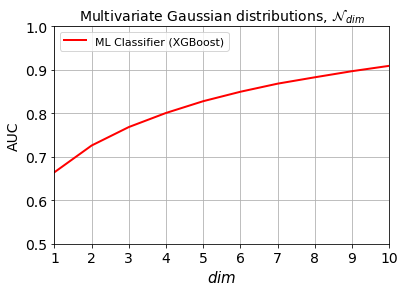

Substituting symbol N from STIXNonUnicode
Substituting symbol N from STIXNonUnicode


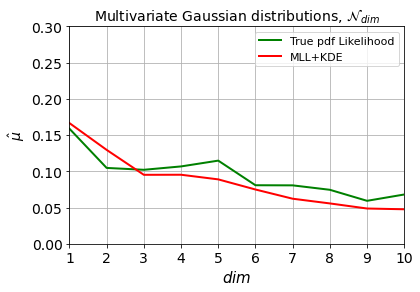

Substituting symbol N from STIXNonUnicode
Substituting symbol N from STIXNonUnicode
Substituting symbol N from STIXNonUnicode
Substituting symbol N from STIXNonUnicode


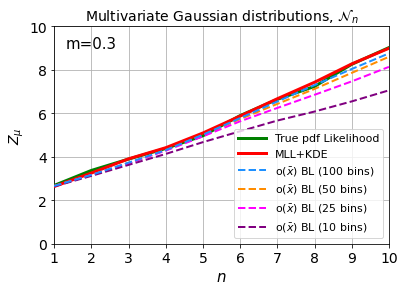

In [37]:
#########
# PLOTS #
#########

dim = [1,2,3,4,5,6,7,8,9,10]

plt.figure()
lw = 2

plt.plot(dim, store_AUC, '-', color='red', lw=lw, label=r'ML Classifier (XGBoost)')

plt.xlim([1, 10])
plt.ylim([0.5, 1.0])
#plt.xscale('log')
#plt.axes().set_aspect(0.7)
plt.xlabel('$dim$', fontsize=15)
plt.ylabel('AUC', fontsize=14)
plt.title('Multivariate Gaussian distributions, $\mathcal{N}_{dim}$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.legend(loc="upper left", fontsize=11)
#plt.savefig('images/' + 'AUCgaussians.pdf', format="pdf", bbox_inches="tight")
plt.show()




plt.figure()
lw = 2

plt.plot(dim, store_muhat_mean_gaussian, '-', color='green', lw=lw, label='True pdf Likelihood')
plt.plot(dim, store_muhat_mean_MLL_KDE, '-', color='red', lw=lw, label='MLL+KDE')

plt.xlim([1, 10])
plt.ylim([0.0, 0.3])
#plt.xscale('log')
#plt.axes().set_aspect(0.7)
plt.xlabel('$dim$', fontsize=15)
plt.ylabel(r'$\hat{\mu}$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('Multivariate Gaussian distributions, $\mathcal{N}_{dim}$', fontsize=14)
plt.legend(loc="upper right", fontsize=11)
#plt.savefig('images/' + '2gaussian-muhatvsmu.pdf', format="pdf", bbox_inches="tight")
plt.show()





plt.figure()
lw = 2

#plt.plot(dim, store_Z_KDE_bins, '--', color='purple', lw=3, label=r'Binned KDE output', zorder=5 )
plt.plot(dim, store_Z_gaussian, '-', color='green', lw=3, label=r'True pdf Likelihood' ,zorder=5)
plt.plot(dim, store_Z_MLL_KDE, '-', color='red', lw=3, label=r'MLL+KDE', zorder=5 )
#plt.plot(dim, store_Z_MLL_KDE_mu0, ':', color='gray', lw=3, label=r'MLL+KDE mu=0', zorder=5 )
plt.plot(dim, store_Z_bins_XG_100bins, '--', color='dodgerblue', lw=2, label=r'o$(\bar{x})$ BL (100 bins)' ,zorder=10)
plt.plot(dim, store_Z_bins_XG_50bins, '--', color='darkorange', lw=2, label=r'o$(\bar{x})$ BL (50 bins)' ,zorder=5)
plt.plot(dim, store_Z_bins_XG_25bins, '--', color='magenta', lw=2, label=r'o$(\bar{x})$ BL (25 bins)' ,zorder=5)
plt.plot(dim, store_Z_bins_XG_10bins, '--', color='purple', lw=2, label=r'o$(\bar{x})$ BL (10 bins)' ,zorder=5)

#plt.plot(dim, SrootB_WP2, '--', color='darkorange', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[2] )
#plt.plot(dim, SrootB_WP1, '--', color='magenta', lw=lw)#, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[1] )
#plt.plot(dim, SrootB_WP0, '--', color='navy', lw=lw)#, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[0] )

plt.xlim([1, 10])
plt.ylim([0., 10])
#plt.yscale('log')
plt.text(1.3, 9, 'm=0.3', fontsize = 15)
plt.xlabel('$n$', fontsize=15)
plt.ylabel('$Z_{\mu}$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.axhline(y=SsqrtB, color='black', linestyle=':')#, label=r'$S/\sqrt{B}$, WP=0')
plt.grid()
plt.title('Multivariate Gaussian distributions, $\mathcal{N}_{n}$', fontsize=14)
plt.legend(loc="lower right", fontsize=11, handlelength=2.5)
plt.savefig('images/' + '2gaussian-Z-dims-m03.pdf', format="pdf", bbox_inches="tight")
plt.show()